# Phase 4 Project.

# Table of Contents.
## 1. Business Problem Overview.
## 2. Proposed Solution.
## 3. Datasets Download Links.
## 4. Datasets EDA and Cleaning.
### &nbsp; 4.1. Traffic Crashes:Crashes Overview, EDA, Cleaning. 
### &nbsp; 4.2. Traffic Crashes:Drivers Overview, EDA, Cleaning. 
### &nbsp; 4.3. Traffic Crashes:Drivers Overview, EDA, Cleaning. 
## 5. Data Transformation.
## 6. Modelling.
## 7. Results.
## 8. Conclusion.

## 1. Business Problem Overview.

Your task is to:

Build a model that can predict the primary contributory cause of a car accident, given information about the car, the people in the car, the road conditions etc. You might imagine your audience as a Vehicle Safety Board who's interested in reducing traffic accidents, or as the City of Chicago who's interested in becoming aware of any interesting patterns.


## 2. Proposed Solution.

## 3. Datasets Download Links.

* [Traffic Crashes: Crashes](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data).
* [Traffic Crashes: People](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data).
* [Traffic Ctashes: Vehicle](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data).

## 4. Datasets EDA and Cleaning.

In this section of the notebook we'll load the datasets and do a brief EDA.
We'll take a look at the datasets, we'll list columns and unique values for categorical columns. This would give us a better understanding of the datasets structures and amount of cleaning we might have to do for each set.

### Loading datasets. 

In [2]:
# importing modules
import pandas as pd
import numpy as np
import os

# Data directory
dir_data = './Data'

# filenames
data_crashes = 'Traffic_Crashes_-_Crashes_20240719.csv'
data_people = 'Traffic_Crashes_-_People_20240719.csv'
data_vehicles = 'Traffic_Crashes_-_Vehicles_20240719.csv'

# path to files
path_crashes = os.path.join(dir_data, data_crashes)
path_people = os.path.join(dir_data, data_people)
path_vehices = os.path.join(dir_data, data_vehicles)

# loading datasets
df_crashes = pd.read_csv(path_crashes, low_memory=False)
df_people = pd.read_csv(path_people, low_memory=False)
df_vehicles = pd.read_csv(path_vehices, low_memory=False)

#### Supplemental function to display unique categorical column values in a dataframe.

In [3]:
# function will display unique values for all categorical columns in a dataframe.
def display_categorical_vals(df):
    # select categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # print categorical columns and their unique values
    for col in categorical_columns:
        unique_values = df[col].unique()
        print(f"Column '{col}' has unique values: {unique_values}")

## 4.1. Overview of Vehicle Crashes: Crashes. 
Viewing top 5 elemets, listing columns, listing unique values in categorical columns.

In [4]:
# view datasets
df_crashes.head()

CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...              NaN   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...              NaN   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  08/18/2023 12:50:00 PM                  15                  OTHER   
1  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
2  08/18/2023 05:58:00 PM                  30            NO CONTROLS   
3  11/26/2019 08:38:00 AM                  25            NO CONTROLS   
4  08/18/2023 10:45:00 AM                  20            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION LIGHTING_CONDITION  \
0  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
1  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
2           NO CONTROLS             CLEAR           DAYLIGHT   
3           NO CONTROLS             CLEAR           DAYLIGHT   
4           NO CONTROLS             CLEAR           DAYLIGHT   

       FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  ...  \
0              REAR END                            OTHER  ...   
1  PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)  ...   
2          PEDALCYCLIST                      NOT DIVIDED  ...   
3            PEDESTRIAN                          ONE-WAY  ...   
4          FIXED OBJECT                            OTHER  ...   

   INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT  \
0                          1.0                           0.0   
1                          0.0                           0.0   
2                          1.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

  INJURIES_NO_INDICATION INJURIES_UNKNOWN CRASH_HOUR CRASH_DAY_OF_WEEK  \
0                    1.0              0.0         12                 6   
1                    1.0              0.0         14                 7   
2                    1.0              0.0         17                 6   
3                    1.0              0.0          8                 3   
4                    1.0              0.0         10                 6   

  CRASH_MONTH   LATITUDE  LONGITUDE                                  LOCATION  
0           8        NaN        NaN                                       NaN  
1           7  41.854120 -87.665902  POINT (-87.665902342962 41.854120262952)  
2           8  41.942976 -87.761883  POINT (-87.761883496974 41.942975745006)  
3          11        NaN        NaN                                       NaN  
4           8        NaN        NaN                                       NaN  

[5 rows x 48 columns]

In [5]:
# print column names
df_crashes.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [6]:
# unique values for categorical columns.
display_categorical_vals(df_crashes)

Column 'CRASH_RECORD_ID' has unique values: ['6c1659069e9c6285a650e70d6f9b574ed5f64c12888479093dfeef179c0344ec6d2057eae224b5c0d5dfc278c0a237f8c22543f07fdef2e4a95a3849871c9345'
 '5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4106558b34b8a6d2b81af02cf91b576ecd7ced08ffd10fcfd940a84f7613125b89d33636e6075064e22'
 '61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9cafd3dc7e631b9e1ba8b450a63af12bd90d1d2d9b127ea287f88d32e138a4eeba17799f536c08048934'
 ...
 '61c8dcd63fae60613bc9ec526fa901420cbe99a6d35840052c27bbd0cf1f8d6af74ff575276d3795f26878601232f6b9297b250a3499b62a96373e068134d21a'
 'bc2876dcd7c4098806301cb646232eb8f65c86a4f418b70f90391ab5dee6c889b5511da3e2c3666f19cc4e30df20e078ac9234cca189952b3dd18716dacaafd4'
 '6dee8823d4ae96624b741428681d19f50b5960418b6d790275e76ec34ee74f1b85ea13fab7248a863dc3761b4c1a7d96a18e6c8b1bd5777d665971ec3ab5598c']
Column 'CRASH_DATE_EST_I' has unique values: [nan 'Y' 'N']
Column 'CRASH_DATE' has unique values: ['08/18/2023 12:50:00 PM' '07/29/2023 02:45:00 PM'
 '08/18/2

In [7]:
# display % NaN for each column

# calculate the percentage of NaN values for each column
nan_percentage = df_crashes.isna().mean() * 100

# create a new DataFrame with the column name and percentage of NaNs
nan_df = pd.DataFrame({'Column Name': nan_percentage.index, '% NaN': nan_percentage.values})

# sort the filtered DataFrame by '% NaN' in descending order
nan_df_filtered = nan_df.sort_values(by='% NaN', ascending=False).reset_index(drop=True)

# display the result
nan_df_filtered


Column Name      % NaN
0               WORKERS_PRESENT_I  99.854605
1                       DOORING_I  99.688505
2                  WORK_ZONE_TYPE  99.562293
3                     WORK_ZONE_I  99.432923
4                  PHOTOS_TAKEN_I  98.657636
5              STATEMENTS_TAKEN_I  97.731457
6              NOT_RIGHT_OF_WAY_I  95.414488
7                CRASH_DATE_EST_I  92.559334
8          INTERSECTION_RELATED_I  77.075950
9                        LANE_CNT  76.721175
10                  HIT_AND_RUN_I  68.674597
11                    REPORT_TYPE   3.034121
12                       LOCATION   0.702764
13                      LONGITUDE   0.702764
14                       LATITUDE   0.702764
15             MOST_SEVERE_INJURY   0.220257
16                 INJURIES_TOTAL   0.218736
17                 INJURIES_FATAL   0.218736
18        INJURIES_INCAPACITATING   0.218736
19    INJURIES_NON_INCAPACITATING   0.218736
20  INJURIES_REPORTED_NOT_EVIDENT   0.218736
21         INJURIES_NO_INDICATION   0.218736
22               INJURIES_UNKNOWN   0.218736
23             BEAT_OF_OCCURRENCE   0.000585
24               STREET_DIRECTION   0.000468
25                    STREET_NAME   0.000117
26               FIRST_CRASH_TYPE   0.000000
27                     CRASH_DATE   0.000000
28             POSTED_SPEED_LIMIT   0.000000
29                    CRASH_MONTH   0.000000
30              CRASH_DAY_OF_WEEK   0.000000
31                     CRASH_HOUR   0.000000
32         TRAFFIC_CONTROL_DEVICE   0.000000
33               DEVICE_CONDITION   0.000000
34              WEATHER_CONDITION   0.000000
35             LIGHTING_CONDITION   0.000000
36                TRAFFICWAY_TYPE   0.000000
37                      STREET_NO   0.000000
38                      ALIGNMENT   0.000000
39           ROADWAY_SURFACE_COND   0.000000
40                      NUM_UNITS   0.000000
41                    ROAD_DEFECT   0.000000
42                     CRASH_TYPE   0.000000
43                         DAMAGE   0.000000
44           DATE_POLICE_NOTIFIED   0.000000
45        PRIM_CONTRIBUTORY_CAUSE   0.000000
46         SEC_CONTRIBUTORY_CAUSE   0.000000
47                CRASH_RECORD_ID   0.000000

#### Takeaways after initial overview:
* The dataset `Traffic Crashes: Crashes` has 48 columns and 854910 data entries;
* The dataset has a primary key `CRASH_RECORD_ID`.
* The dataset has a target column `PRIM_CONTRIBUTORY_CAUSE` and a similar column `SEC_CONTRIBUTORY_CAUSE`.

* The dataset contains information about the road conditions, traffic devices, road type. 
* Ten columns contain mostly NaN values (>60%).

Let's investigate the values in `PRIM_CONTRIBUTORY_CAUSE` and `SEC_CONTRIBUTORY_CAUSE`. Learning about the contributory causes will help us decide what cilumns to keep and what coluns to drop.

### Overview of value distributions in  `PRIM_CONTRIBUTORY_CAUSE`.

In [8]:
# get the counts of unique values and sort them
cause_counts = df_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

# print the top 100 (or fewer if there are not 100 unique values)
top_100_causes = cause_counts.head(100)

# iterate and print each cause and its count
for cause, count in top_100_causes.items():
    print(f"{cause}: {count}")    

UNABLE TO DETERMINE: 333286
FAILING TO YIELD RIGHT-OF-WAY: 94094
FOLLOWING TOO CLOSELY: 82805
NOT APPLICABLE: 45362
IMPROPER OVERTAKING/PASSING: 42405
FAILING TO REDUCE SPEED TO AVOID CRASH: 35991
IMPROPER BACKING: 33397
IMPROPER LANE USAGE: 30556
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE: 28879
IMPROPER TURNING/NO SIGNAL: 28518
DISREGARDING TRAFFIC SIGNALS: 16722
WEATHER: 12643
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER: 10844
DISREGARDING STOP SIGN: 9221
DISTRACTION - FROM INSIDE VEHICLE: 5827
EQUIPMENT - VEHICLE CONDITION: 5298
PHYSICAL CONDITION OF DRIVER: 5049
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.): 4845
DRIVING ON WRONG SIDE/WRONG WAY: 4608
UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED): 3992
DISTRACTION - FROM OUTSIDE VEHICLE: 3465
ROAD ENGINEERING/SURFACE/MARKING DEFECTS: 2070
EXCEEDING AUTHORIZED SPEED LIMIT: 1982
DISREGARDING OTHER TRAFFIC SIGNS: 1843
ROAD CONSTRUCTION/MAINTENANCE: 1810
EXCEEDING SAFE SPEED FOR

### Overview of value distributions in  `SEC_CONTRIBUTORY_CAUSE`.

In [9]:
# get the counts of unique values and sort them
cause_counts = df_crashes['SEC_CONTRIBUTORY_CAUSE'].value_counts()

# print the top 100 (or fewer if there are not 100 unique values)
top_100_causes = cause_counts.head(100)

# iterate and print each cause and its count
for cause, count in top_100_causes.items():
    print(f"{cause}: {count}")

NOT APPLICABLE: 351974
UNABLE TO DETERMINE: 308480
FAILING TO REDUCE SPEED TO AVOID CRASH: 31664
FAILING TO YIELD RIGHT-OF-WAY: 27120
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE: 26362
FOLLOWING TOO CLOSELY: 22514
IMPROPER OVERTAKING/PASSING: 13217
IMPROPER LANE USAGE: 12054
WEATHER: 9666
IMPROPER TURNING/NO SIGNAL: 8802
IMPROPER BACKING: 6839
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER: 5342
DISREGARDING TRAFFIC SIGNALS: 3477
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.): 2660
PHYSICAL CONDITION OF DRIVER: 2592
DISTRACTION - FROM INSIDE VEHICLE: 2561
DISREGARDING STOP SIGN: 2494
DRIVING ON WRONG SIDE/WRONG WAY: 1785
EQUIPMENT - VEHICLE CONDITION: 1733
EXCEEDING AUTHORIZED SPEED LIMIT: 1473
EXCEEDING SAFE SPEED FOR CONDITIONS: 1438
DISTRACTION - FROM OUTSIDE VEHICLE: 1409
UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED): 1386
HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE): 1025
ROAD CONSTRUCTION/MAINTENANCE: 992
DISREGARDING OTHER 

### Overview of value distributions in  `SEC_CONTRIBUTORY_CAUSE` when `PRIM_CONTRIBUTORY_CAUSE` is either unknown or undetermined.

In [10]:
df_crashes_undetermined = \
df_crashes[df_crashes['PRIM_CONTRIBUTORY_CAUSE'].isin(['UNABLE TO DETERMINE', 'NOT APPLICABLE'])]

# get the counts of unique values and sort them
cause_counts = df_crashes_undetermined['SEC_CONTRIBUTORY_CAUSE'].value_counts()

# print the top 100 (or fewer if there are not 100 unique values)
top_100_causes = cause_counts.head(100)

# iterate and print each cause and its count
for cause, count in top_100_causes.items():
    print(f"{cause}: {count}")

UNABLE TO DETERMINE: 198516
NOT APPLICABLE: 170666
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE: 1844
FAILING TO REDUCE SPEED TO AVOID CRASH: 1069
WEATHER: 890
FAILING TO YIELD RIGHT-OF-WAY: 753
FOLLOWING TOO CLOSELY: 728
IMPROPER LANE USAGE: 715
HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE): 374
PHYSICAL CONDITION OF DRIVER: 371
IMPROPER OVERTAKING/PASSING: 360
IMPROPER BACKING: 354
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER: 230
IMPROPER TURNING/NO SIGNAL: 216
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.): 158
EQUIPMENT - VEHICLE CONDITION: 138
DISTRACTION - FROM INSIDE VEHICLE: 106
DISREGARDING TRAFFIC SIGNALS: 106
RELATED TO BUS STOP: 97
BICYCLE ADVANCING LEGALLY ON RED LIGHT: 88
ROAD CONSTRUCTION/MAINTENANCE: 88
ANIMAL: 82
DRIVING ON WRONG SIDE/WRONG WAY: 77
DISTRACTION - FROM OUTSIDE VEHICLE: 77
DISREGARDING STOP SIGN: 76
EXCEEDING AUTHORIZED SPEED LIMIT: 69
ROAD ENGINEERING/SURFACE/MARKING DEFECTS: 59
UNDER THE INFLUENCE OF ALCOHOL/DRUGS (US

#### Takeaways on `PRIM_CONTRIBUTORY_CAUSE`, `SEC_CONTRIBUTORY_CAUSE`.

* Over 77% (~661000) of target column `PRIM_CONTRIBUTORY_CAUSE` has either undetermined/unknown values.
* When `PRIM_CONTRIBUTORY_CAUSE` is unknown on undetermined, more than half of values in  `SEC_CONTRIBUTORY_CAUSE` are unknown/undetermined as well, meaning that we cannot add/substitute it.

If we attemnpt to group together similar `PRIM_CONTRIBUTORY_CAUSE`, then we should be able to select other relevant columns from the `df_crashes`.

| Contributing Factors                         | Primary Cause                                                                                                               | Relevant Columns                                                    |
| -------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------- |
| Speed-related, weather condition-related:    | FAILING TO REDUCE SPEED TO AVOID CRASH, EXCEEDING AUTHORIZED SPEED LIMIT, EXCEEDING SAFE SPEED FOR CONDITIONS                 | POSTED_SPEED_LIMIT, 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH' |
| Weather-related, vision-related              | WEATHER, VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)                                                                | 'WEATHER_CONDITION', 'LIGHTING_CONDITION'                           |
| Disregarding traffic signs or road markings  | DISREGARDING STOP SIGN, DISREGARDING TRAFFIC SIGNALS, DISREGARDING OTHER TRAFFIC SIGNS, DISREGARDING ROAD MARKINGS, DISREGARDING YIELD SIGN | "INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I'"                      |
| Improper vehicle operation                   | IMPROPER OVERTAKING/PASSING, IMPROPER LANE USAGE, IMPROPER TURNING/NO SIGNAL, IMPROPER BACKING, TURNING RIGHT ON RED, OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER, DRIVING ON WRONG SIDE/WRONG WAY, FOLLOWING TOO CLOSELY, RELATED TO BUS STOP, BICYCLE ADVANCING LEGALLY ON RED LIGHT, FAILING TO YIELD RIGHT-OF-WAY | 'NOT_RIGHT_OF_WAY_I', POSTED_SPEED_LIMIT, 'FIRST_CRASH_TYPE', CRASH_TYPE' |
| Driving experience                           | DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                                                          |                                                                     |
| Distraction Outside                          | DISTRACTION - FROM OUTSIDE VEHICLE, EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST, ANIMAL                                 |                                                                     |
| Distraction Inside                           | DISTRACTION - FROM INSIDE VEHICLE, CELL PHONE USE OTHER THAN TEXTING, DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.) |                                                                     |
| Physical condition of Driver (or DUI)        | PHYSICAL CONDITION OF DRIVER, UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED), HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE) |                                                                     |
| Vehicle malfunction                          | EQUIPMENT - VEHICLE CONDITION                                                                                                |                                                                     |
| Road malfunction                             | ROAD CONSTRUCTION/MAINTENANCE, ROAD ENGINEERING/SURFACE/MARKING DEFECTS                                                      | "WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT'" |


### Next steps: perform EDA on `df_crashes` to determine best filtering options.

* We're challenged with the overall amount of undetermined\unapplicable crash causes. Approximately ~650.000 entries have undetermined\unapplicable `PRIM_CONTRIBUTORY_CAUSE`, and about half of those entries also have undetermined\unapplicable `SEC_CONTRIBUTORY_CAUSE`. If we were to filter ou all crashes without a cause, we would lose over 40% of the data.

* We would want to retain the entries where crash causes were undetermined/na, because they are valid options. 

### Crashes Filtering: Visualizing Primary Cause Determination by Injury Severity and Damages.

* We won't be able to build a model that would correctly predict the primary cause for every possible crash with over half of primary causes being unknown. 
* Crashes with severe and fatal injuries have the most devastating impact, from emotional toll to the lives being lost, to severely impacted traffic flow and the greater use of system resources.
* Serious crashes prompt detailed investigation.
* Crashes with damages over $1000 more likely to involve multiple vehicles and require LEO presence and towing.


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# group 'PRIM_CONTRIBUTORY_CAUSE' into three categories: 'Unable to Determine', 'Not Applicable', and 'Determined'
df_crashes['CAUSE_GROUP'] = df_crashes['PRIM_CONTRIBUTORY_CAUSE'].apply(lambda x: 'Unable to Determine' \
                                                                        if x == 'UNABLE TO DETERMINE' else \
                                                                        'Not Applicable' if x == 'NOT APPLICABLE' else \
                                                                        'Determined')


### Defining count plot function for df_crashes.

This function will display a countplot of values `X` groupped by values `Y` (if present) in pallete `set_palette`.

In [12]:
# supplimental plotting function displaying various distribution of damages and injuries in df_crashes

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


def countplot_df_crashes(df_crashes, X, Y=None, set_palette='Set2'):
    # create the plot figure and axes
    fig, ax = plt.subplots(figsize=(20, 20))
    
    # check if Y is provided, and adjust the count plot accordingly
    if Y is not None:
        sns.countplot(data=df_crashes, x=X, hue=Y, palette=set_palette, ax=ax)
        ax.set_title(f'Distribution by {Y}', fontsize=30)
        ax.legend(loc='upper right', fontsize=20)  # legend top right corner
    else:
        sns.countplot(data=df_crashes, x=X, palette=set_palette, ax=ax)
        ax.set_title(f'Distribution of {X}', fontsize=30)
    
    # axis fonts and size plot elements
    ax.set_xlabel(X, fontsize=25, fontstyle='italic')
    ax.set_ylabel('Count (Thousands)', fontsize=25, fontstyle='italic')
    
    # format Y-axis to show values in thousands (10^3)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
    
    # set ticks to be in italic
    plt.setp(ax.get_xticklabels(), rotation=90, fontsize=20, fontstyle='italic')
    plt.setp(ax.get_yticklabels(), fontsize=20, fontstyle='italic')

    # add count numbers on top of bars formatted in thousands (x.xK)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()/1000:.1f}K',  # format in thousands and add "K"
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=17, color='black', xytext=(0, 5), 
                    textcoords='offset points', rotation=60)
    # adjust layout without showing the plot
    plt.tight_layout()

    # return figure and axes objects for further modification
    return fig, ax

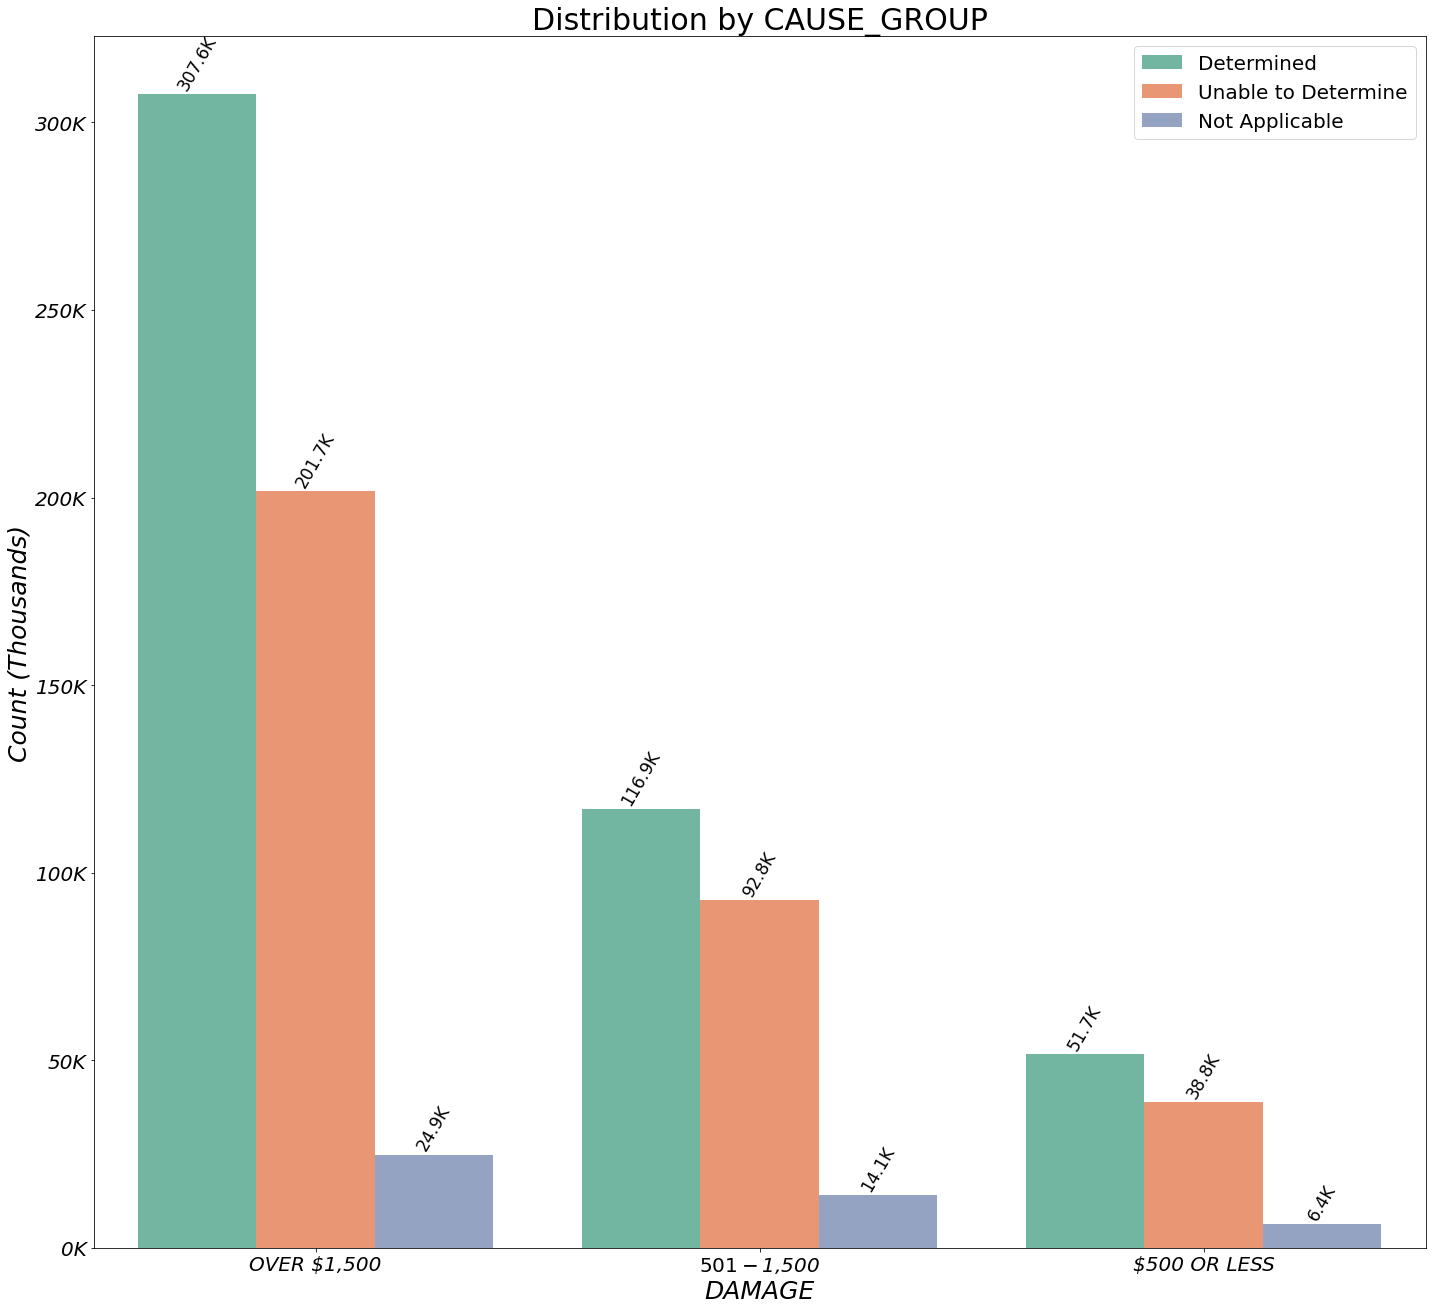

In [13]:
# count plot for 'MOST_SEVERE_INJURY' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'DAMAGE', 'CAUSE_GROUP')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

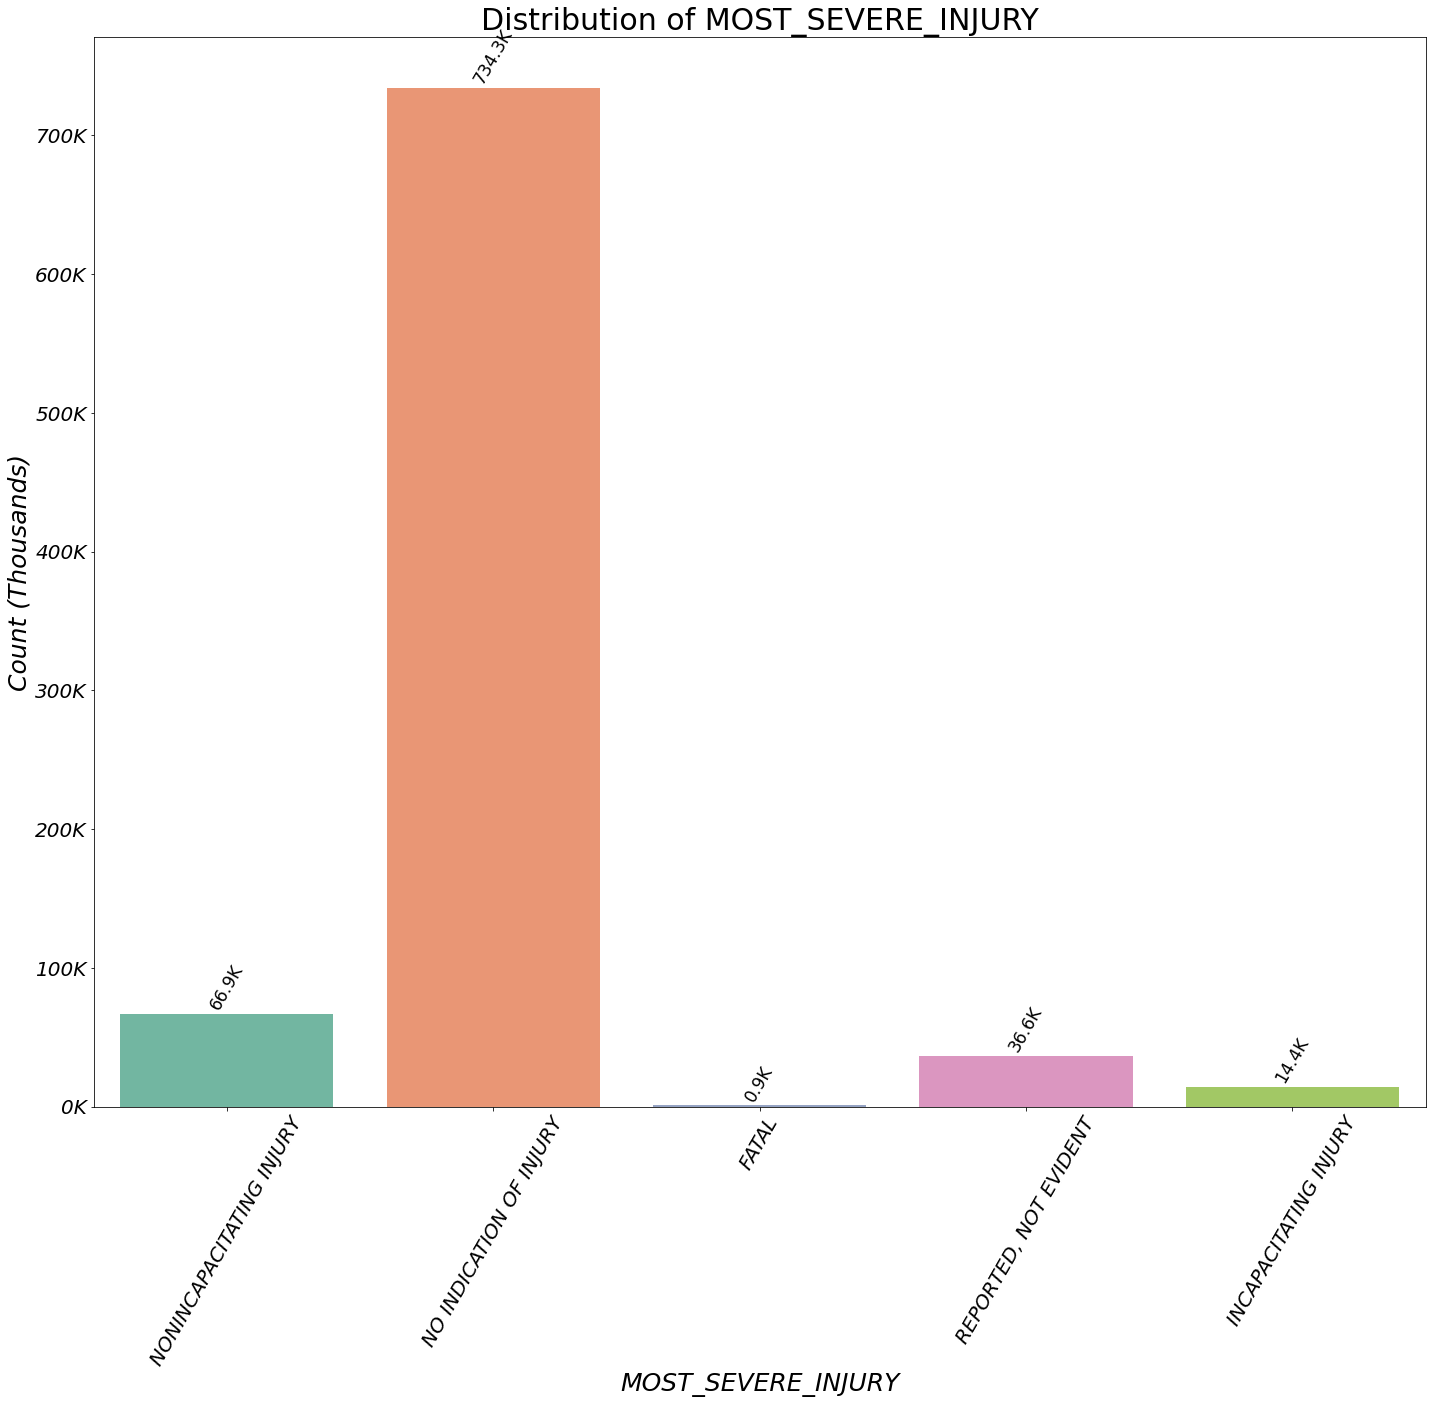

In [14]:
# count plot for 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'MOST_SEVERE_INJURY', None, 'Set2')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# refresh the plot
plt.show()

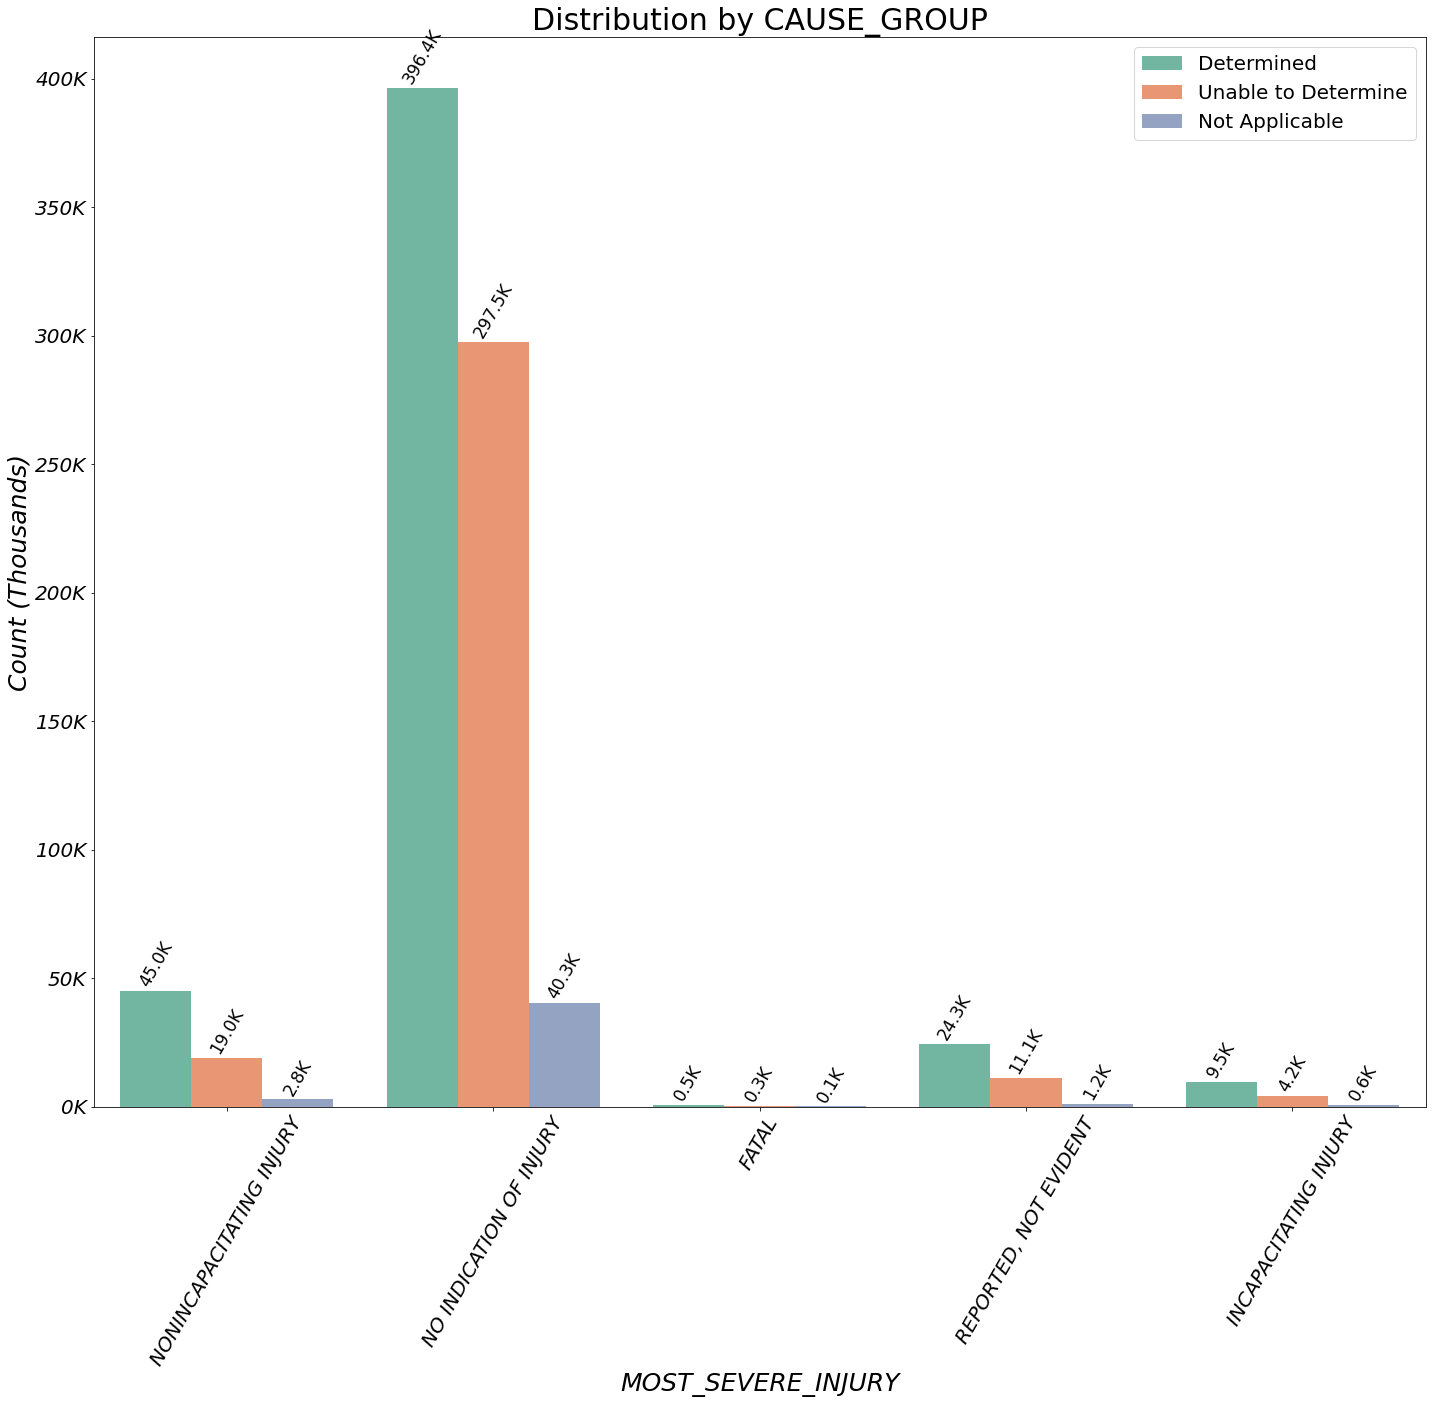

In [15]:
# count plot for MOST_SEVERE_INJURY by CAUSE_GROUP
fig, ax = countplot_df_crashes(df_crashes, 'MOST_SEVERE_INJURY', 'CAUSE_GROUP')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, and Damages.

* The majority of crashes have extensive damages (530k).
* The overwhelming majority of crashes have no injuries (730k).
* Crashes with extensive damages have better (2:1) Determined vs Undetermined cause ratio, whereas the lower damages have close to 1:1 ratio.

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by Posted Speed Limit.

Let's take a look at what are the logged speed limits.

In [16]:
(df_crashes['POSTED_SPEED_LIMIT']).value_counts()

30    629419
35     56933
25     54441
20     35617
15     30448
10     20020
40      8165
0       7507
45      5677
5       4811
55       847
50       260
3        211
9         96
39        88
99        66
60        50
1         41
24        38
2         29
32        19
65        18
34        16
33        13
11        11
26         9
36         8
6          7
70         6
7          5
22         4
18         4
14         4
12         3
29         3
4          2
31         2
23         2
38         2
8          2
62         1
63         1
46         1
44         1
16         1
49         1
Name: POSTED_SPEED_LIMIT, dtype: int64

Since the location is US, most common speed limits would be:

* 20 mph for School, Park, Business/Downtown.
* 25 mph for Residential.
* 30 - 35 mph for Urban.
* 40, 45, 50, 55mph for Expressway.
* 60, 65, 70 mph for Highway.

Although most of these numbers are present, we can also see some bogus entries (1-14) perhaps indicating the speed limit code, 99 indicating no entry, 0 indicating stationary vehicle.

#### Apply mapping to values in 1-14 range and filter out remaining.  

In [74]:
# define the mapping of report codes to speed limits (only values from 1 to 14)
speed_limit_mapping = {
    0: 0,
    1: 5,
    2: 10,
    3: 15,
    4: 20,
    5: 25,
    6: 30,
    7: 35,
    8: 40,
    9: 45,
    10: 50,
    11: 55,
    12: 60,
    13: 65,
    14: 70
}

# apply the mapping only to values in the range 1-14
df_crashes['posted_speed_limit_(mph)'] = df_crashes['POSTED_SPEED_LIMIT'].apply(
    lambda x: speed_limit_mapping[x] if x in speed_limit_mapping else x)

# filter out rows where 'Posted Speed Limit (mph)' is not in the speed limit mapping values
# convert mapping values to a set for faster lookup
valid_speed_limits = set(speed_limit_mapping.values())  

df_filtered = df_crashes[df_crashes['posted_speed_limit_(mph)'].isin(valid_speed_limits)]

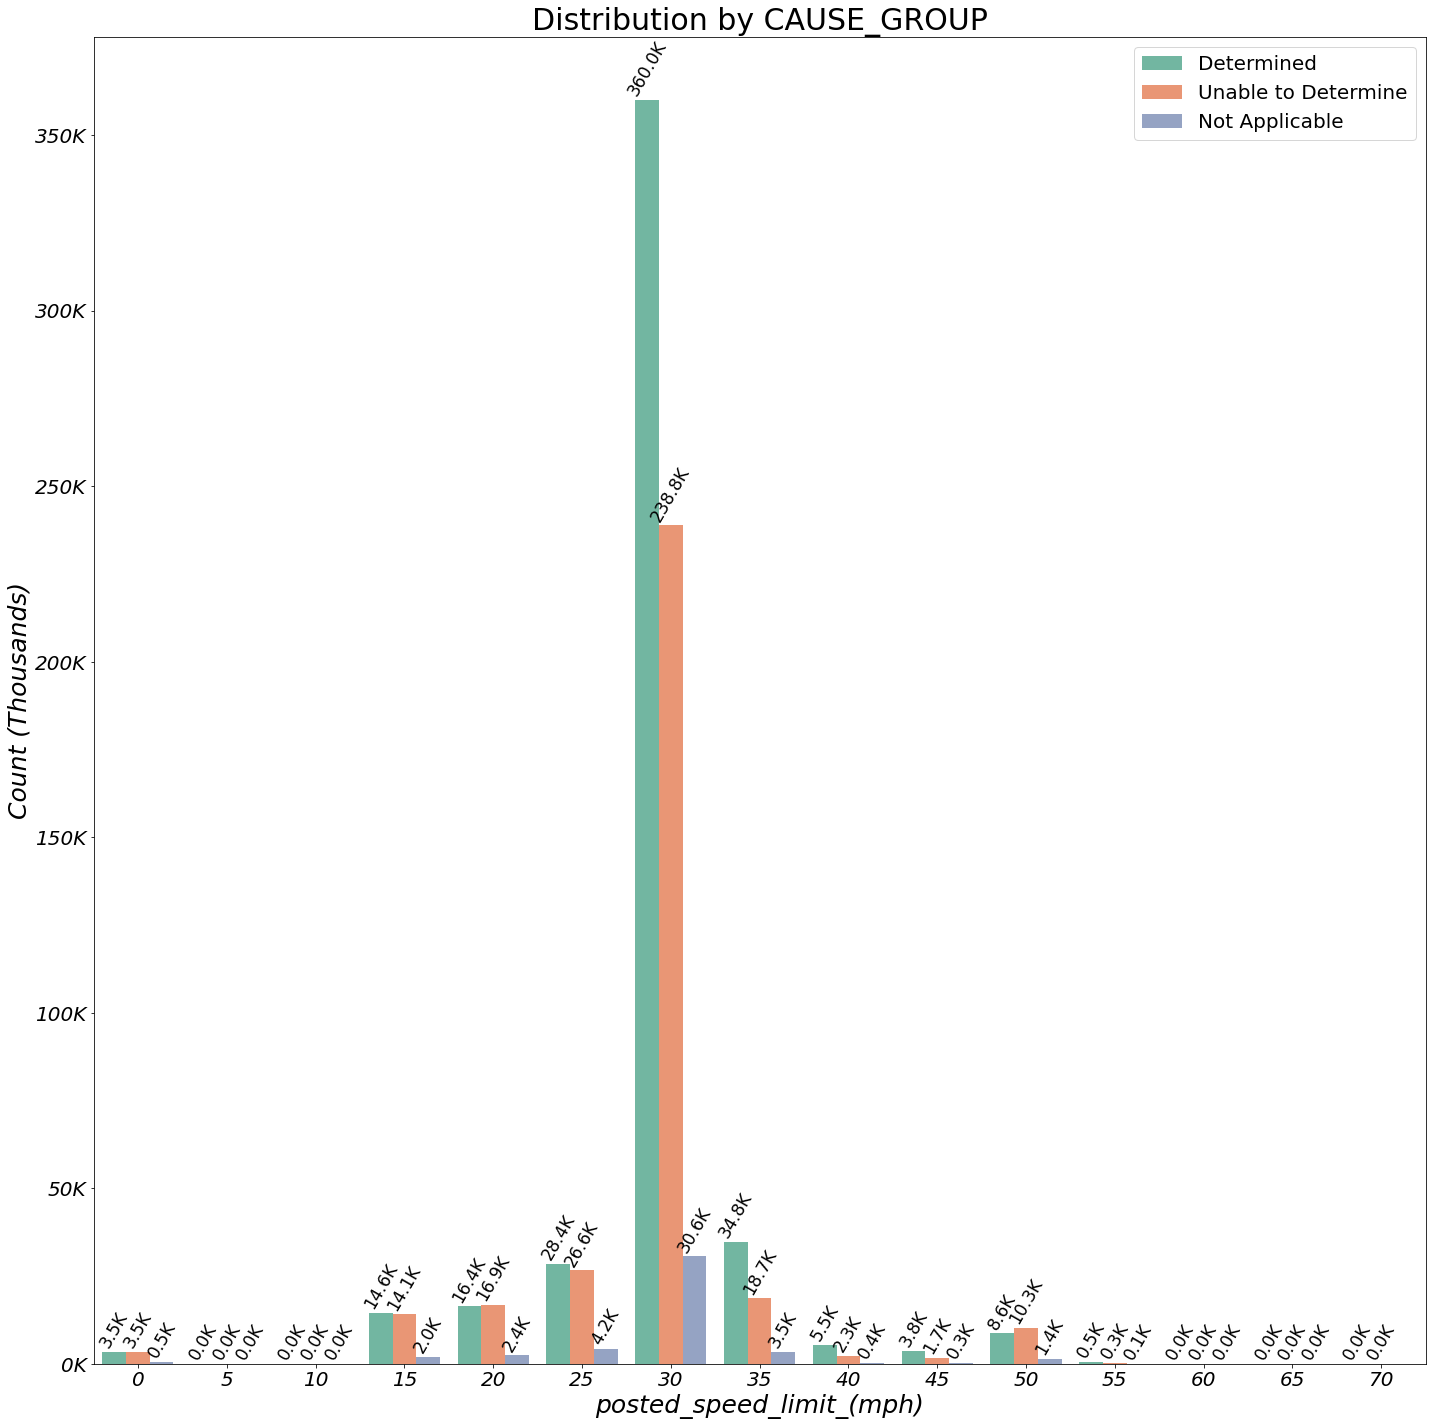

In [75]:
# count plot for 'POSTED_SPEED_LIMIT' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_filtered, 'posted_speed_limit_(mph)', 'CAUSE_GROUP')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

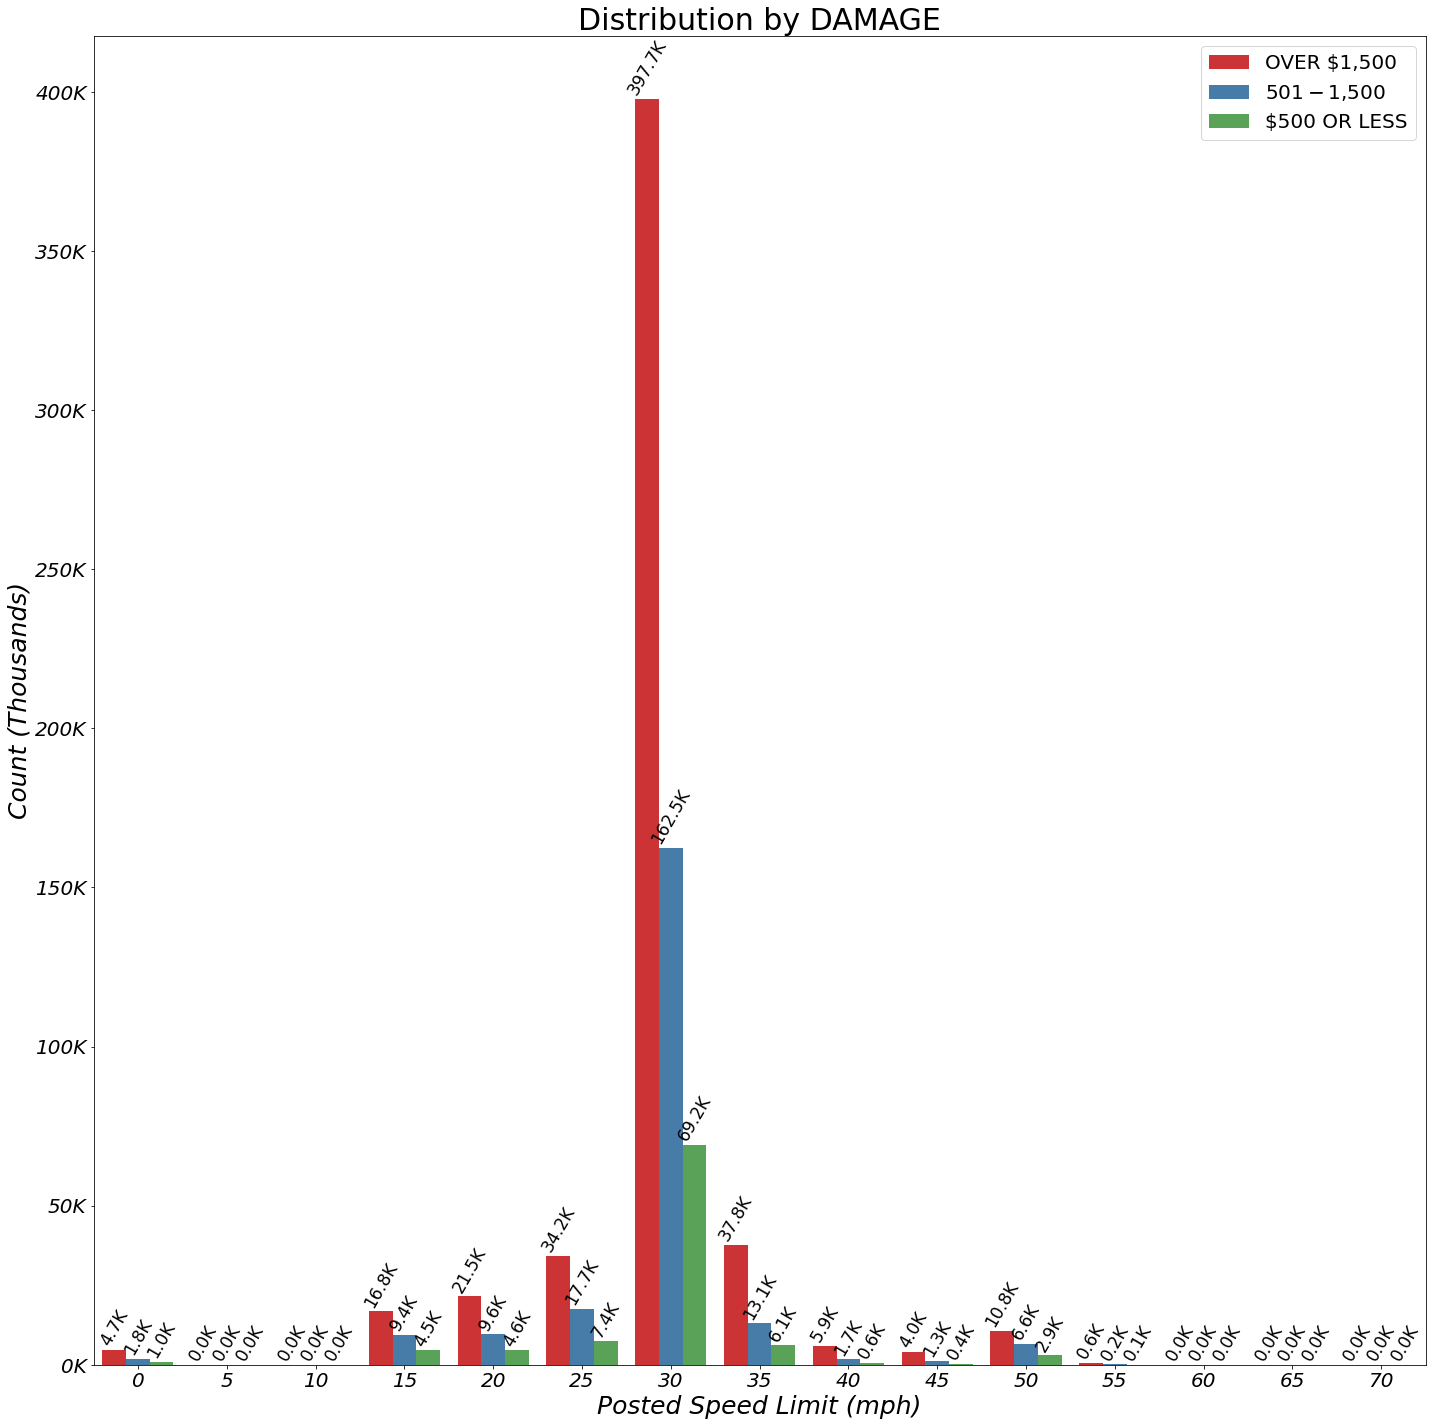

In [19]:
# count plot for 'POSTED_SPEED_LIMIT' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_filtered, 'posted_speed_limit_(mph)', 'DAMAGE', 'Set1')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

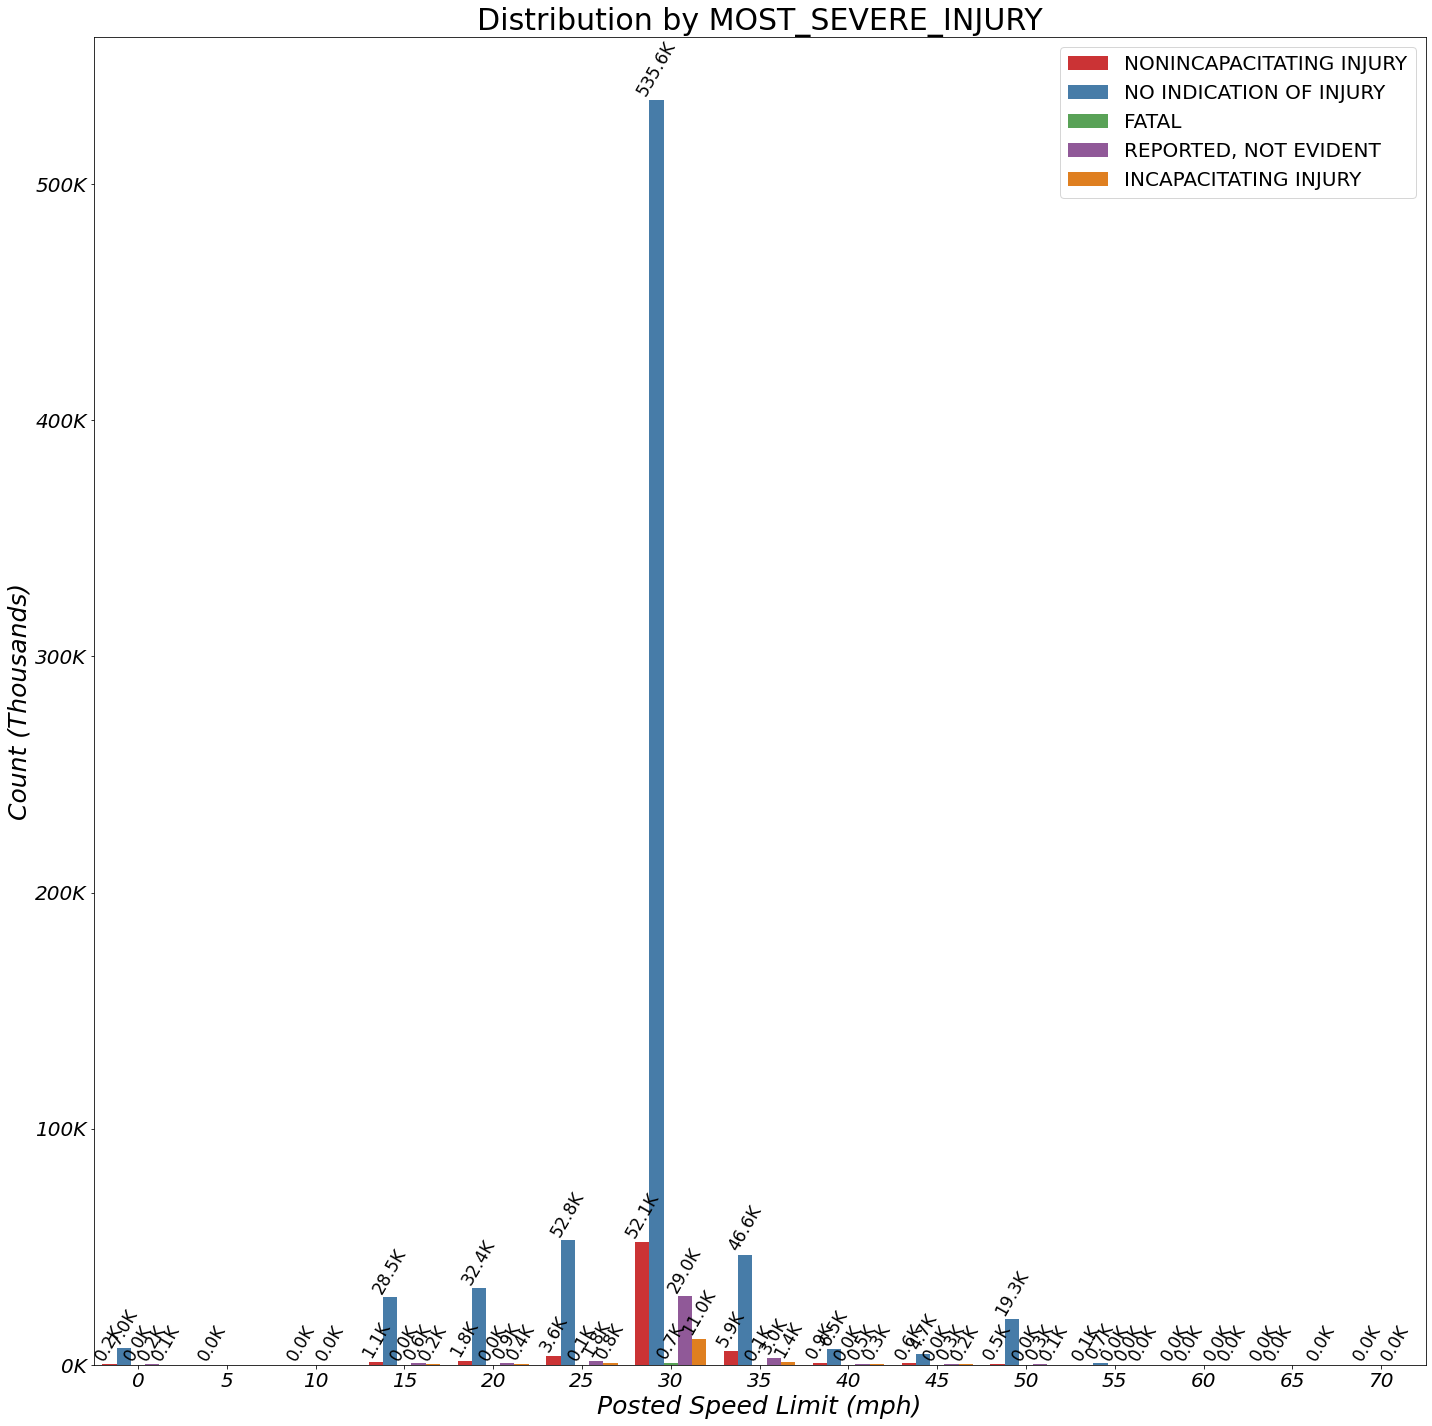

In [20]:
# count plot for 'POSTED_SPEED_LIMIT' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_filtered, 'posted_speed_limit_(mph)', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, and Damages vs Speed Limit.

* Majority of crashes occurs in 25-35 mph speed limit.
* Crashes in 30-35 mph zone have the best Determined:Undetermined ratio.
* Crashes in 30-35 mph zonehave the most damage.

### Crashes EDA: Visualizing Primary Cause Determination by Injury Severity, Damages and Weather Condition.

In [21]:
(df_crashes['WEATHER_CONDITION']).value_counts()

CLEAR                       670917
RAIN                         75097
UNKNOWN                      47956
SNOW                         28397
CLOUDY/OVERCAST              25174
OTHER                         2681
FREEZING RAIN/DRIZZLE         1728
FOG/SMOKE/HAZE                1346
SLEET/HAIL                    1010
BLOWING SNOW                   444
SEVERE CROSS WIND GATE         153
BLOWING SAND, SOIL, DIRT         7
Name: WEATHER_CONDITION, dtype: int64

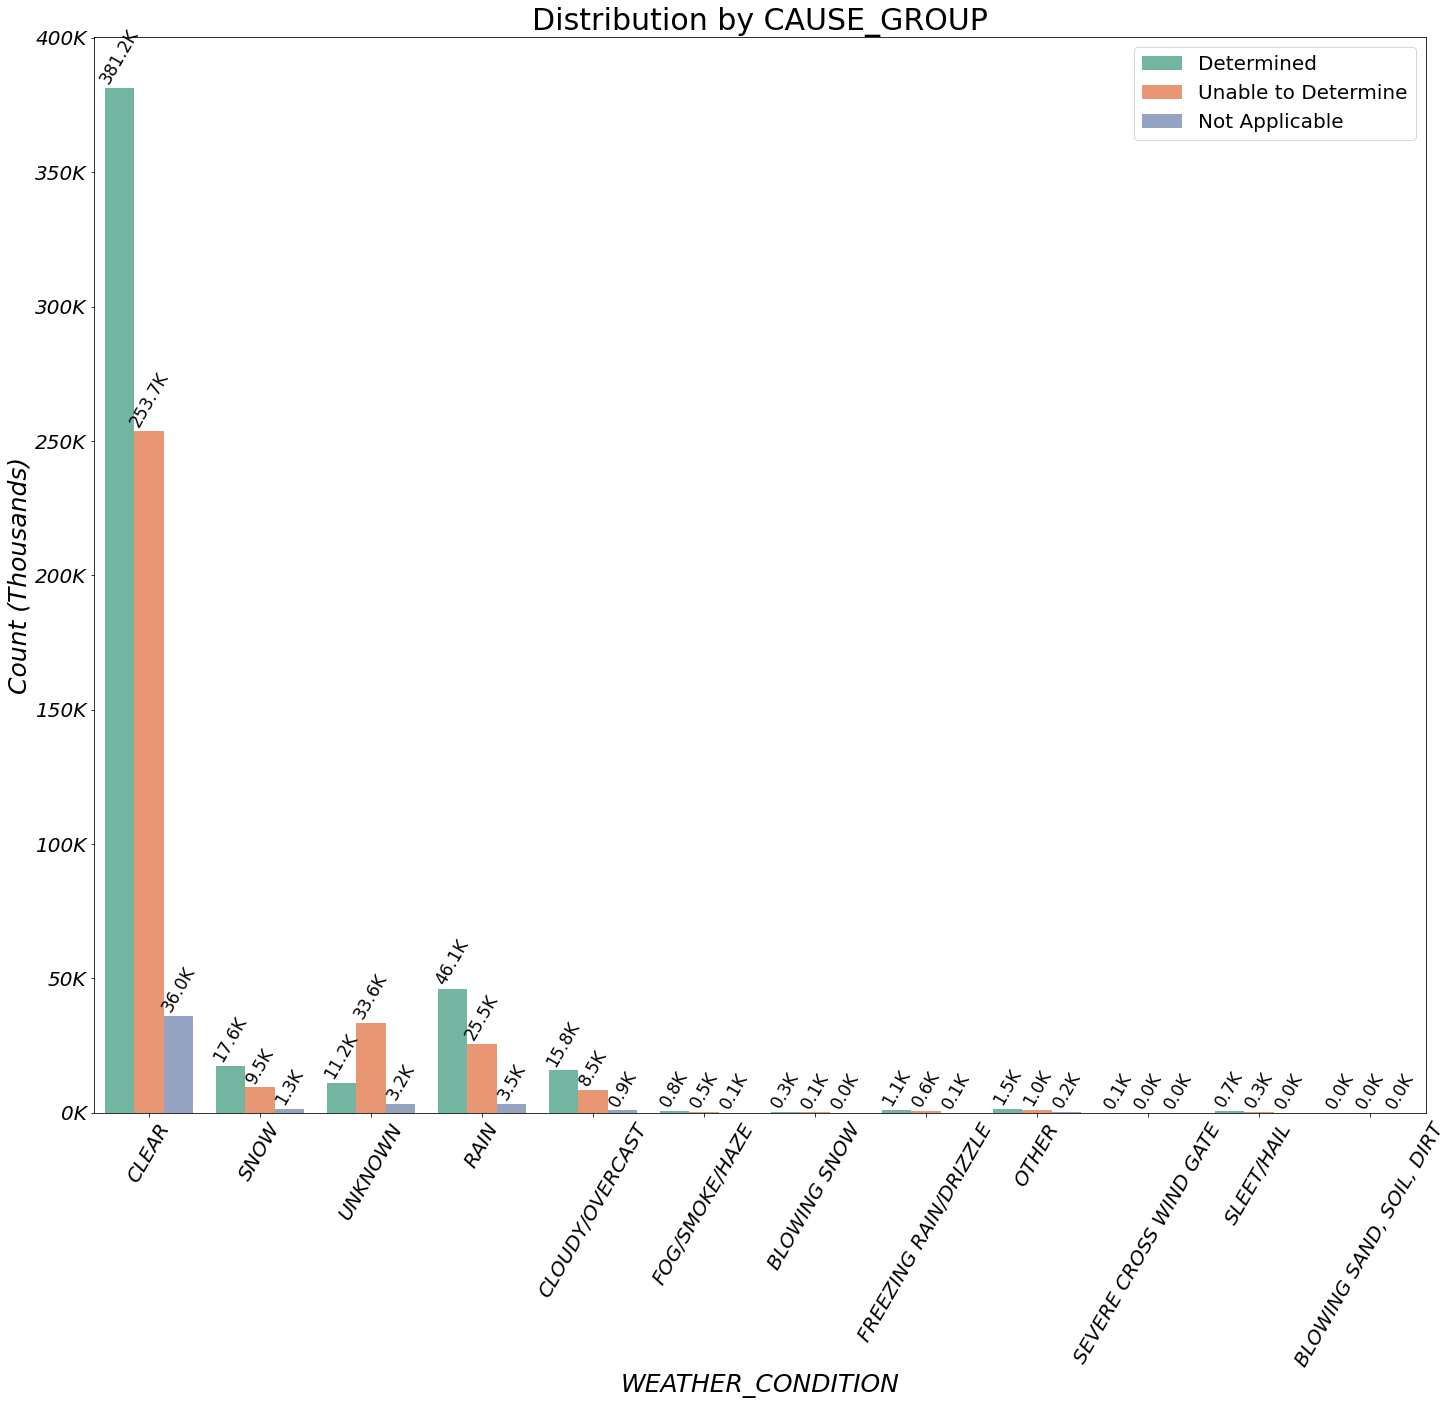

In [22]:
# count plot for 'WEATHER_CONDITION' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'WEATHER_CONDITION', 'CAUSE_GROUP')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# refresh the plot
plt.show()

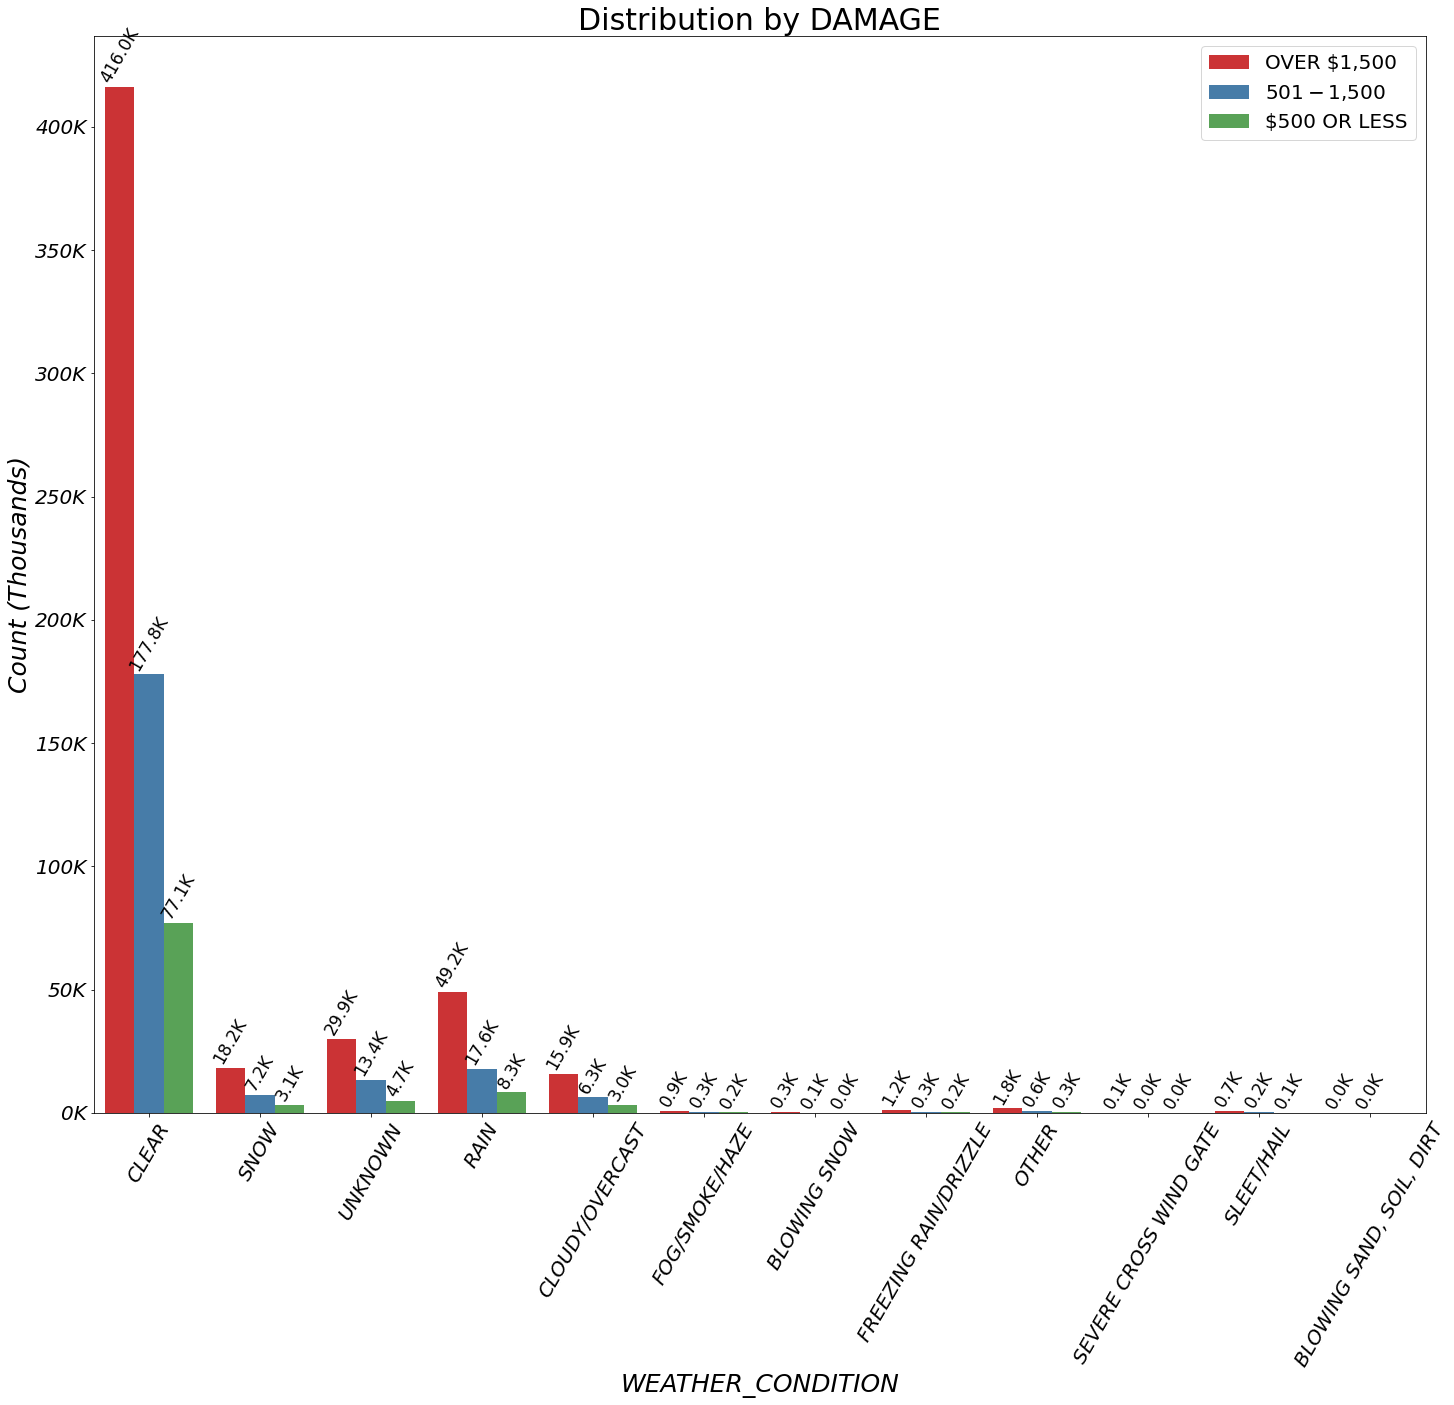

In [23]:
# count plot for 'WEATHER_CONDITION' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'WEATHER_CONDITION', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, and Damages vs Weather Condition.

* The majority of crashes occur in clear weather. The second largest amount of crashes occurs in rain.

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by First Crash Type.

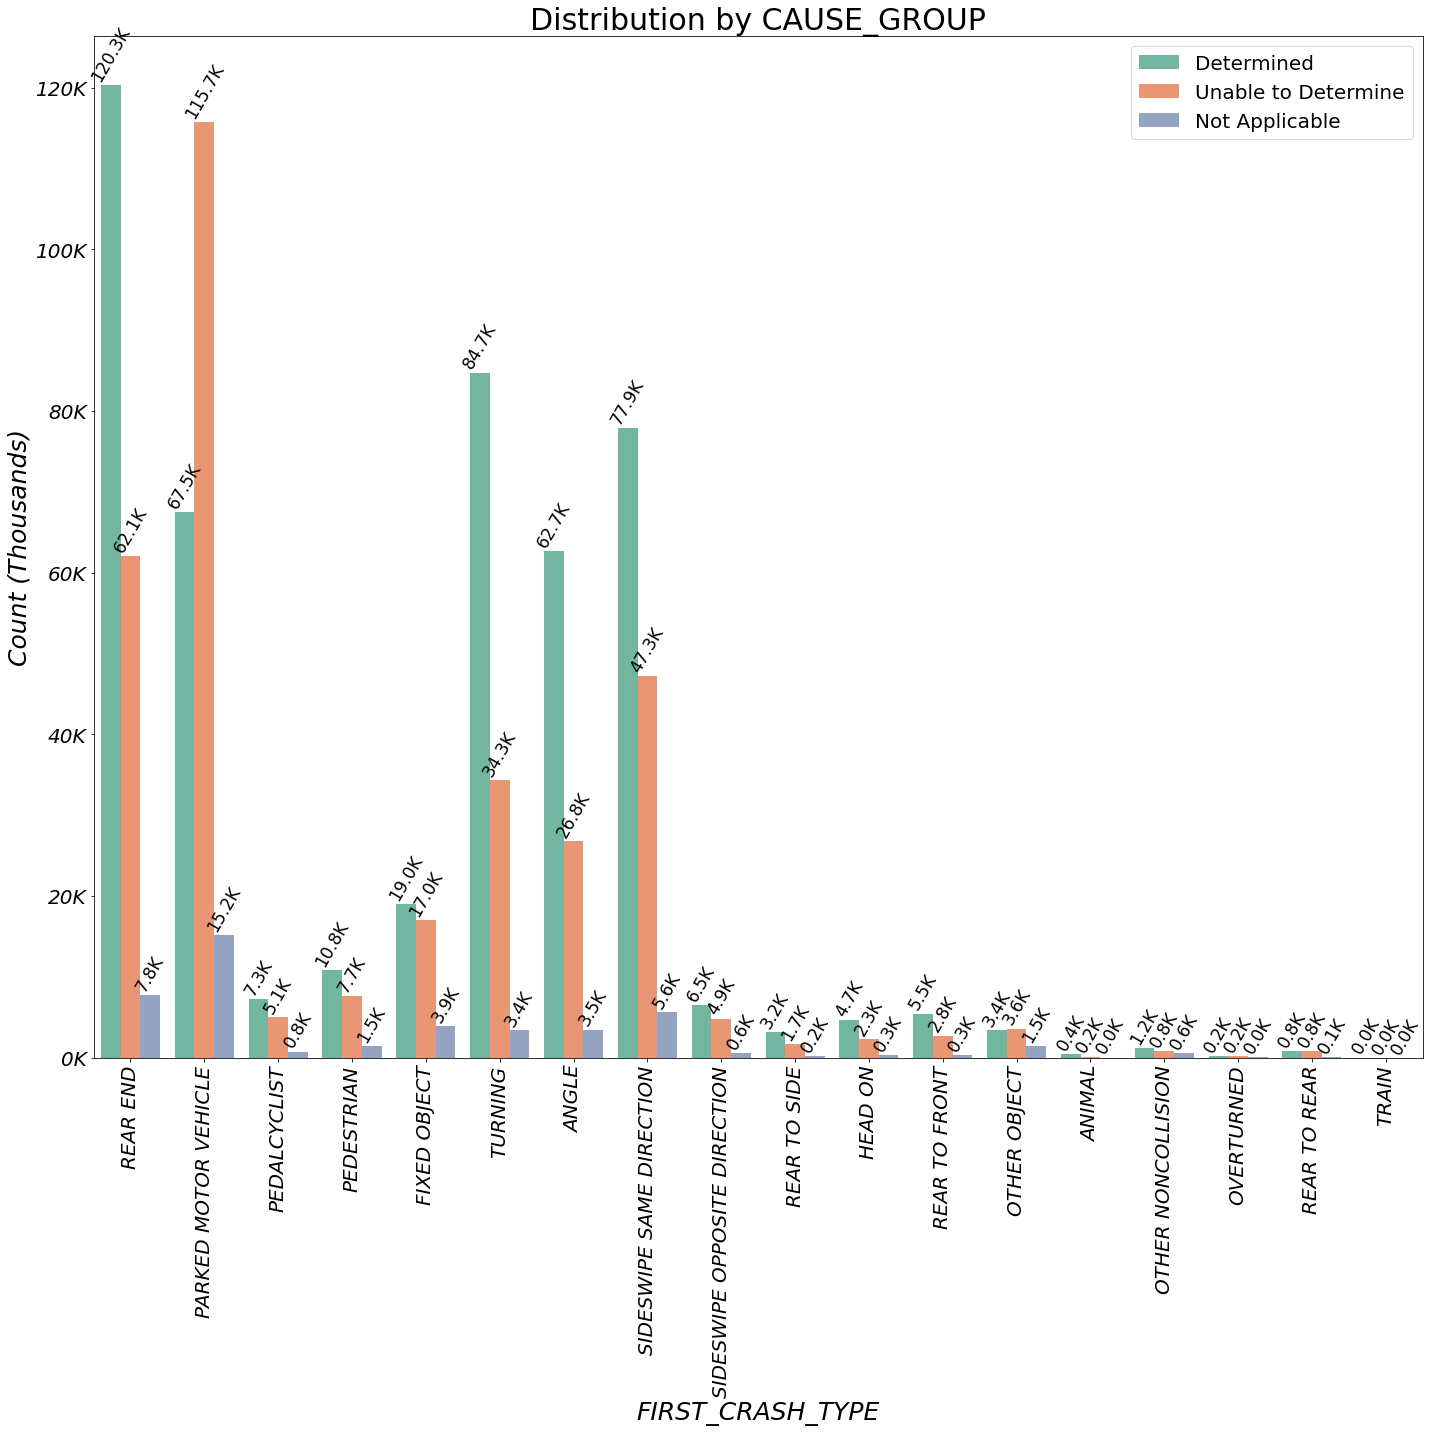

In [24]:
# count plot for 'FIRST_CRASH_TYPE' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'FIRST_CRASH_TYPE', 'CAUSE_GROUP')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

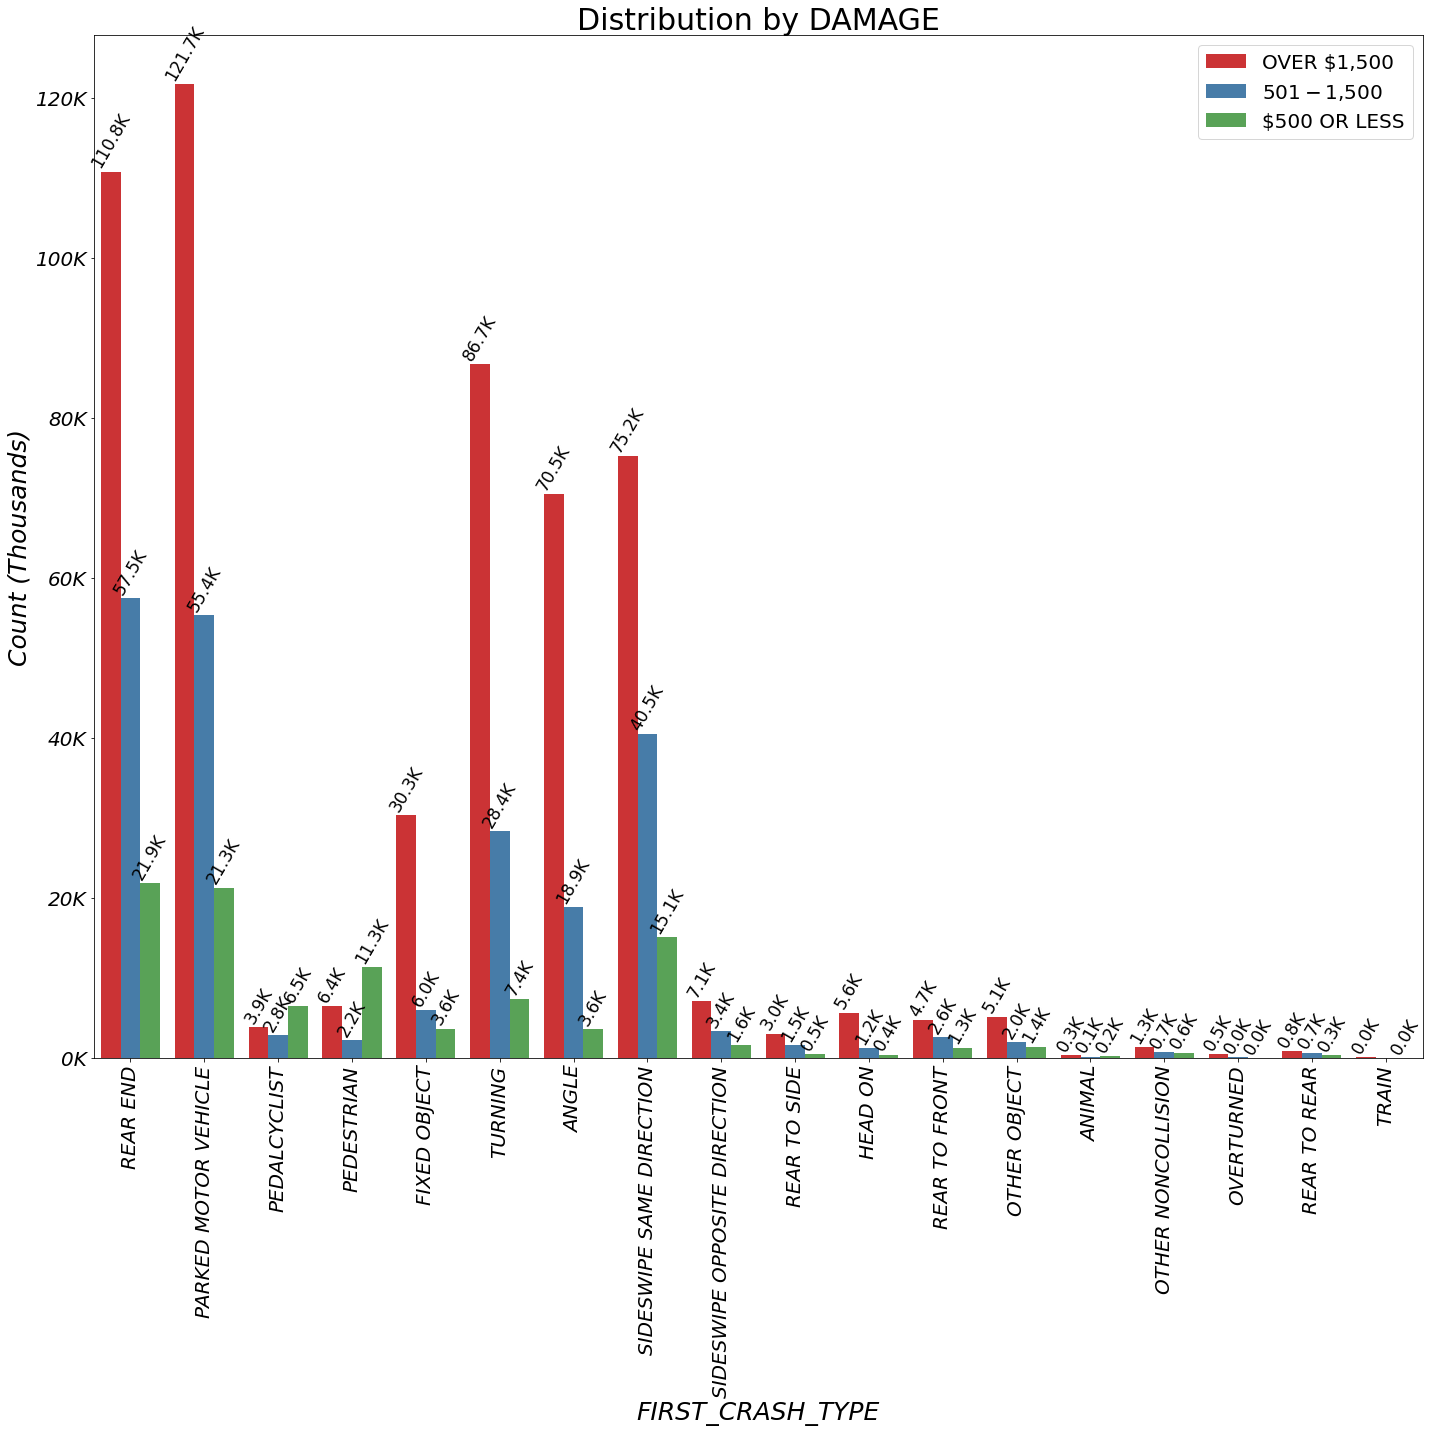

In [25]:
# count plot for 'FIRST_CRASH_TYPE' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'FIRST_CRASH_TYPE', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

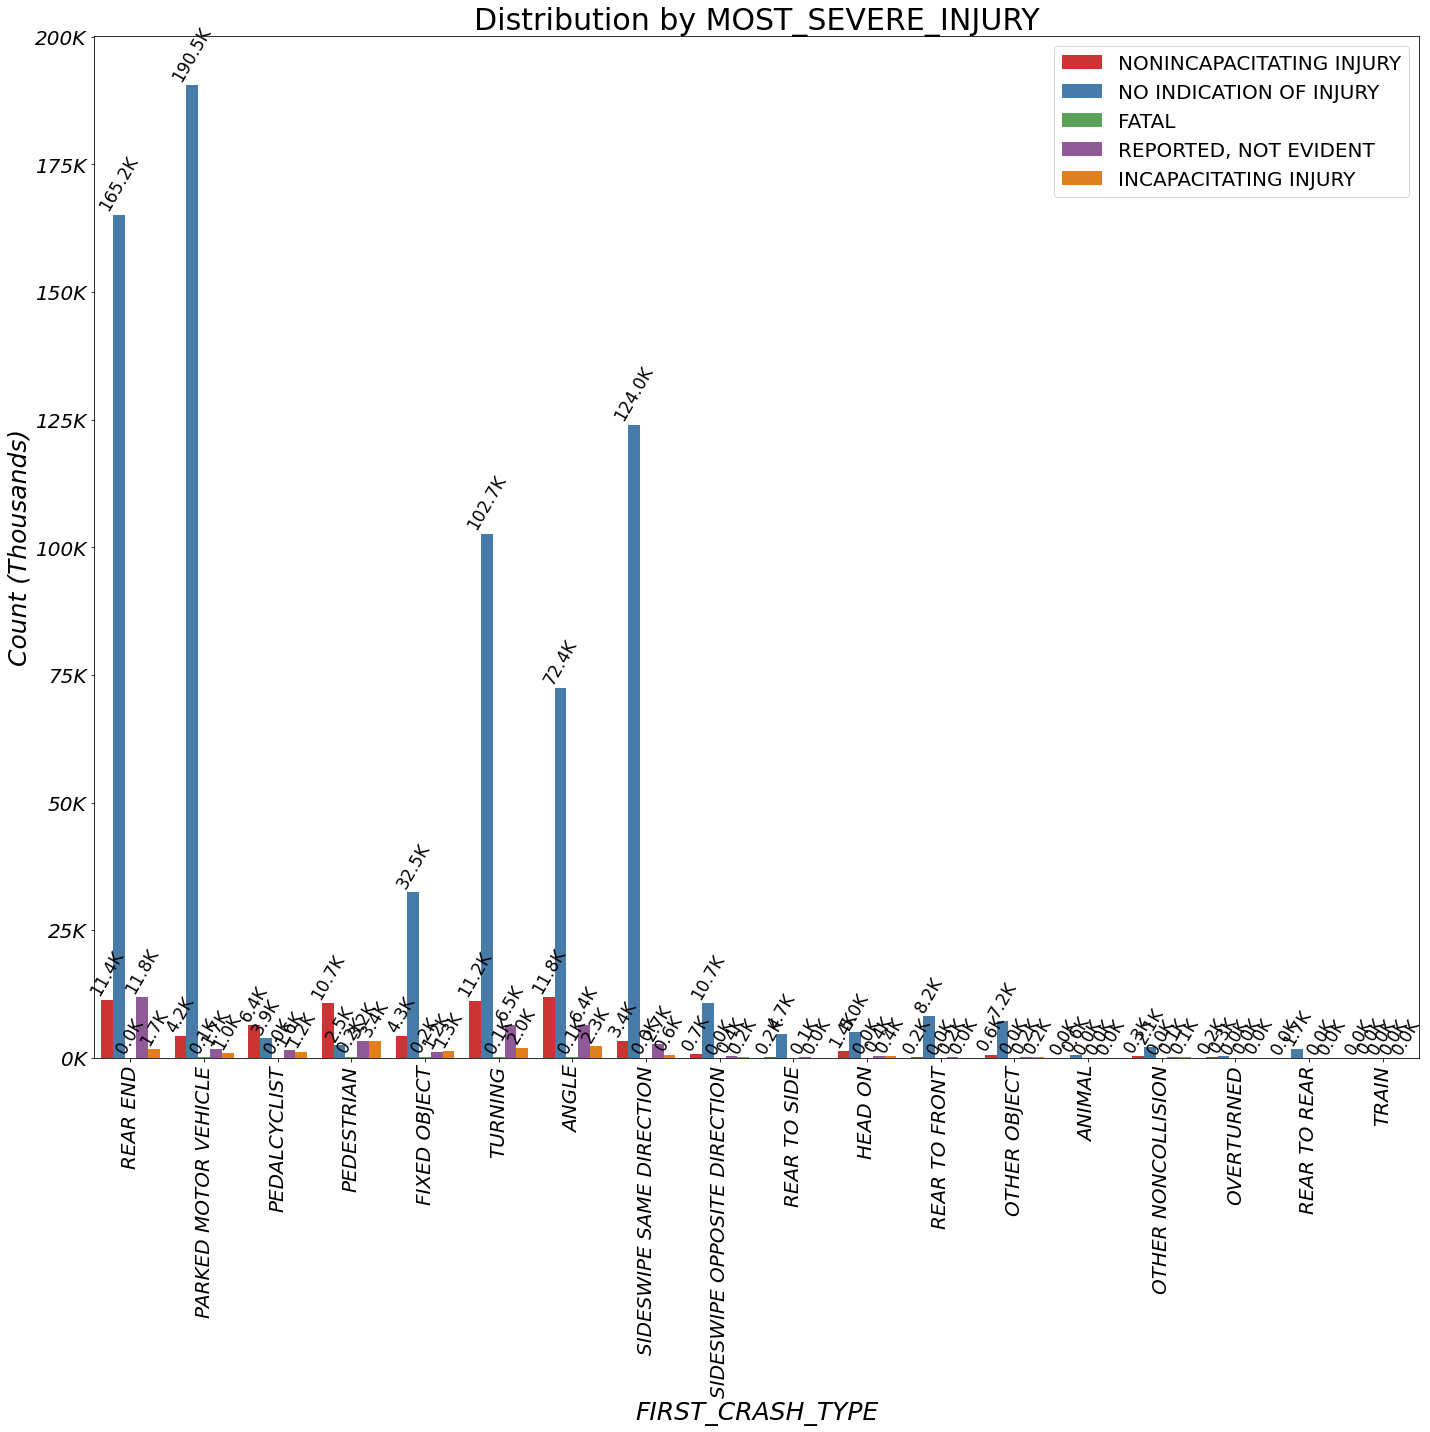

In [26]:
# count plot for 'FIRST_CRASH_TYPE' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'FIRST_CRASH_TYPE', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, and Damages by First Crash Type.

* Parked motor vehicle had the highest amount of damages and has the highest undetermined amount of crash causes.

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by Time (Day, Hour, Month).

We're going to look at the distribution of causes, damages, aind injuries by time of the day (`CRASH_HOUR`), week (`CRASH_DAY_OF_WEEK`), and month(`CRASH_MONTH`).

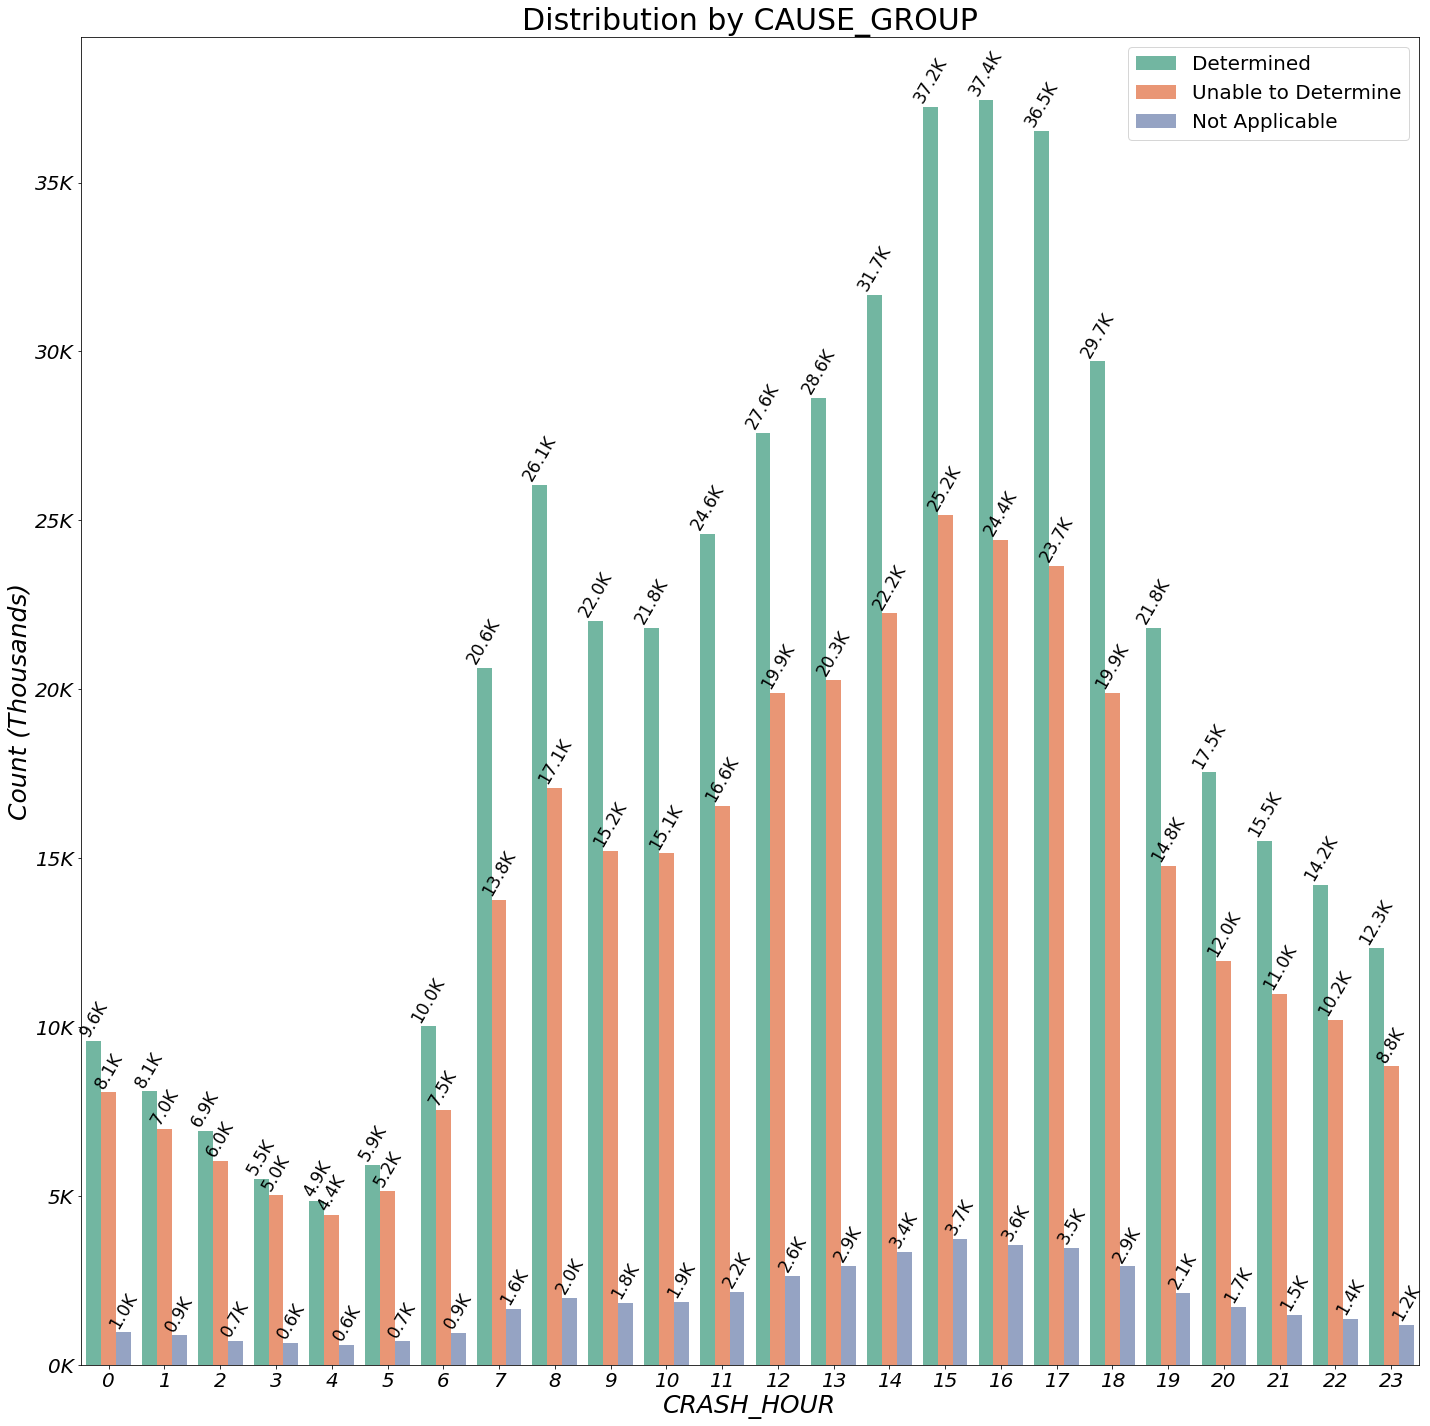

In [27]:
# count plot for 'CRASH_HOUR' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_HOUR', 'CAUSE_GROUP')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

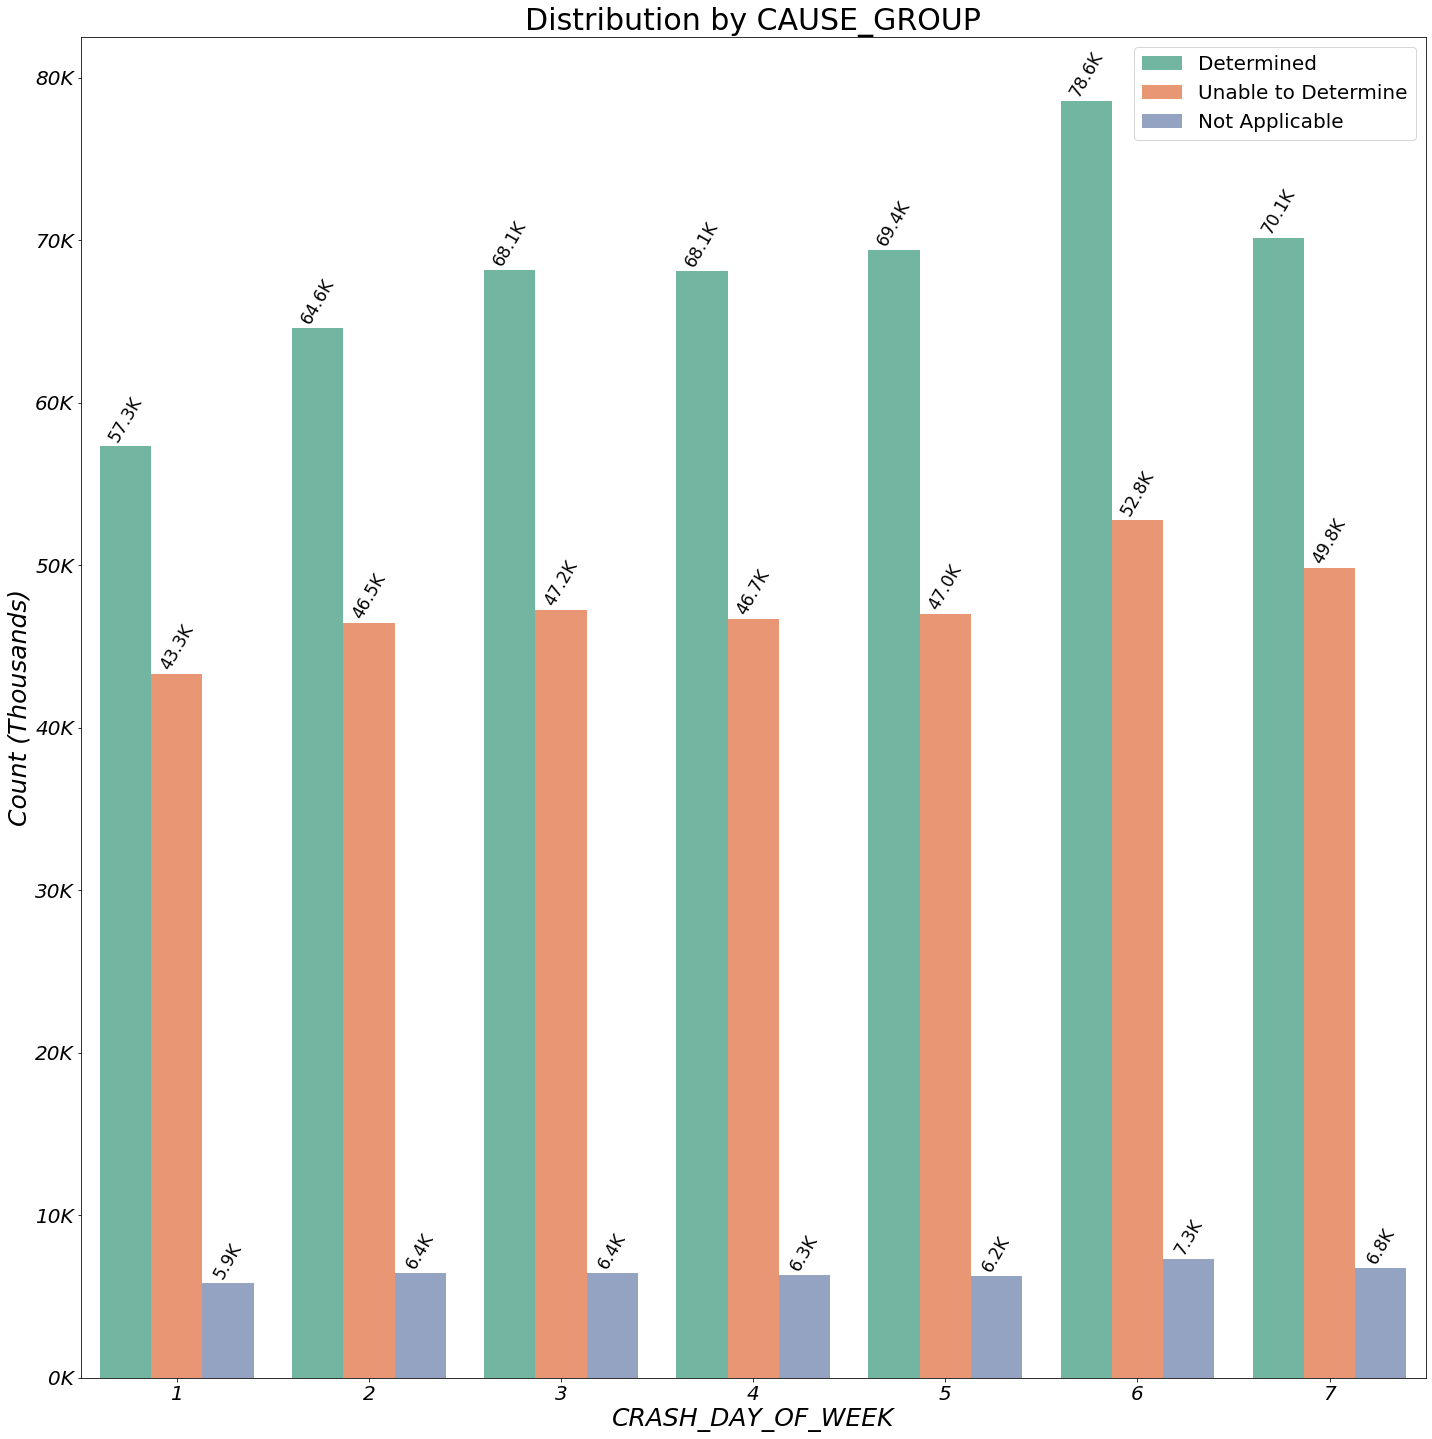

In [28]:
# count plot for 'CRASH_DAY_OF_WEEK' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_DAY_OF_WEEK', 'CAUSE_GROUP')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

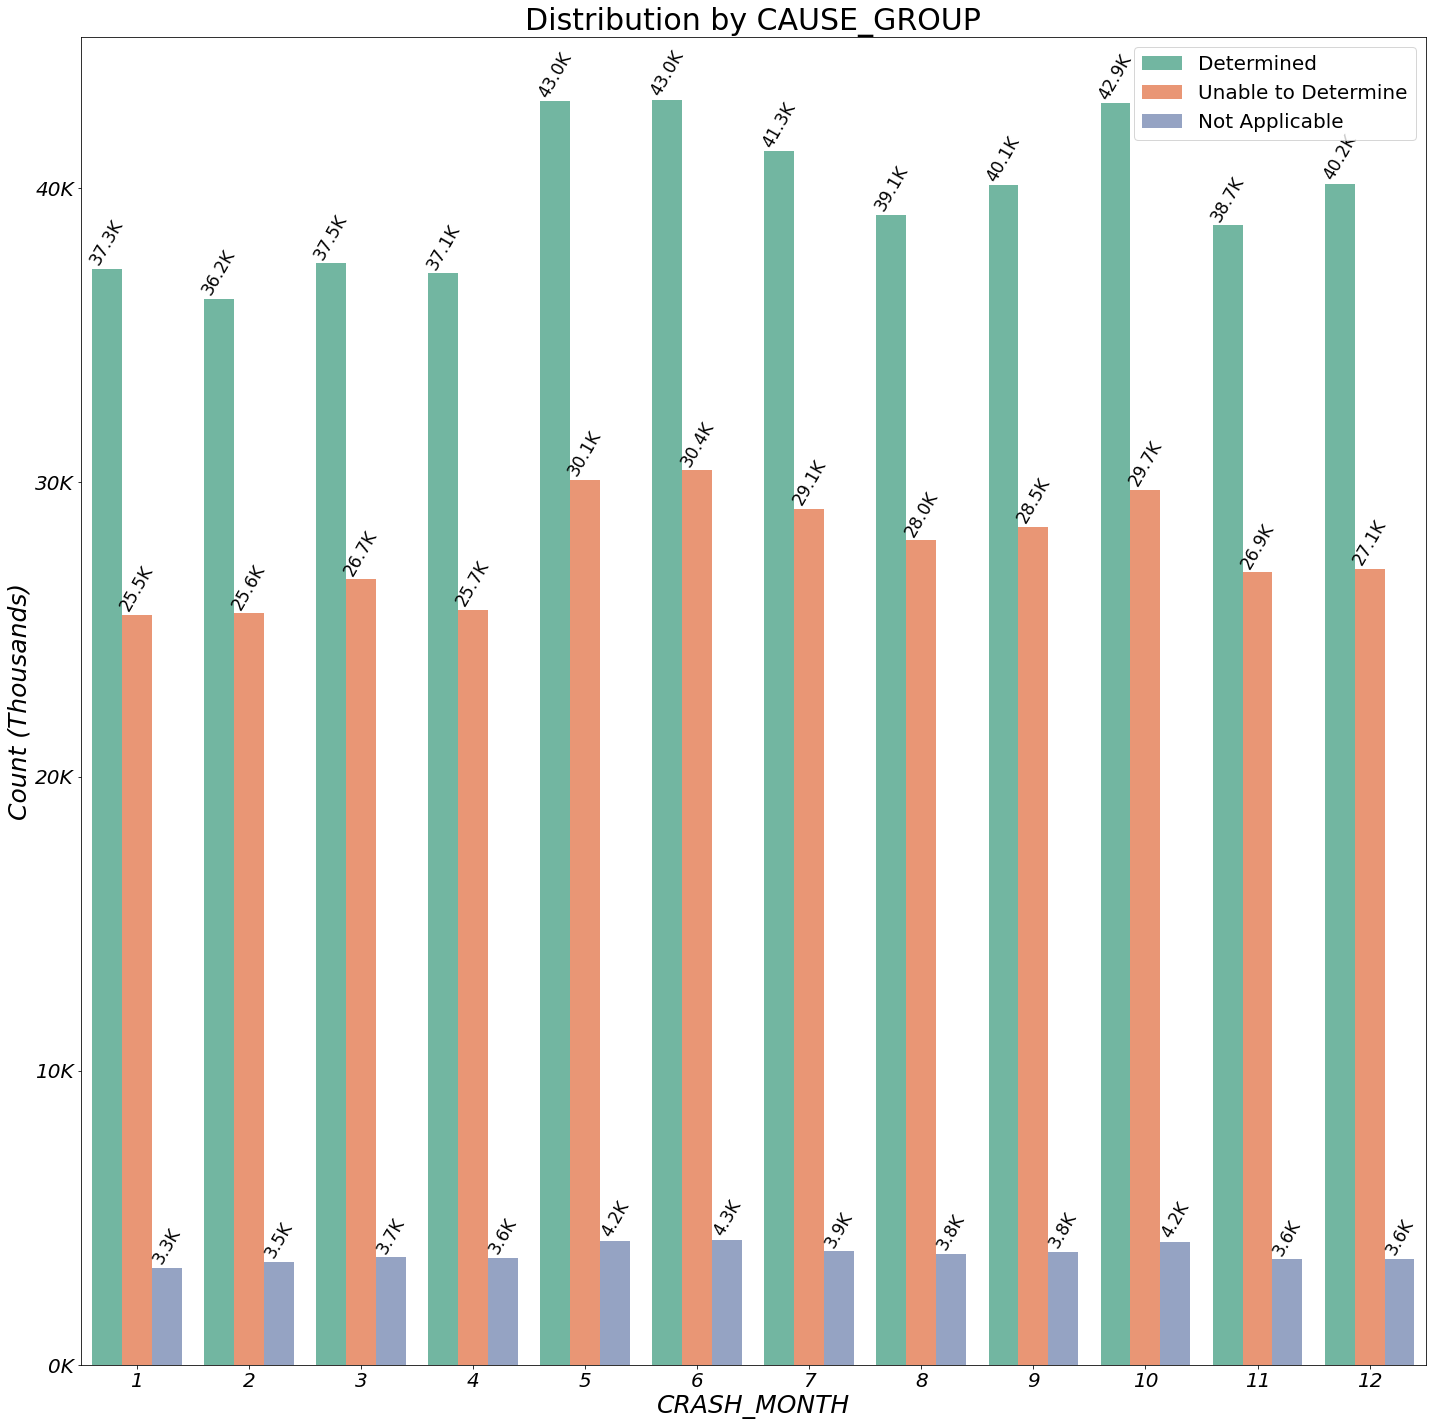

In [29]:
# count plot for 'CRASH_MONTH' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_MONTH', 'CAUSE_GROUP')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

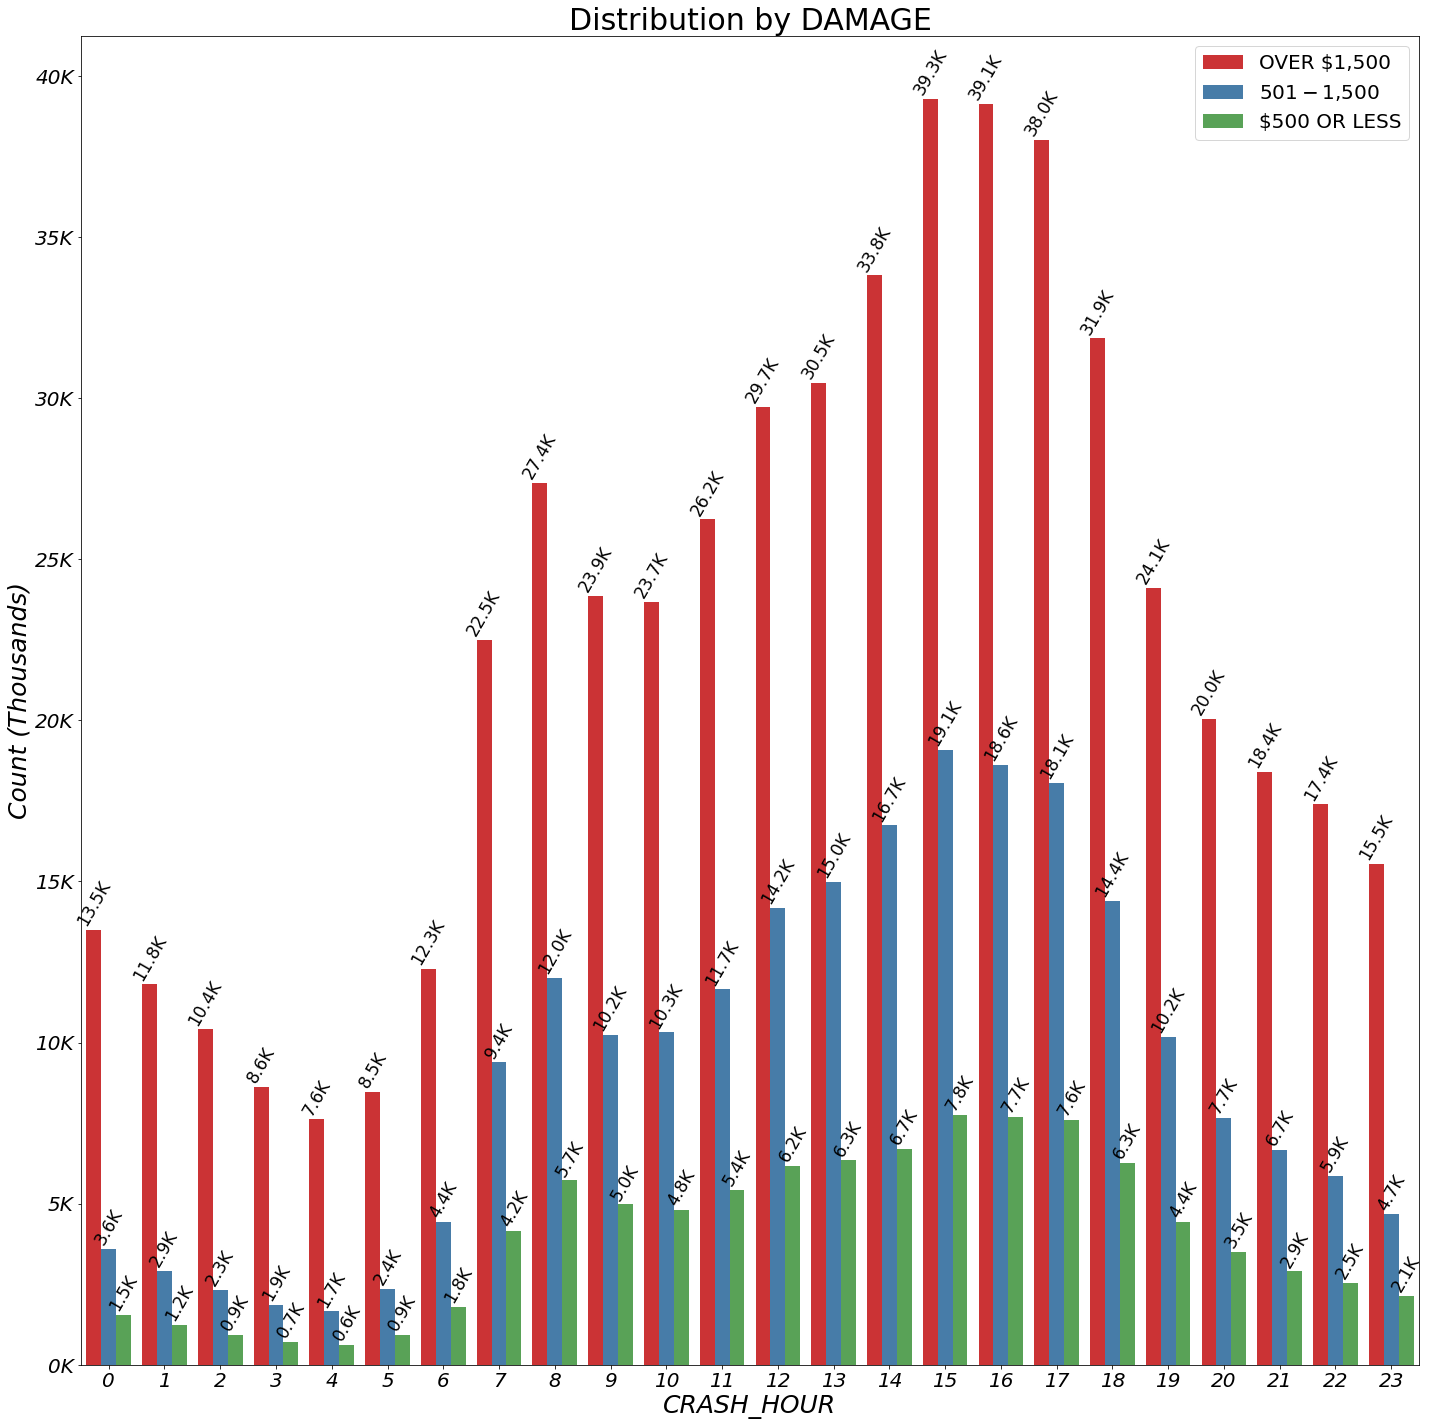

In [30]:
# count plot for 'CRASH_HOUR' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_HOUR', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

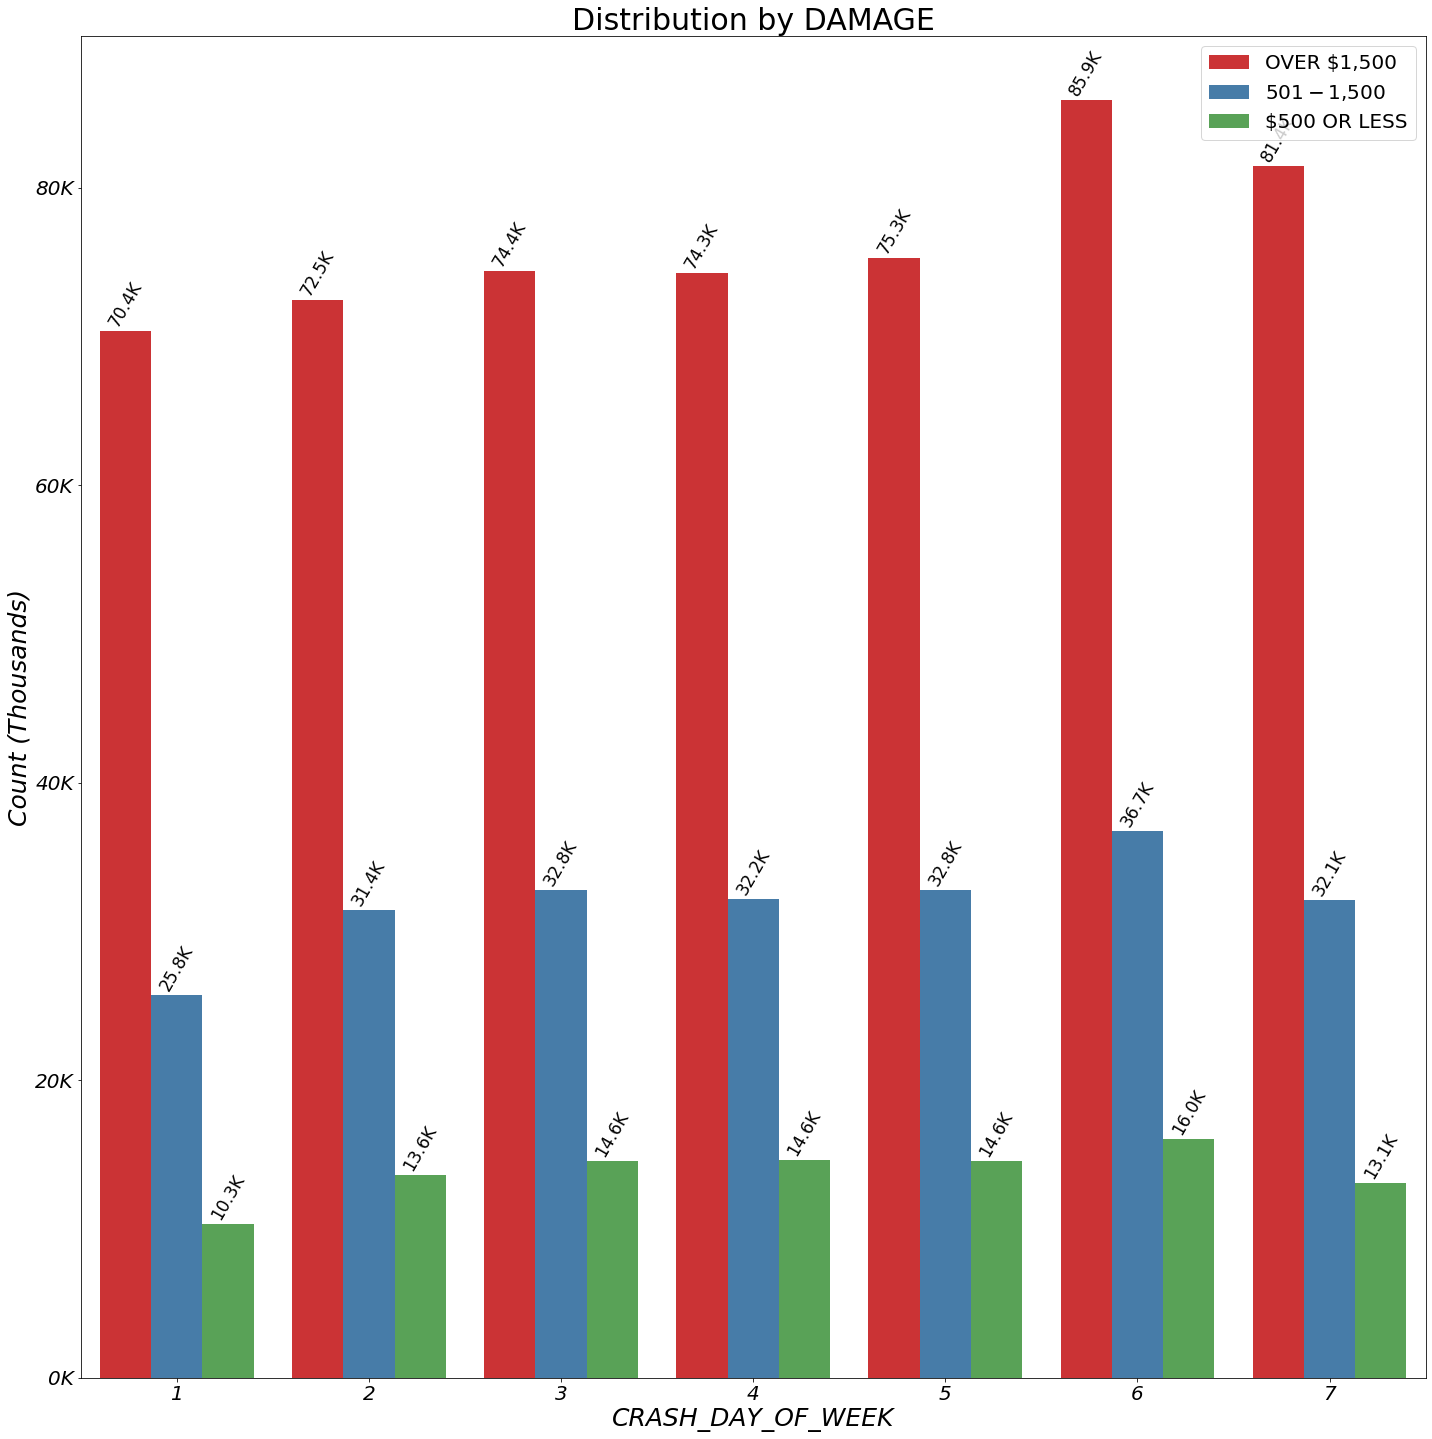

In [31]:
# count plot for 'CRASH_DAY_OF_WEEK' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_DAY_OF_WEEK', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

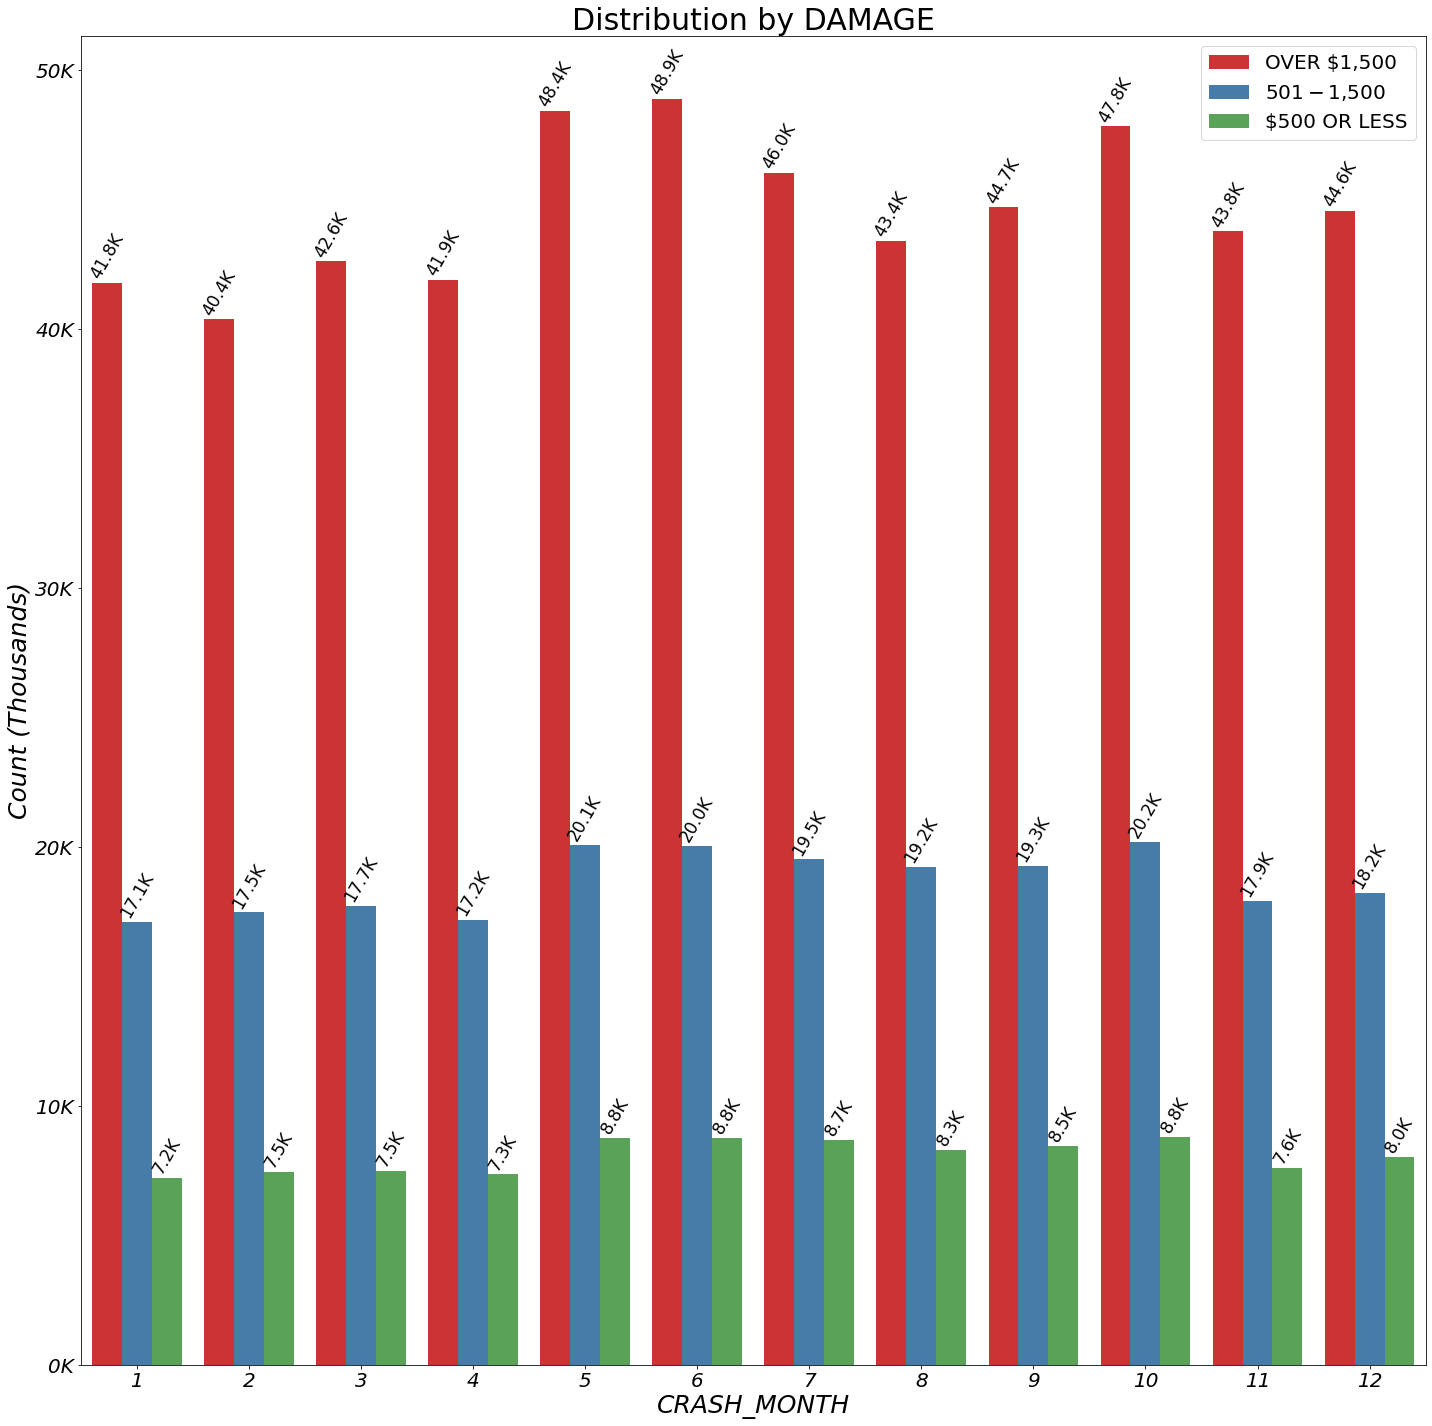

In [32]:
# count plot for 'CRASH_MONTH' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_MONTH', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

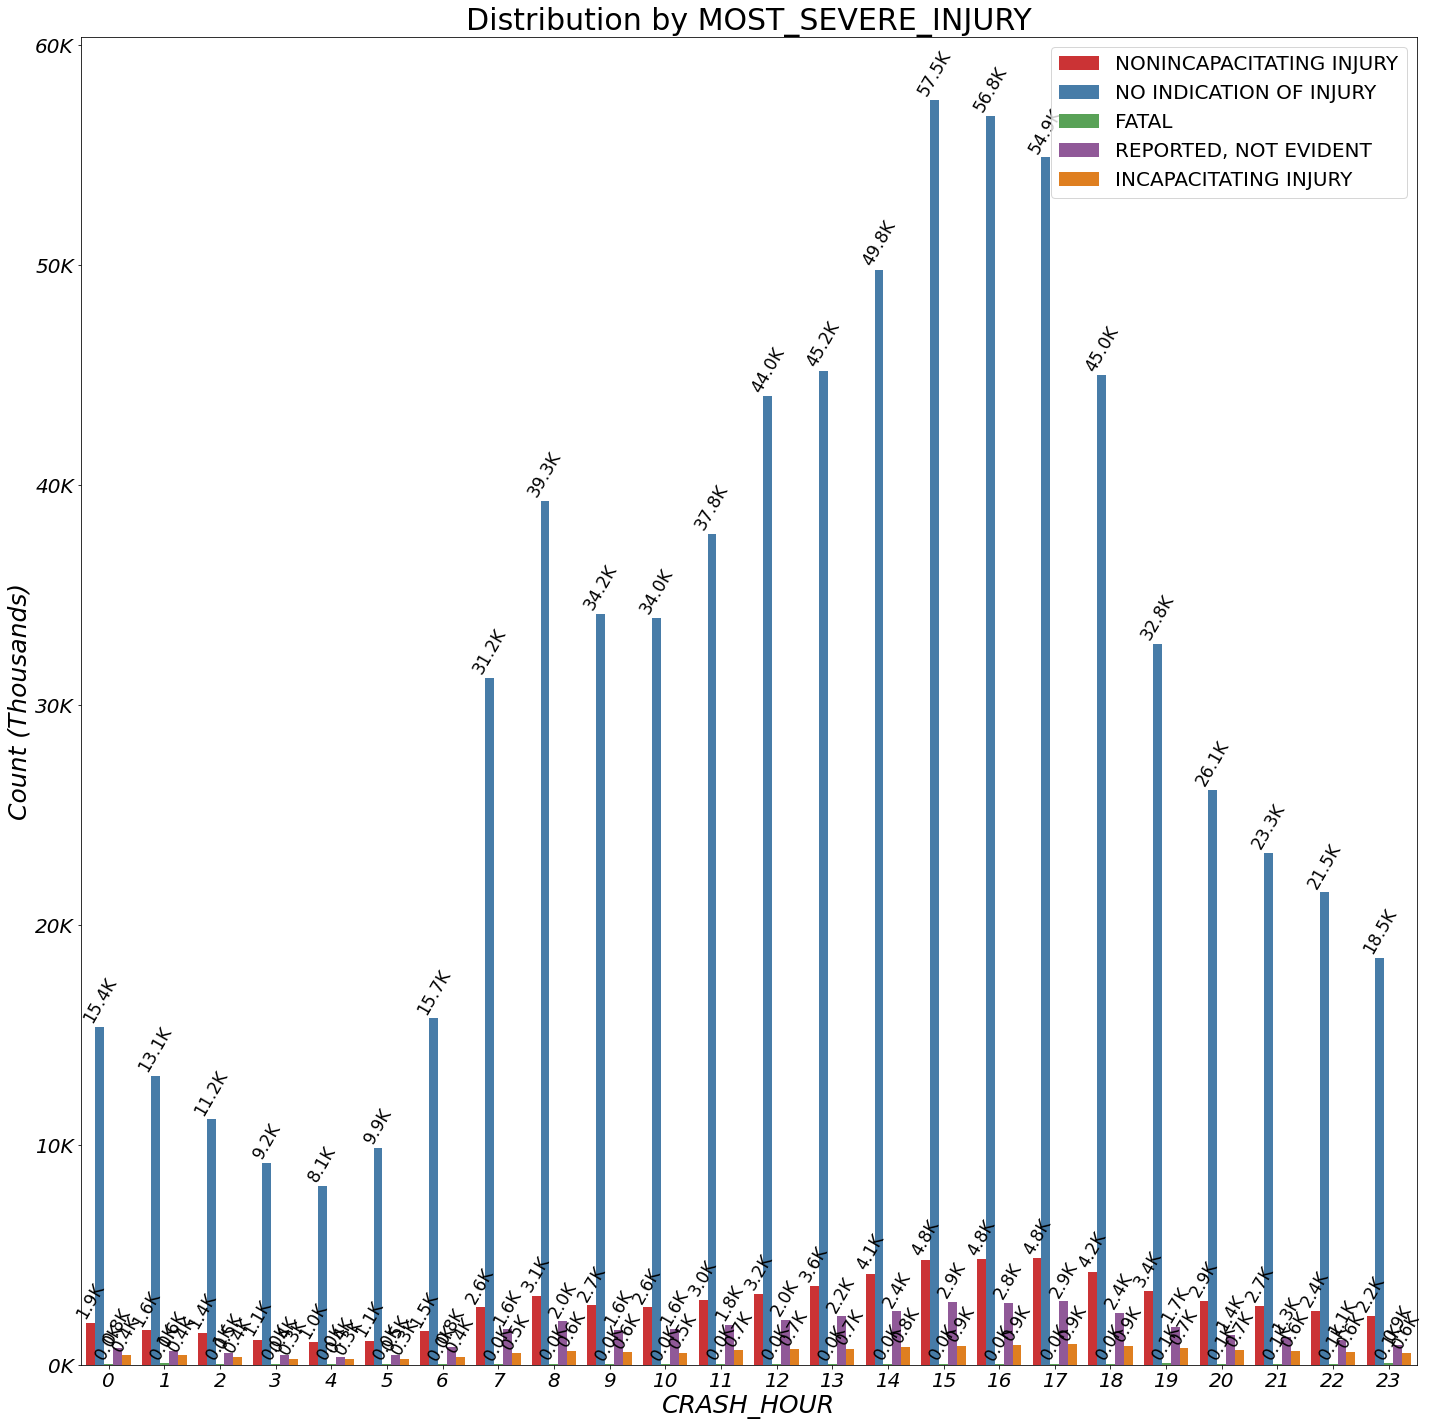

In [33]:
# count plot for 'CRASH_HOUR' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_HOUR', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

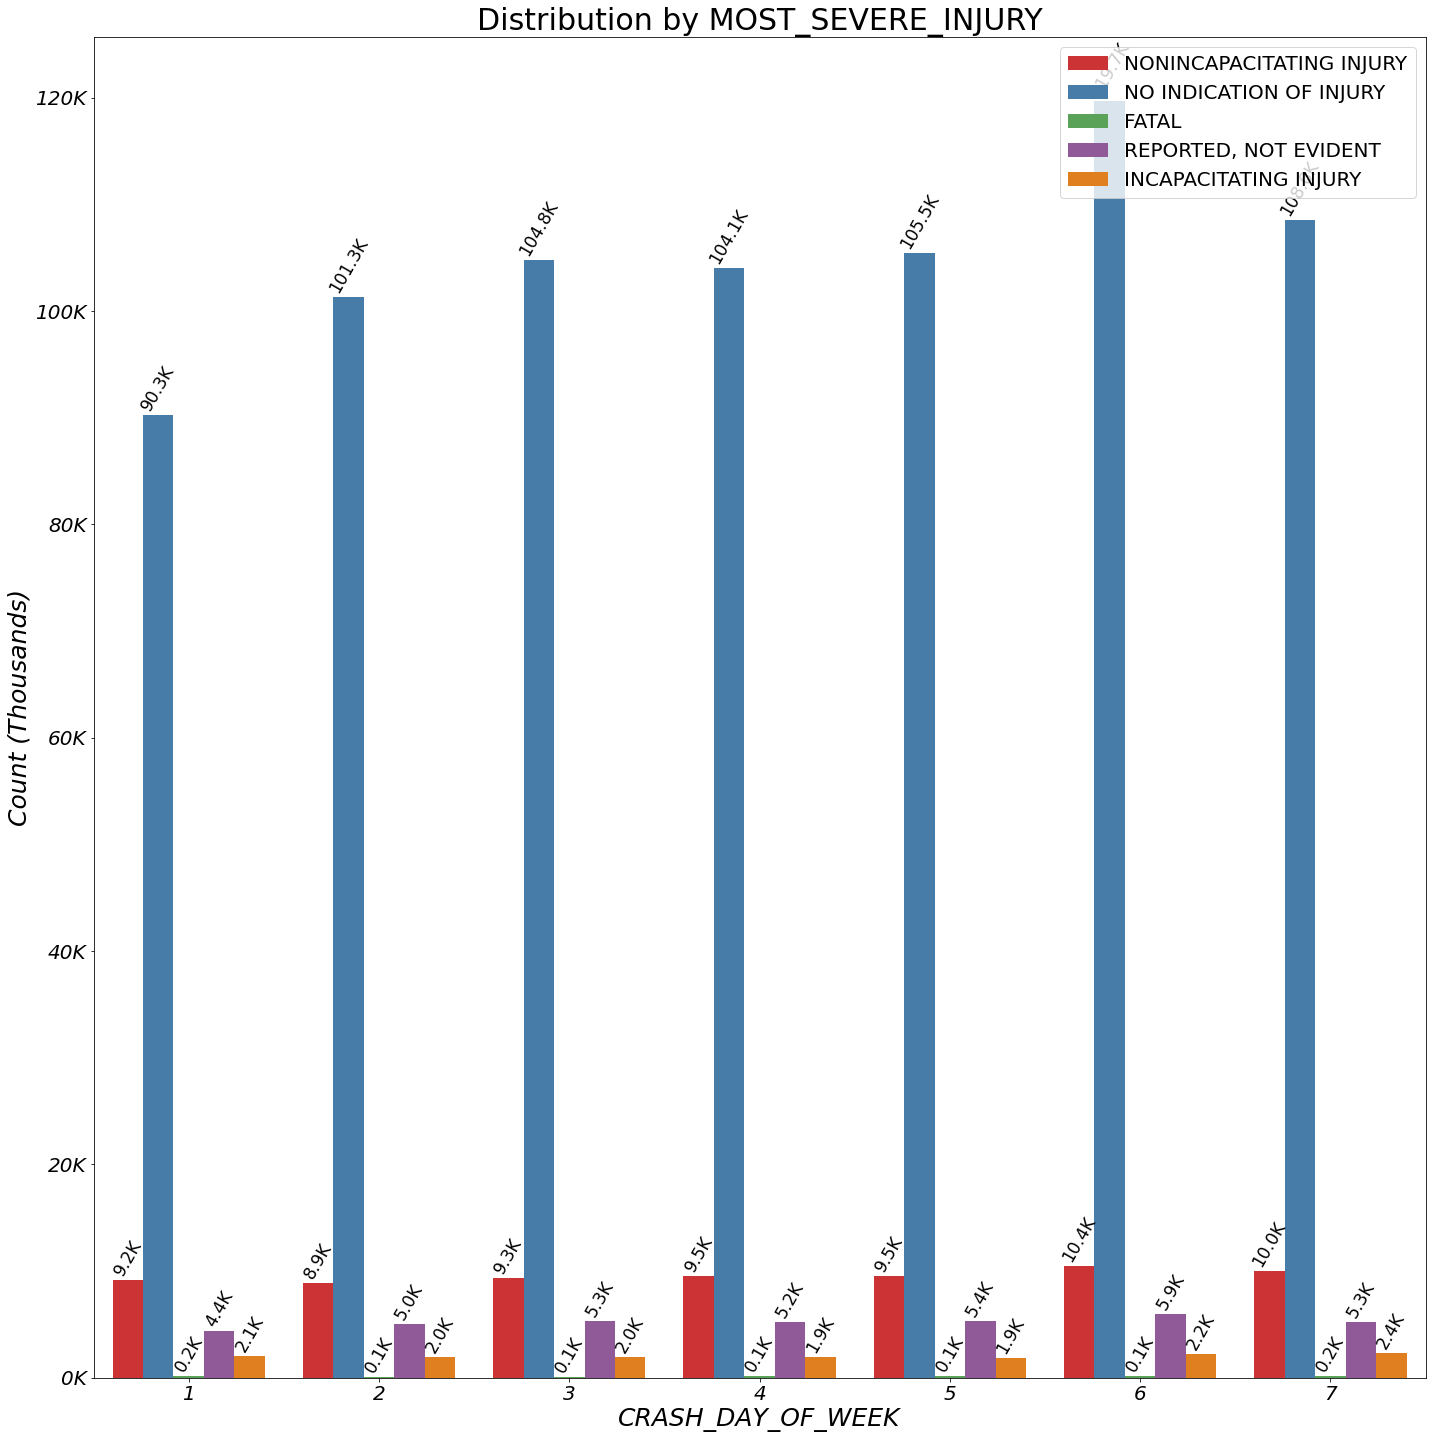

In [34]:
# count plot for 'CRASH_DAY_OF_WEEK' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_DAY_OF_WEEK', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

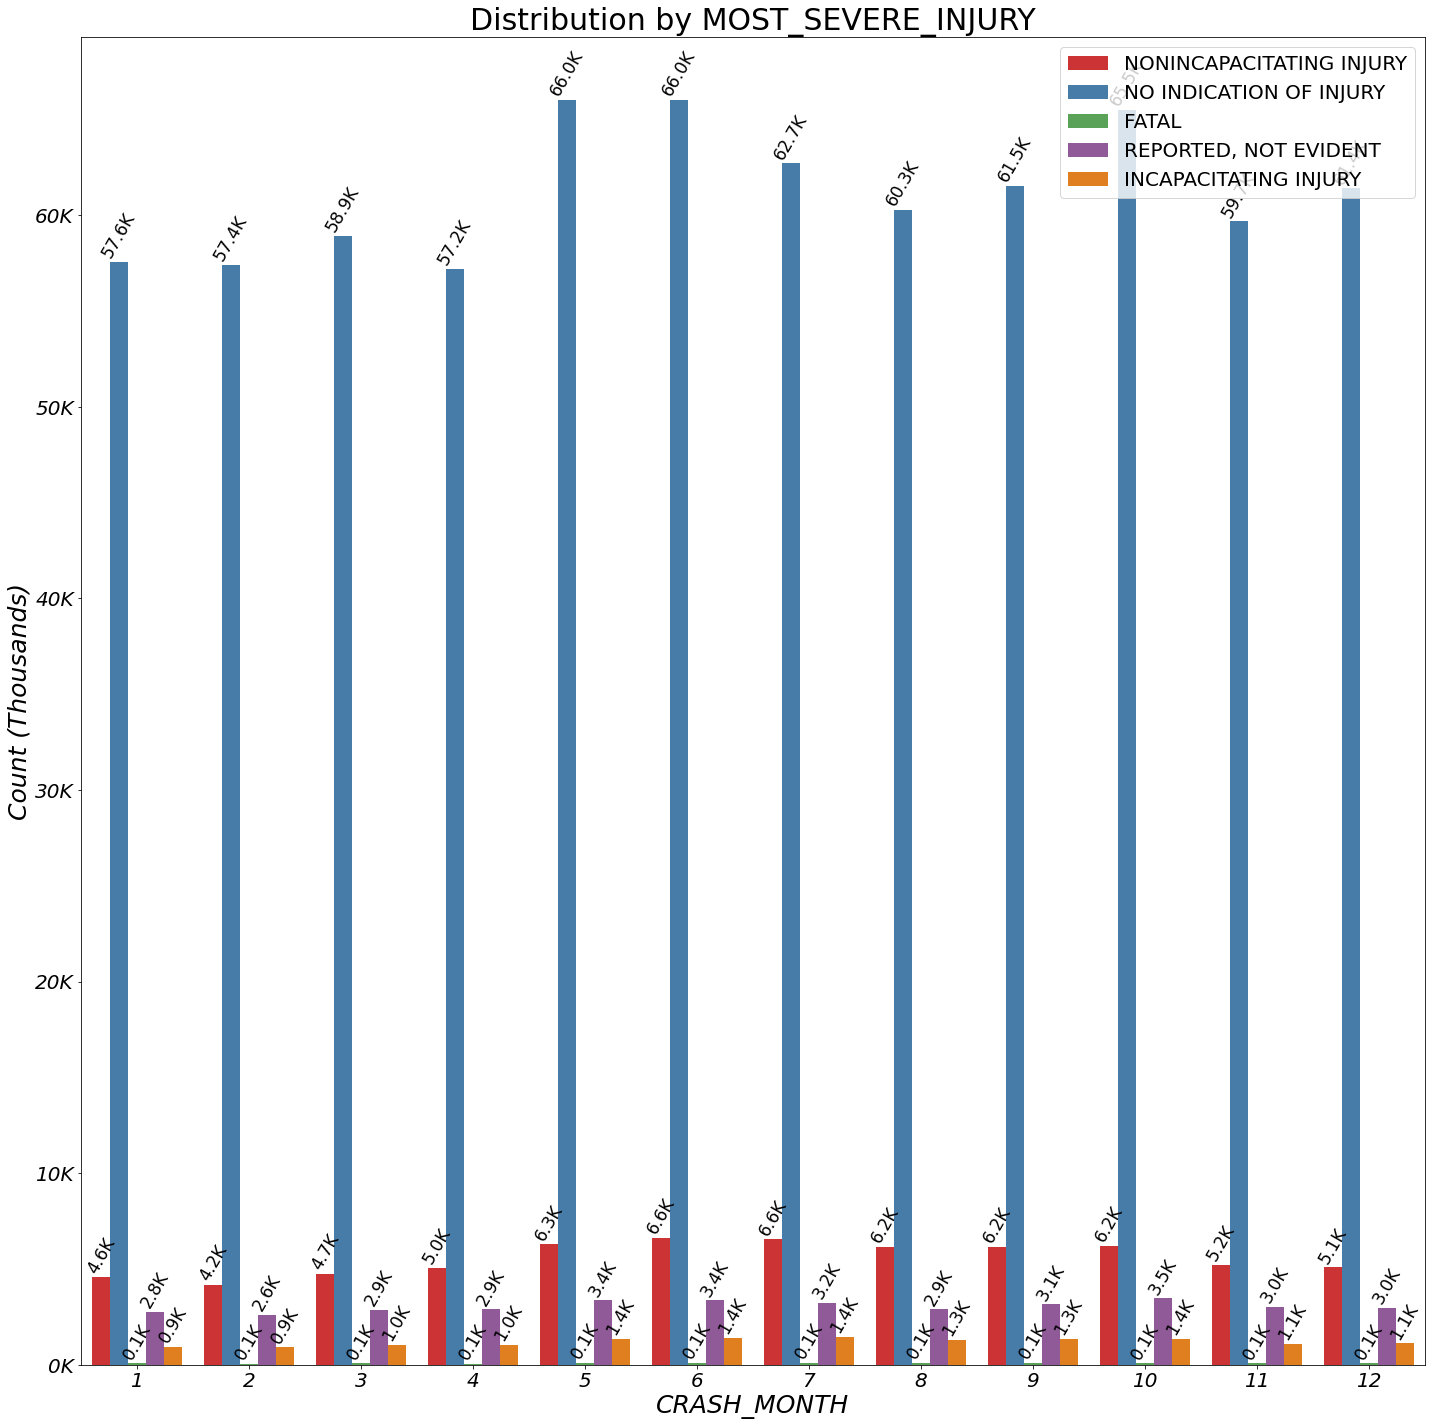

In [35]:
# count plot for 'CRASH_MONTH' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'CRASH_MONTH', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

#### Mapping datetime day of the week to `CRASH_DAY_OF_WEEK`. 

In [36]:
# select 5 random entries from 'CRASH_DAY_OF_WEEK' and 'DAY_OF_CRASH'
random_slice = df_crashes[['CRASH_DAY_OF_WEEK', 'CRASH_DATE']].sample(n=5, random_state=42)

# convert 'CRASH_DATE' to datetime if not already
random_slice['CRASH_DATE'] = pd.to_datetime(random_slice['CRASH_DATE'])

# create a new column for the day of the week based on 'CRASH_DATE'
random_slice['CRASH_DAY_OF_WEEK_STR'] = random_slice['CRASH_DATE'].dt.day_name()

random_slice.head()

CRASH_DAY_OF_WEEK          CRASH_DATE CRASH_DAY_OF_WEEK_STR
801658                  5 2019-09-12 19:21:00              Thursday
126472                  6 2024-01-05 01:30:00                Friday
384394                  5 2020-01-16 18:00:00              Thursday
675014                  2 2021-06-14 11:00:00                Monday
475391                  4 2019-08-07 18:20:00             Wednesday

### Initial Overview of Contributory Cause, Injury Severity, and Damages by Crash Date and Time.

* Crash Time (of the day) has a significant impact on both the damages and the injuries: we can clearly see the commute/business hours having up to 3x crashes.
* Crash Day (Sunday is coded as 1) has mild impact with Friday (coded as 6) having the most crashes and Sunday having the least.
* Crash Month has the least impact, with May, June being the highest, followed by October (maybe change in weather condition).

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by Lightning Condition.

Here we'll look at the distribution of damages, injuries, and causes by `LIGHTING_CONDITION` type.

In [37]:
(df_crashes['LIGHTING_CONDITION']).value_counts()

DAYLIGHT                  549114
DARKNESS, LIGHTED ROAD    187184
DARKNESS                   40354
UNKNOWN                    39616
DUSK                       24395
DAWN                       14247
Name: LIGHTING_CONDITION, dtype: int64

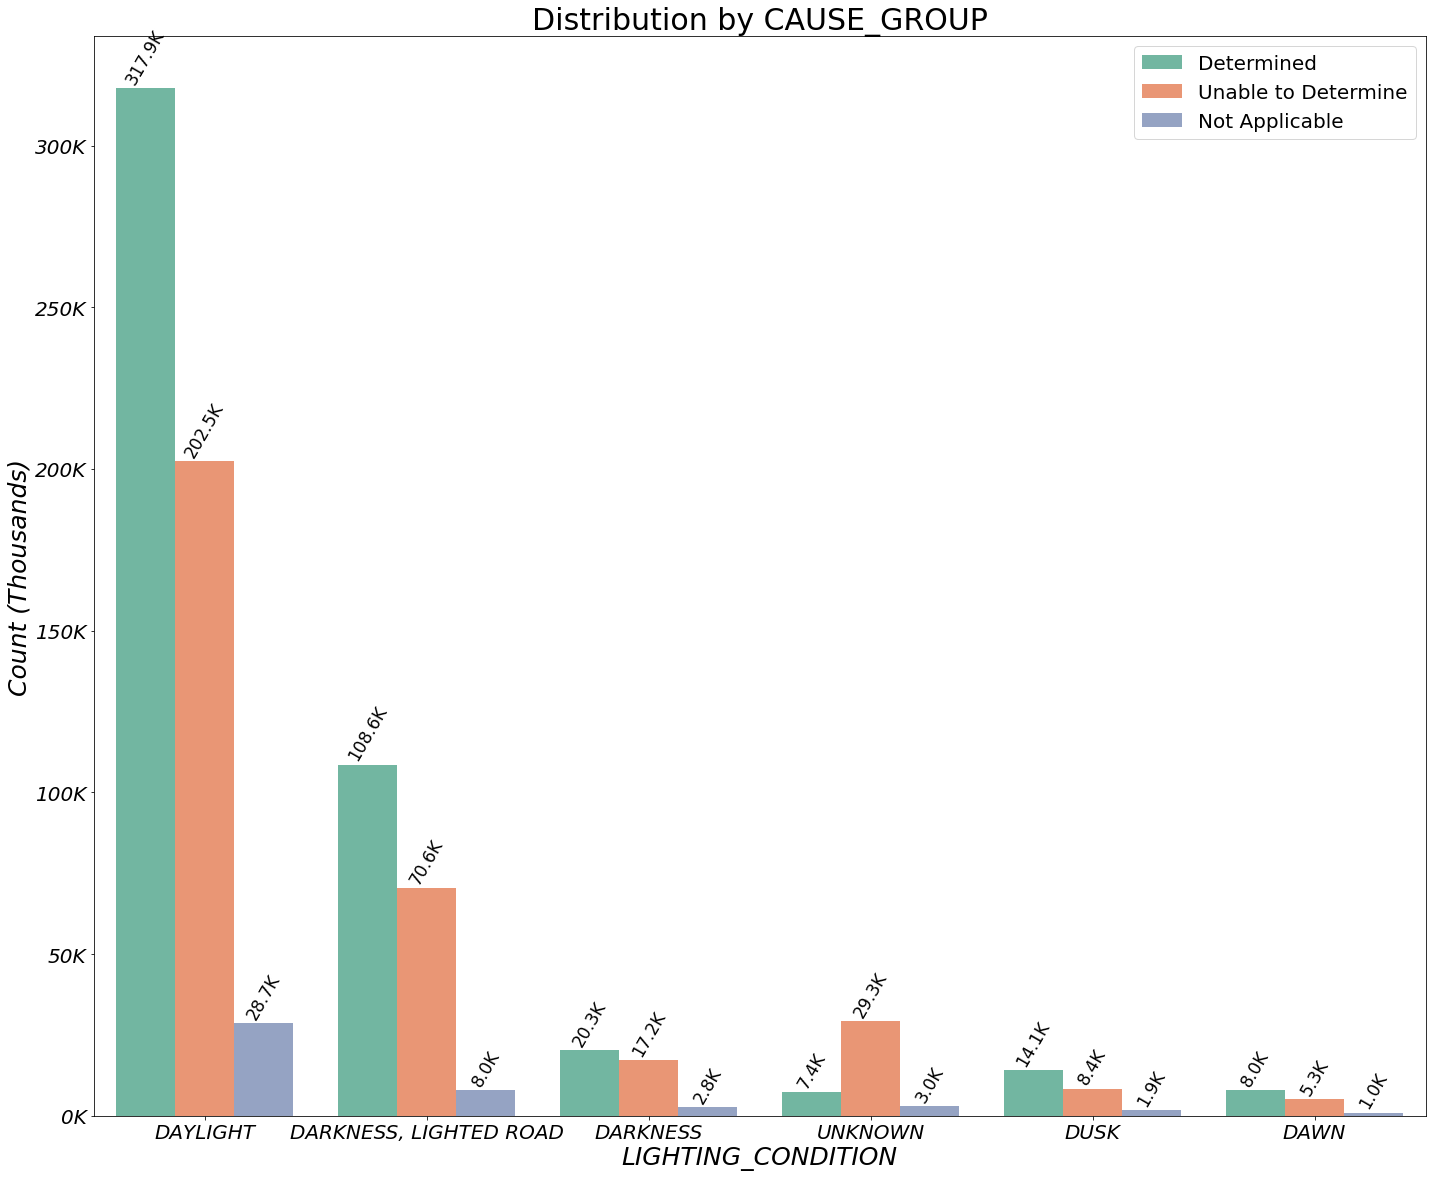

In [38]:
# count plot for 'LIGHTING_CONDITION' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'LIGHTING_CONDITION', 'CAUSE_GROUP')

# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

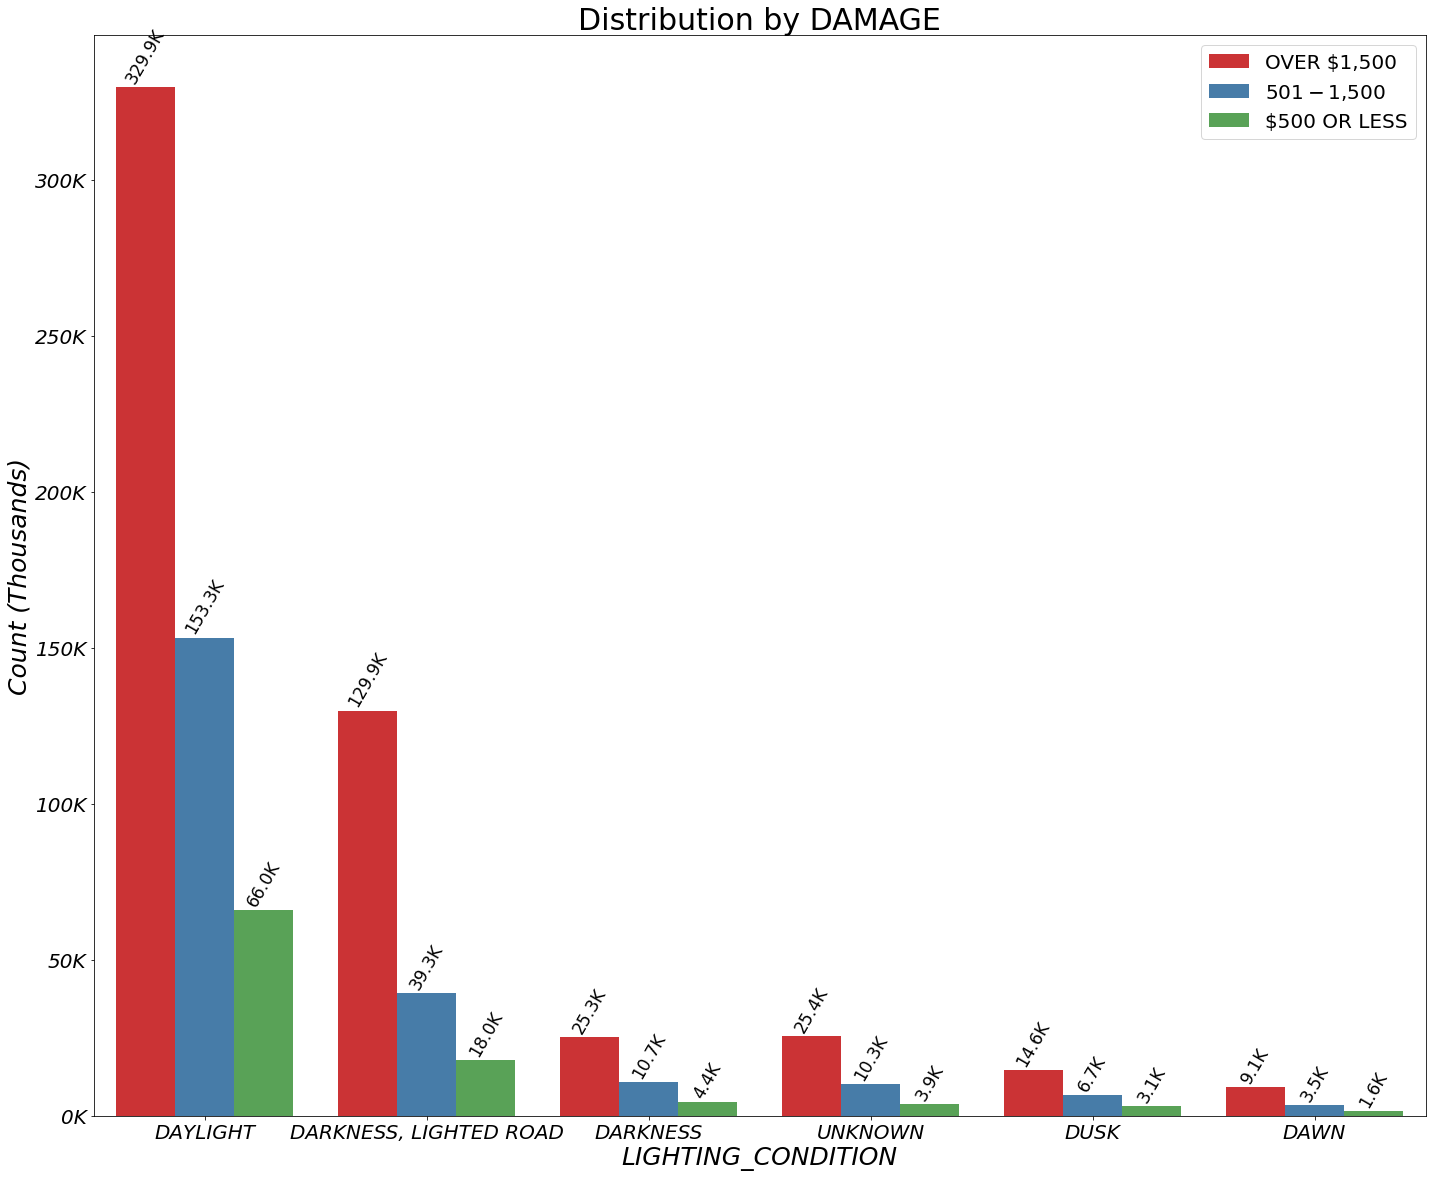

In [39]:
# count plot for 'LIGHTING_CONDITION' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'LIGHTING_CONDITION', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

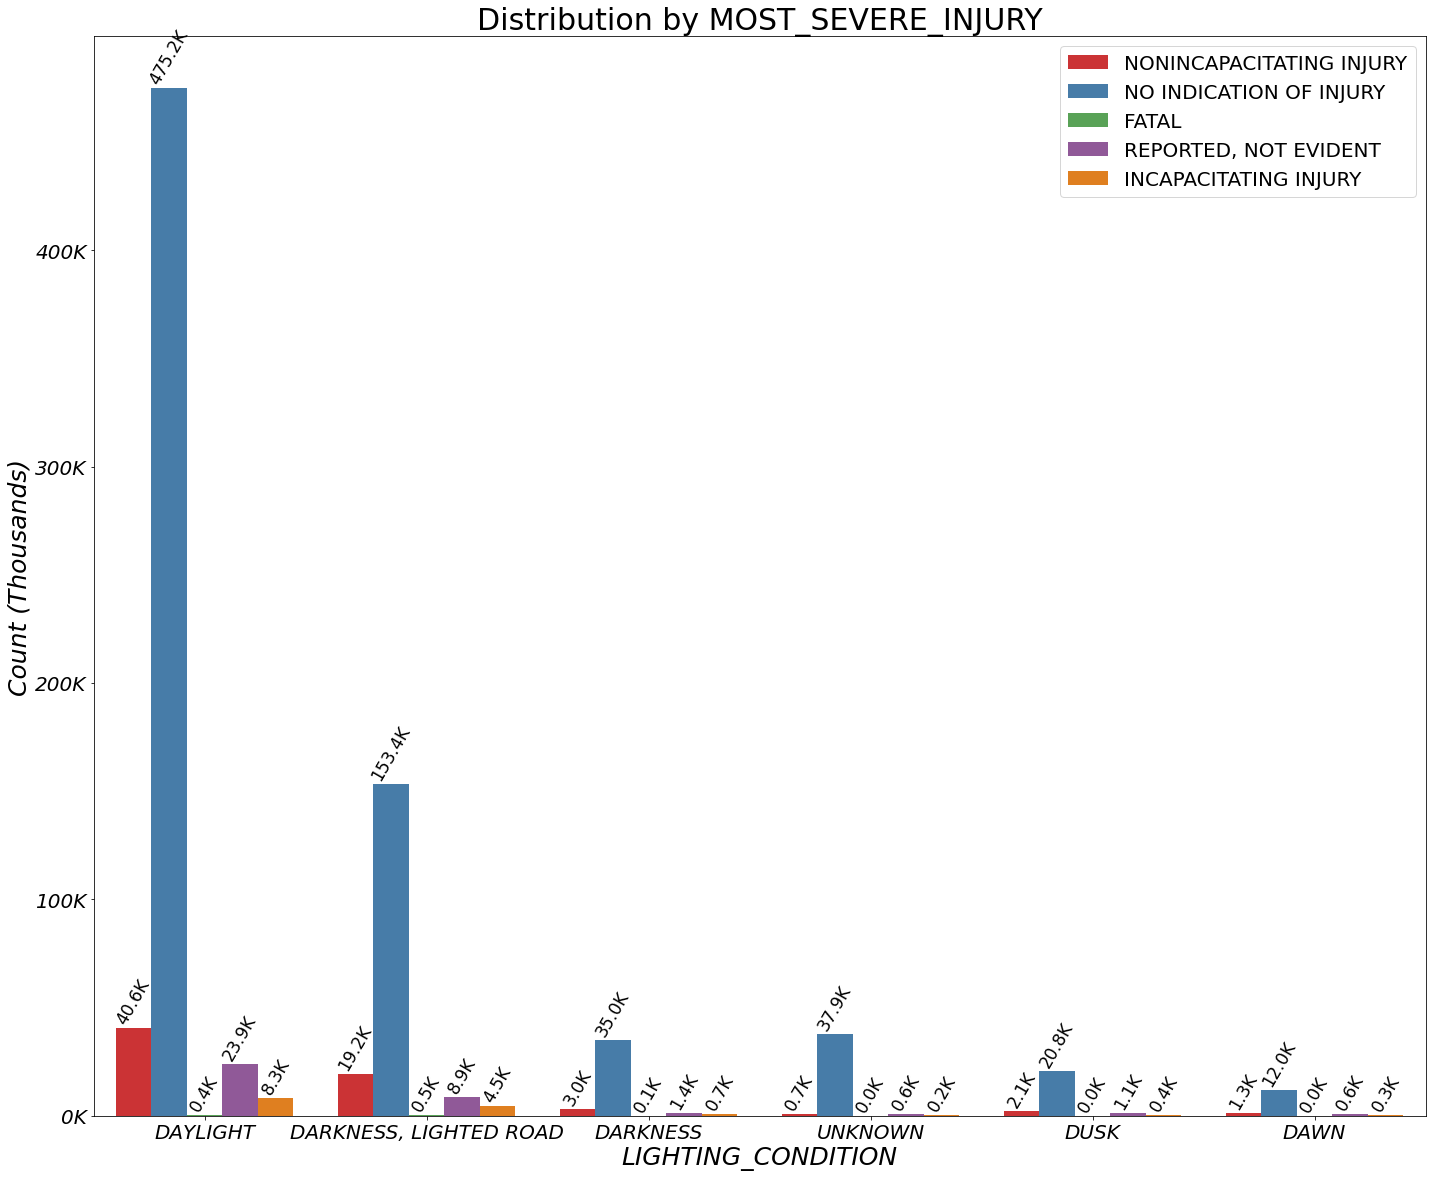

In [40]:
# count plot for 'LIGHTING_CONDITION' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'LIGHTING_CONDITION', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 0 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, and Lightning Condition.

* Most Crashes occur in Daylight or in Darkness/Lighted Road.
* Most high-damage crashes also occur in daylight or Darkness/Lighted Road.
* Most non-incapaciting and incapacitating injuries occur in Daylight or in Darkness/Lighted Road.

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by Trafficway Type.

Here we'll look at the distribution of damages, injuries, and causes by `TRAFFICWAY_TYPE` type.

In [41]:
(df_crashes['TRAFFICWAY_TYPE']).value_counts()

NOT DIVIDED                        369688
DIVIDED - W/MEDIAN (NOT RAISED)    135871
ONE-WAY                            108673
PARKING LOT                         58069
FOUR WAY                            56596
DIVIDED - W/MEDIAN BARRIER          48606
OTHER                               23253
ALLEY                               14104
T-INTERSECTION                      11311
UNKNOWN                             10016
CENTER TURN LANE                     6130
DRIVEWAY                             2774
RAMP                                 2679
UNKNOWN INTERSECTION TYPE            2590
FIVE POINT, OR MORE                  1243
Y-INTERSECTION                       1216
TRAFFIC ROUTE                        1010
NOT REPORTED                          624
ROUNDABOUT                            280
L-INTERSECTION                        177
Name: TRAFFICWAY_TYPE, dtype: int64

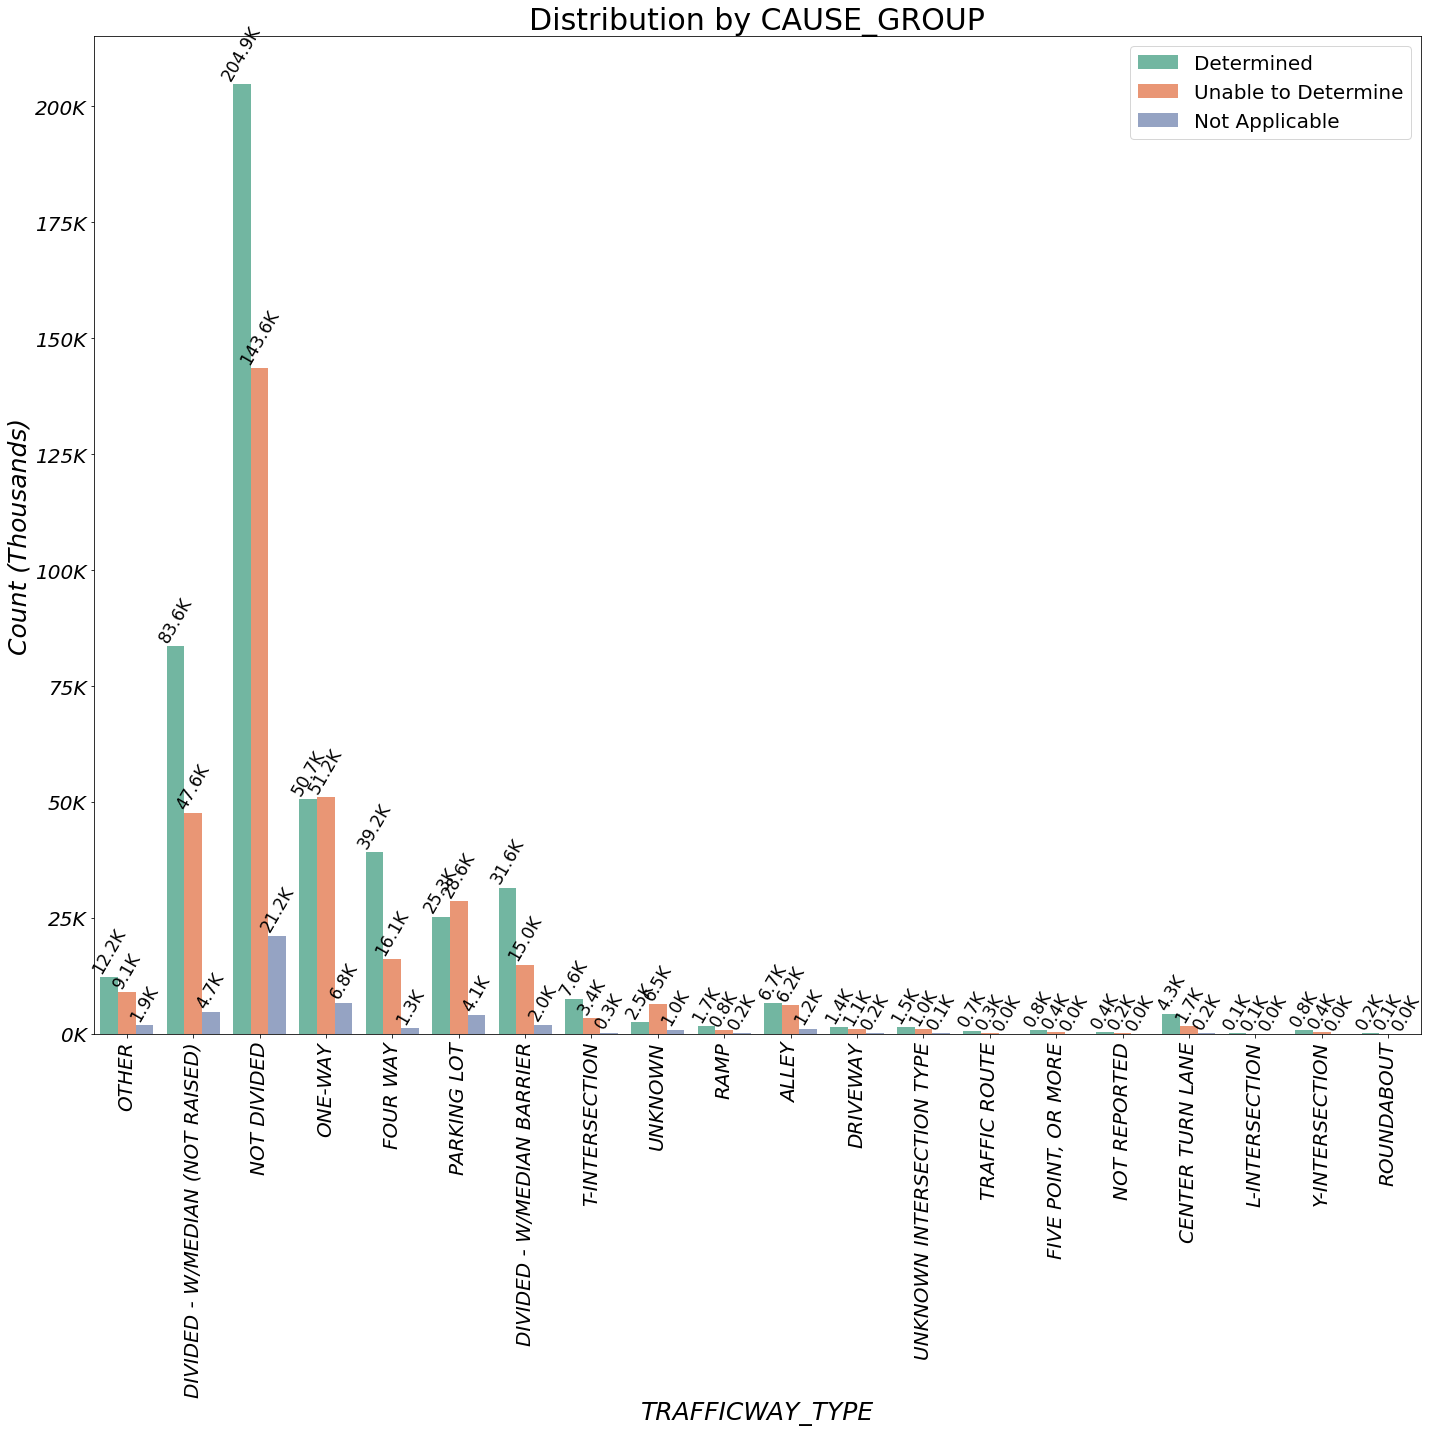

In [42]:
# count plot for 'TRAFFICWAY_TYPE' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFICWAY_TYPE', 'CAUSE_GROUP')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

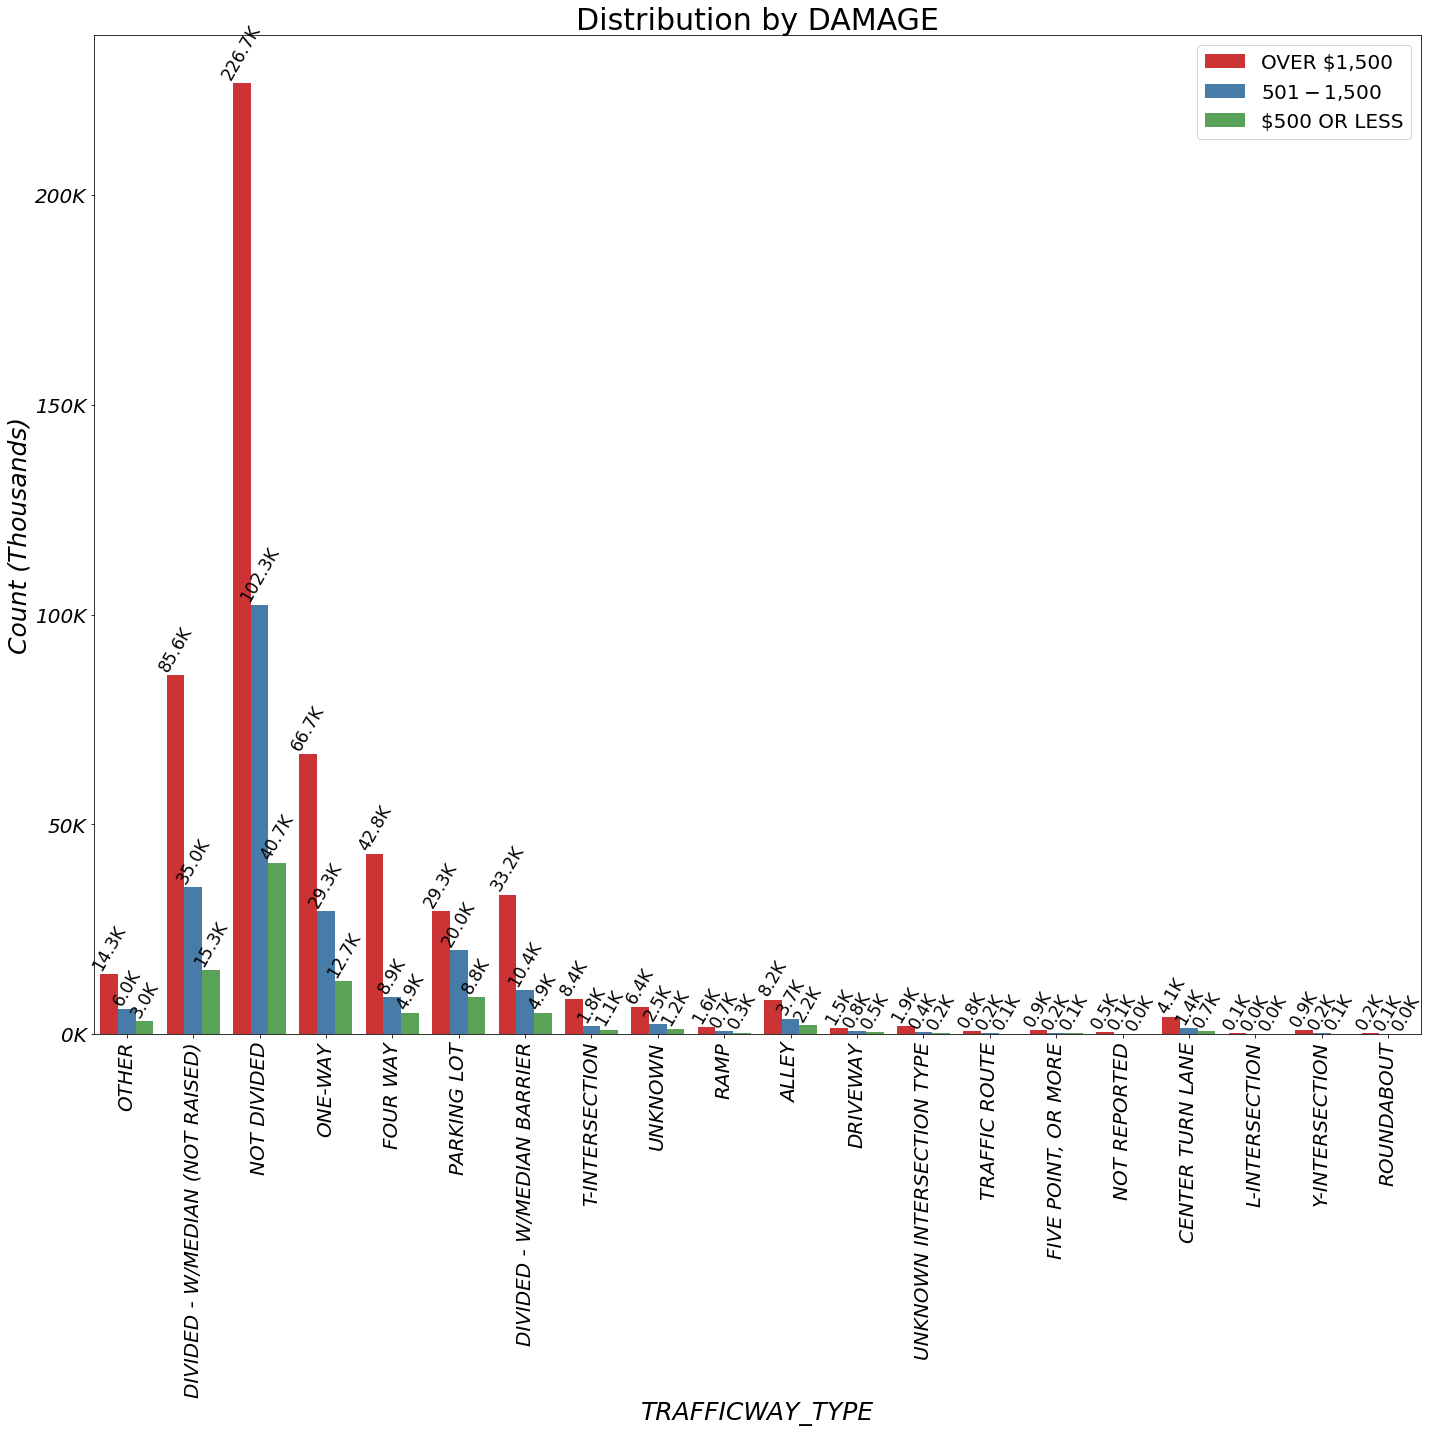

In [43]:
# count plot for 'TRAFFICWAY_TYPE' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFICWAY_TYPE', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

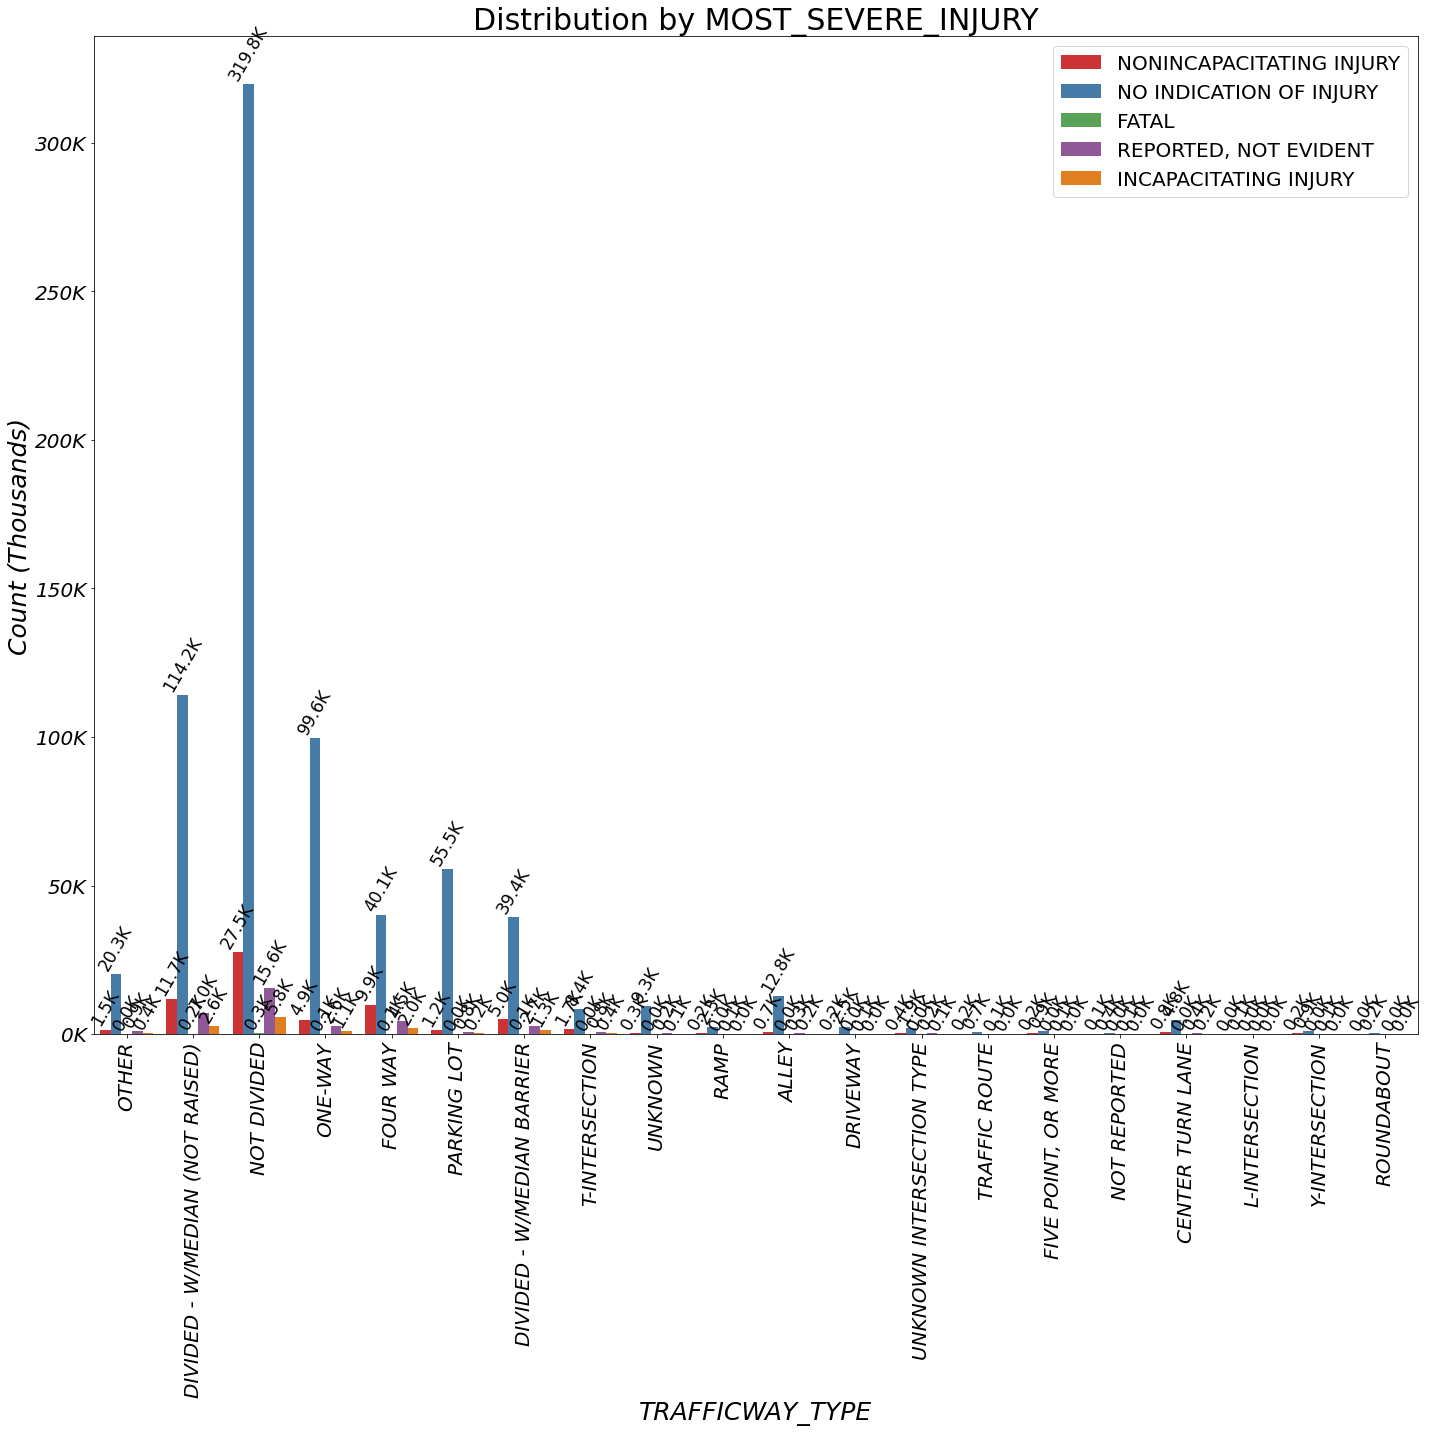

In [44]:
# count plot for 'TRAFFICWAY_TYPE' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFICWAY_TYPE', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, Damages by Trafficway Type.

* Most crashes are happening on undivided road, followed by divided road, one way, and parking lot.

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by Traffic Control Device.

Here we'll look at the distribution of damages, injuries, and causes by `TRAFFIC_CONTROL_DEVICE` type.

In [45]:
(df_crashes['TRAFFIC_CONTROL_DEVICE']).value_counts()

NO CONTROLS                 485136
TRAFFIC SIGNAL              237016
STOP SIGN/FLASHER            84730
UNKNOWN                      35197
OTHER                         5807
YIELD                         1264
LANE USE MARKING              1226
OTHER REG. SIGN                977
OTHER WARNING SIGN             693
PEDESTRIAN CROSSING SIGN       566
RAILROAD CROSSING GATE         554
FLASHING CONTROL SIGNAL        351
DELINEATORS                    341
SCHOOL ZONE                    320
POLICE/FLAGMAN                 289
OTHER RAILROAD CROSSING        188
RR CROSSING SIGN               173
NO PASSING                      52
BICYCLE CROSSING SIGN           30
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

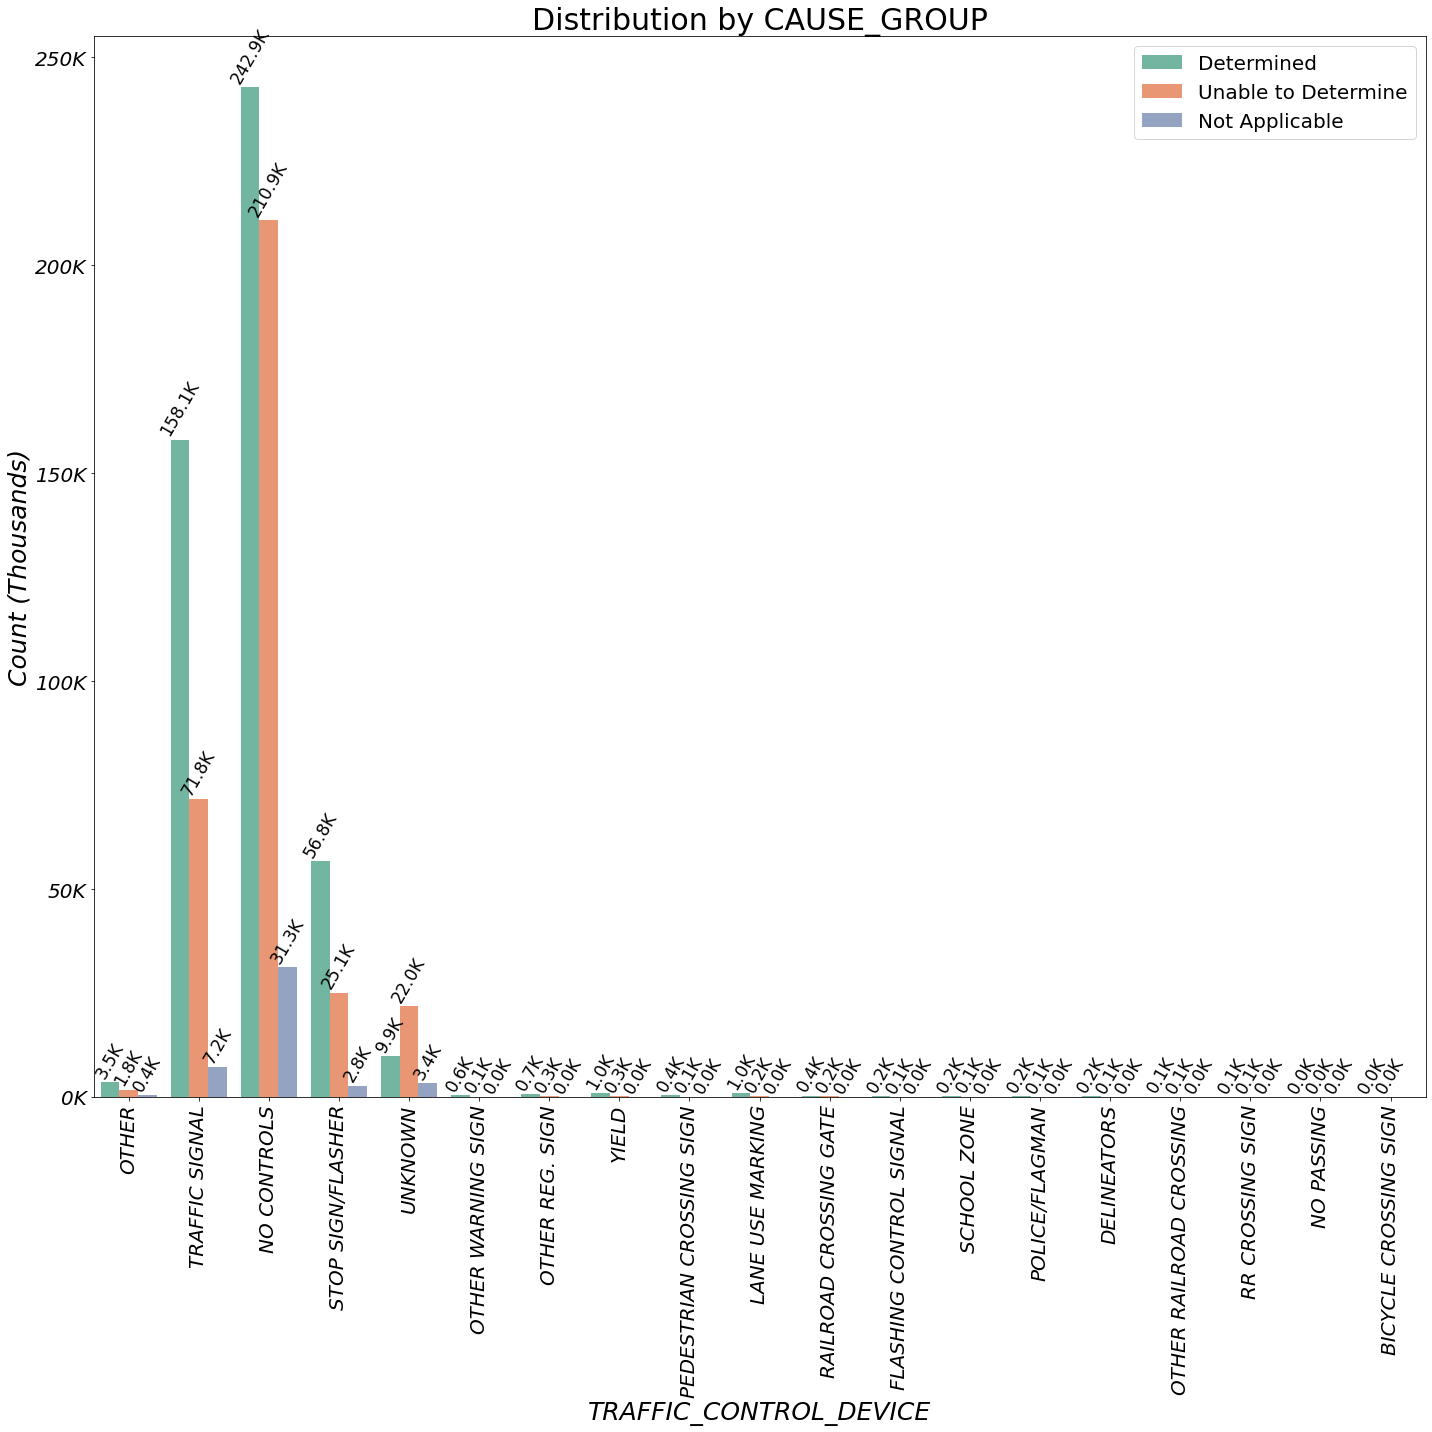

In [46]:
# count plot for 'TRAFFIC_CONTROL_DEVICE' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFIC_CONTROL_DEVICE', 'CAUSE_GROUP')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

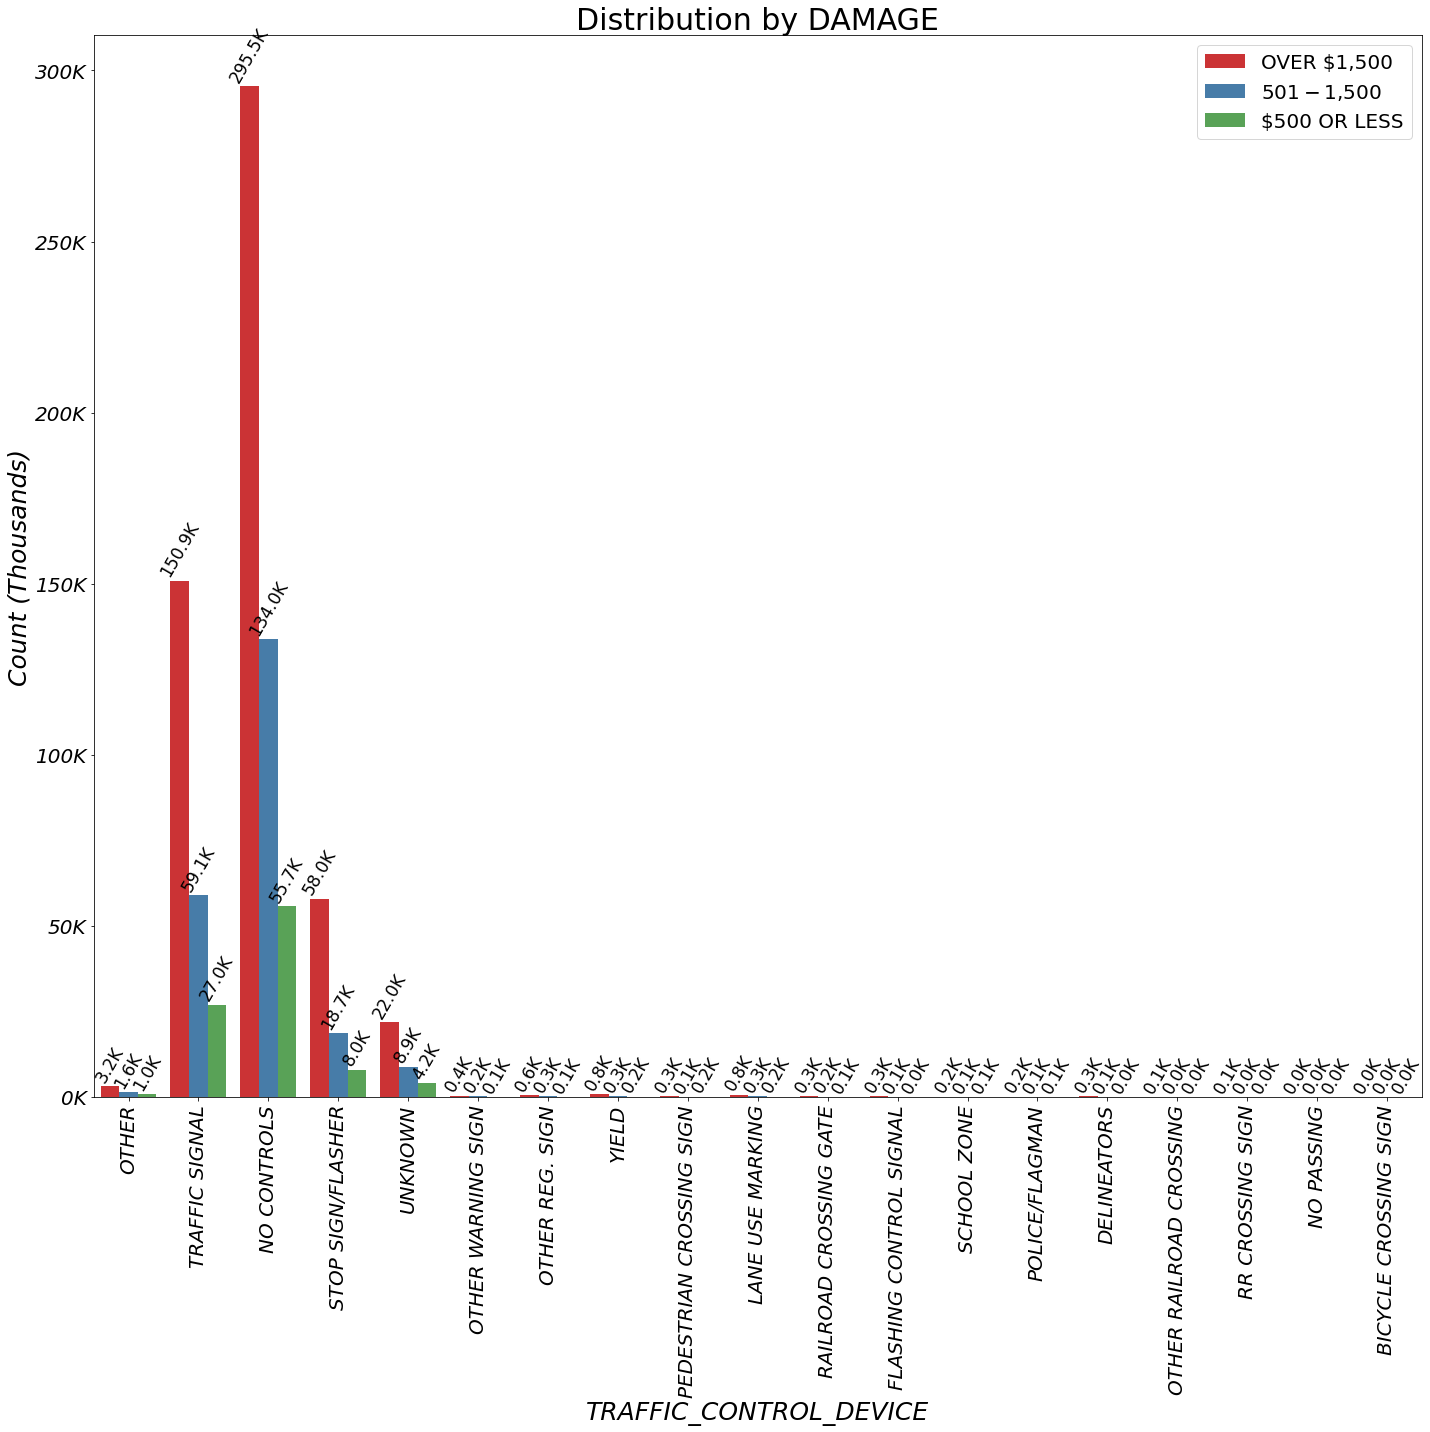

In [47]:
# count plot for 'TRAFFIC_CONTROL_DEVICE' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFIC_CONTROL_DEVICE', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

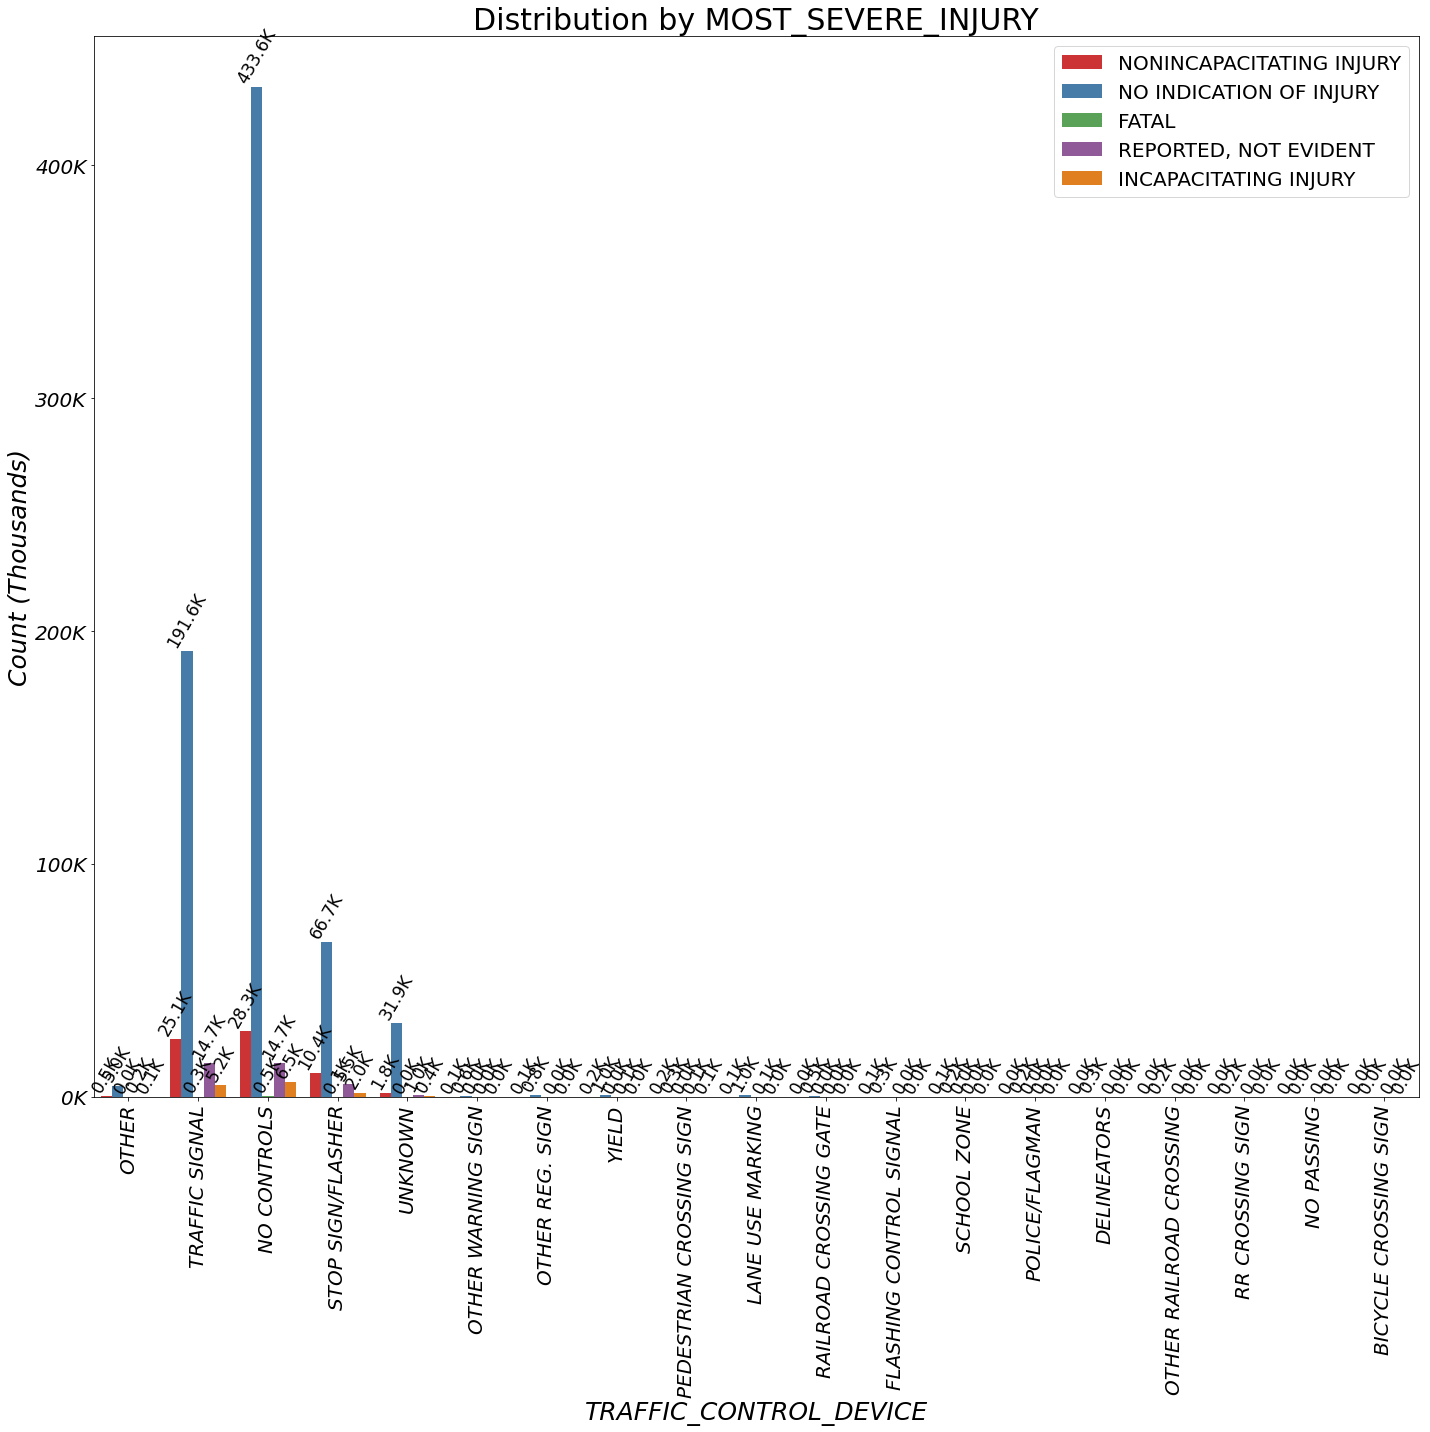

In [48]:
# count plot for 'TRAFFIC_CONTROL_DEVICE' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'TRAFFIC_CONTROL_DEVICE', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

### Initial Overview of Contributory Cause, Injury Severity, and Damages by Traffic Control Device.

* The most common types of Traffic Control Device are the Traffic Signal and the Stop Sign (intersecion-related).
* The most frequent Traffic Control Device is No Controls, meaning either parking lot or on the road 
* The fourth most common value is `Unknown`.

### Crashes EDA: Visualizing Contributory Cause, Injury Severity, and Damages by Date Police Notified.

Let's look at the distribution of causes, damages, injuries for the crashes when police was not immediately notified. 

In [49]:
# convert 'CRASH_DATE' and 'DATE_POLICE_NOTIFIED' to datetime
df_crashes['CRASH_DATE'] = pd.to_datetime(df_crashes['CRASH_DATE'])
df_crashes['DATE_POLICE_NOTIFIED'] = pd.to_datetime(df_crashes['DATE_POLICE_NOTIFIED'])

df_crashes['time_difference_hours'] = abs(df_crashes['CRASH_DATE'] - \
                                          df_crashes['DATE_POLICE_NOTIFIED']).dt.total_seconds() / 3600

# categorize the time differences into ranges
bins = [0, 1, 4, 8, 12, float('inf')]  # edges of the bins
labels = ['<1 hr', '2-4 hrs', '5-8 hrs', '8-12 hrs', '>12 hrs']  # labels for each bin

# use pd.cut() to assign each time difference to a bin
df_crashes['reporting_delay_category'] = pd.cut(df_crashes['time_difference_hours'], \
                                                bins=bins, labels=labels, right=False)


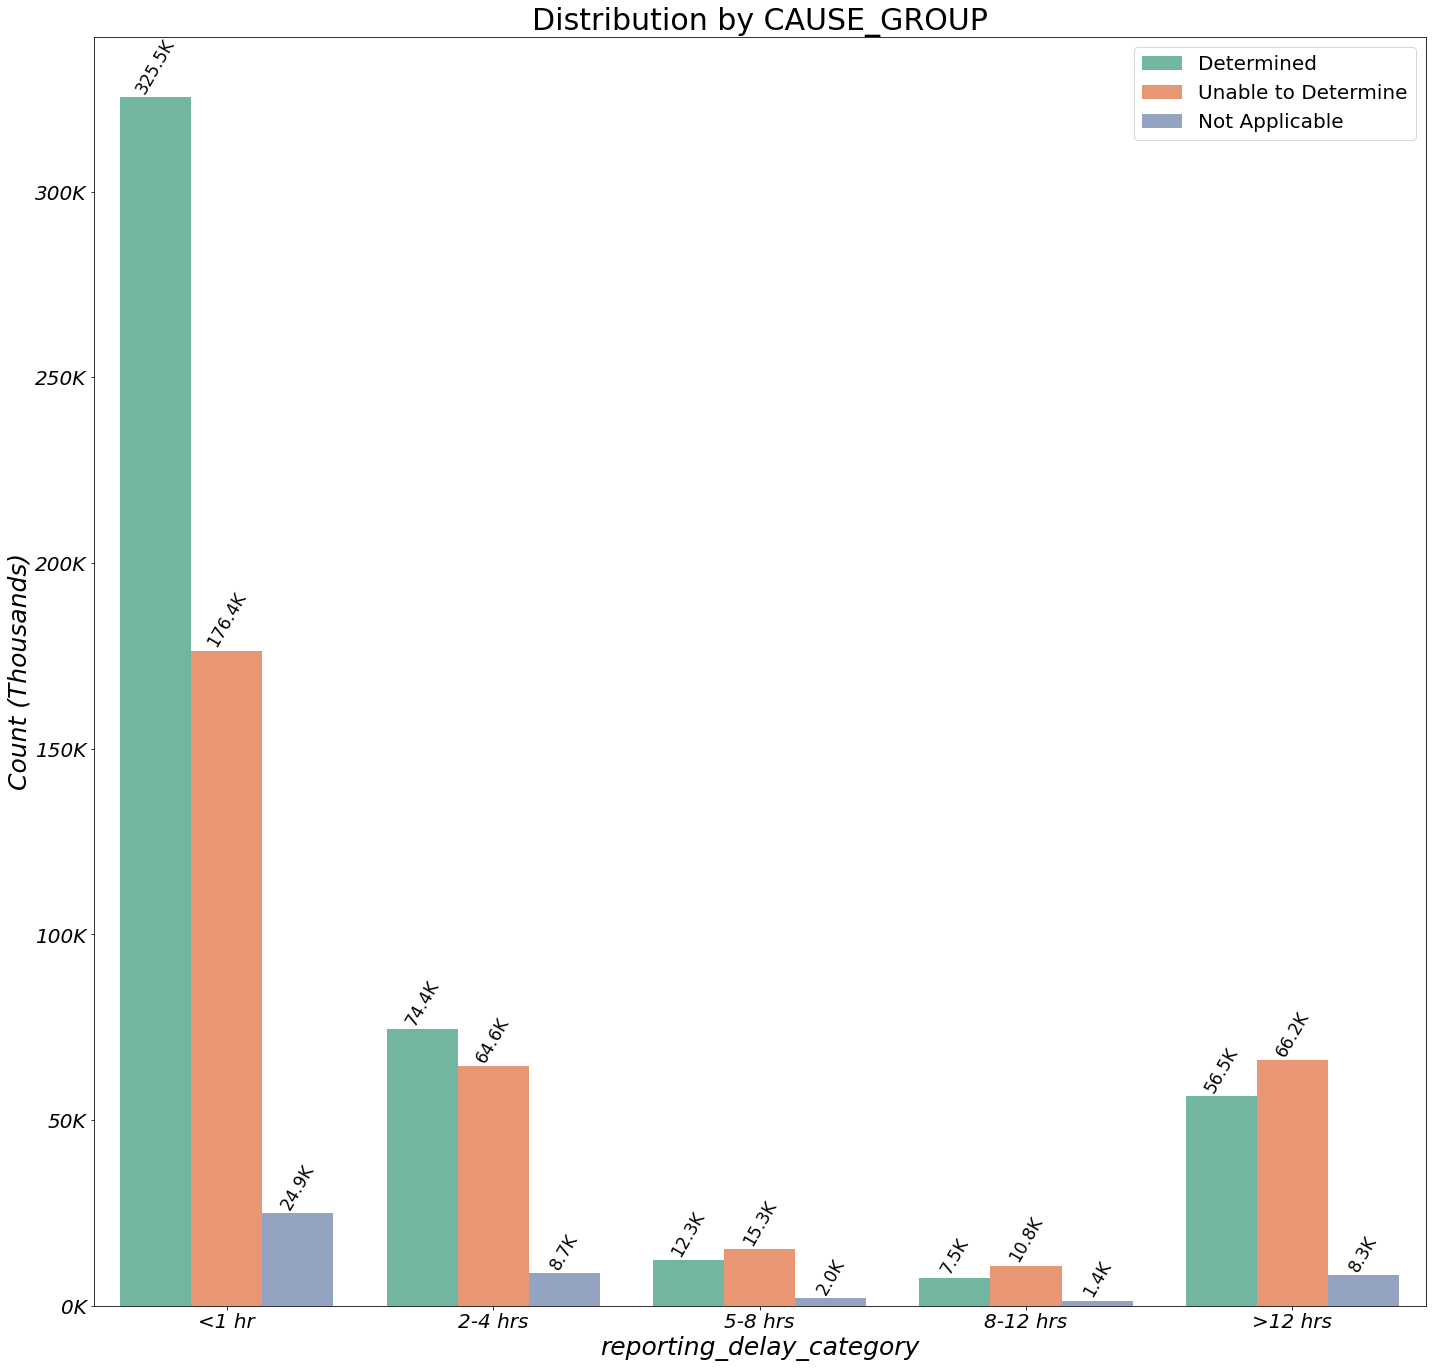

In [50]:
# count plot for 'reporting_delay_category' with hue as 'CAUSE_GROUP'
fig, ax = countplot_df_crashes(df_crashes, 'reporting_delay_category', 'CAUSE_GROUP')

# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

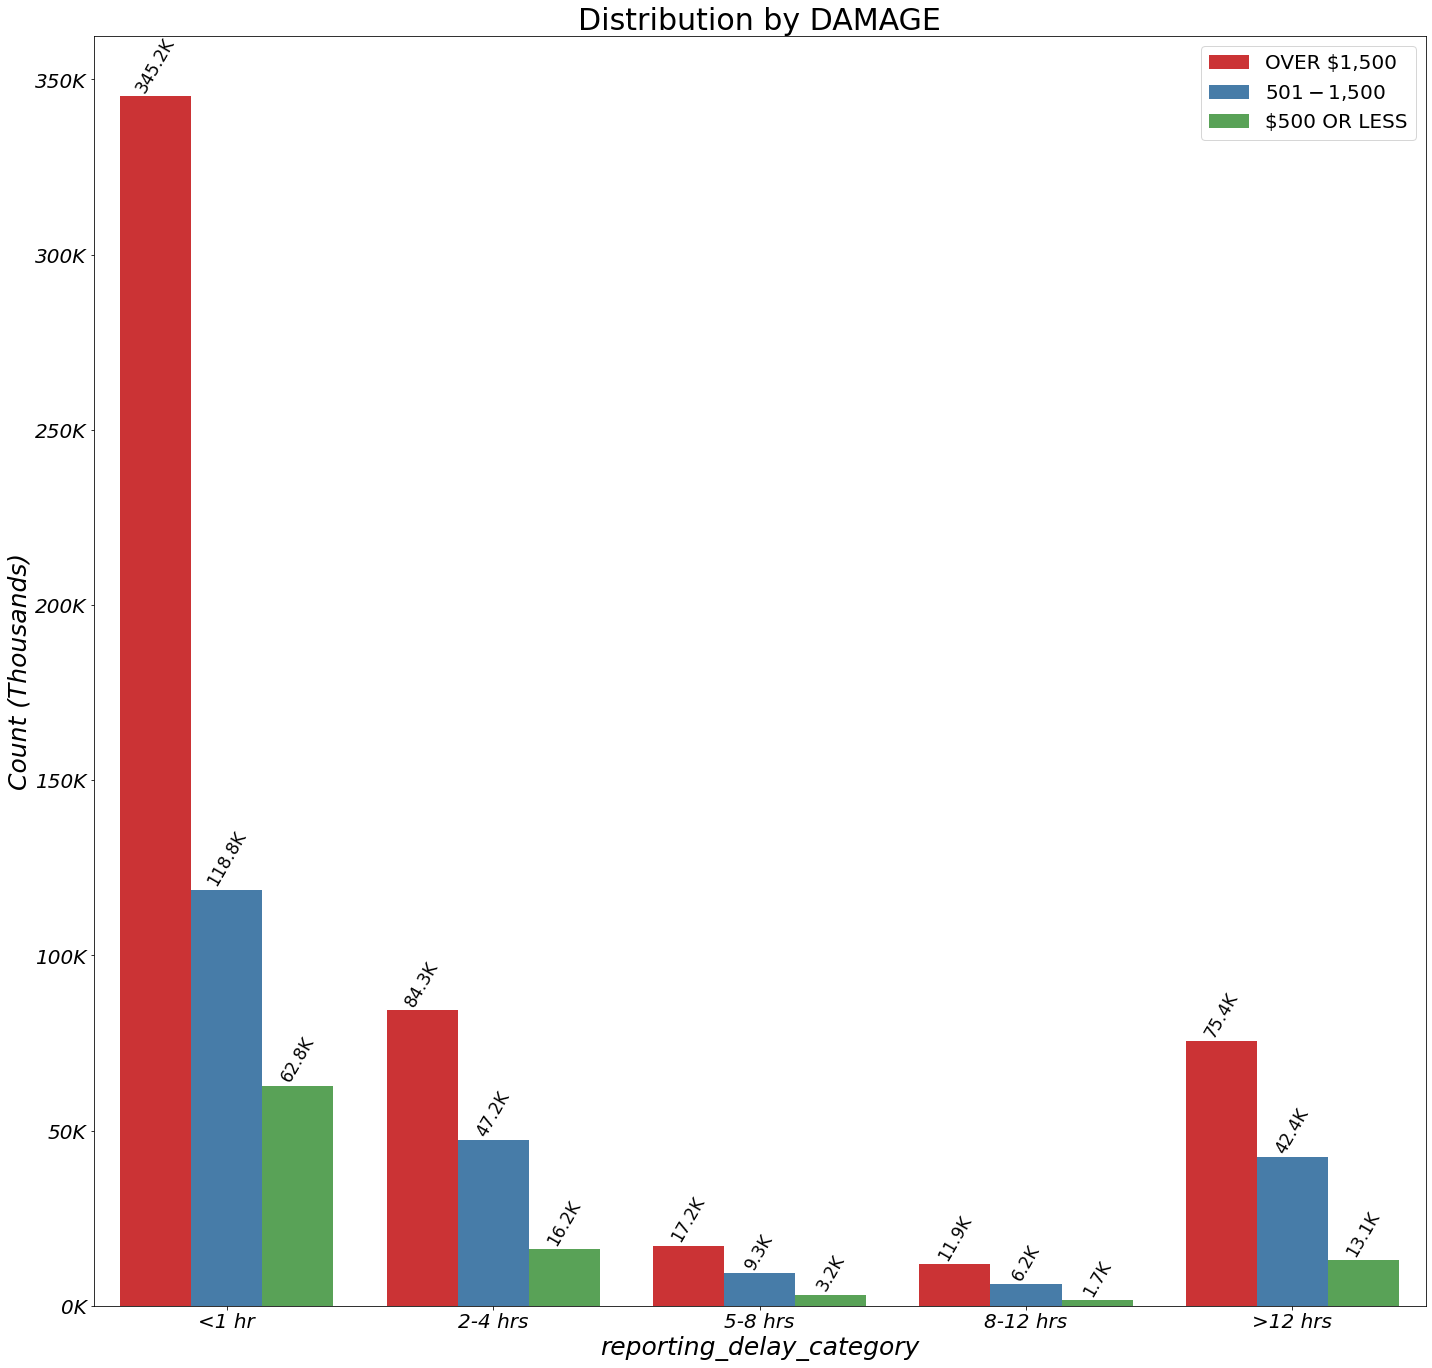

In [51]:
# count plot for 'reporting_delay_category' with hue as 'DAMAGE'
fig, ax = countplot_df_crashes(df_crashes, 'reporting_delay_category', 'DAMAGE', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# refresh the plot
plt.show()

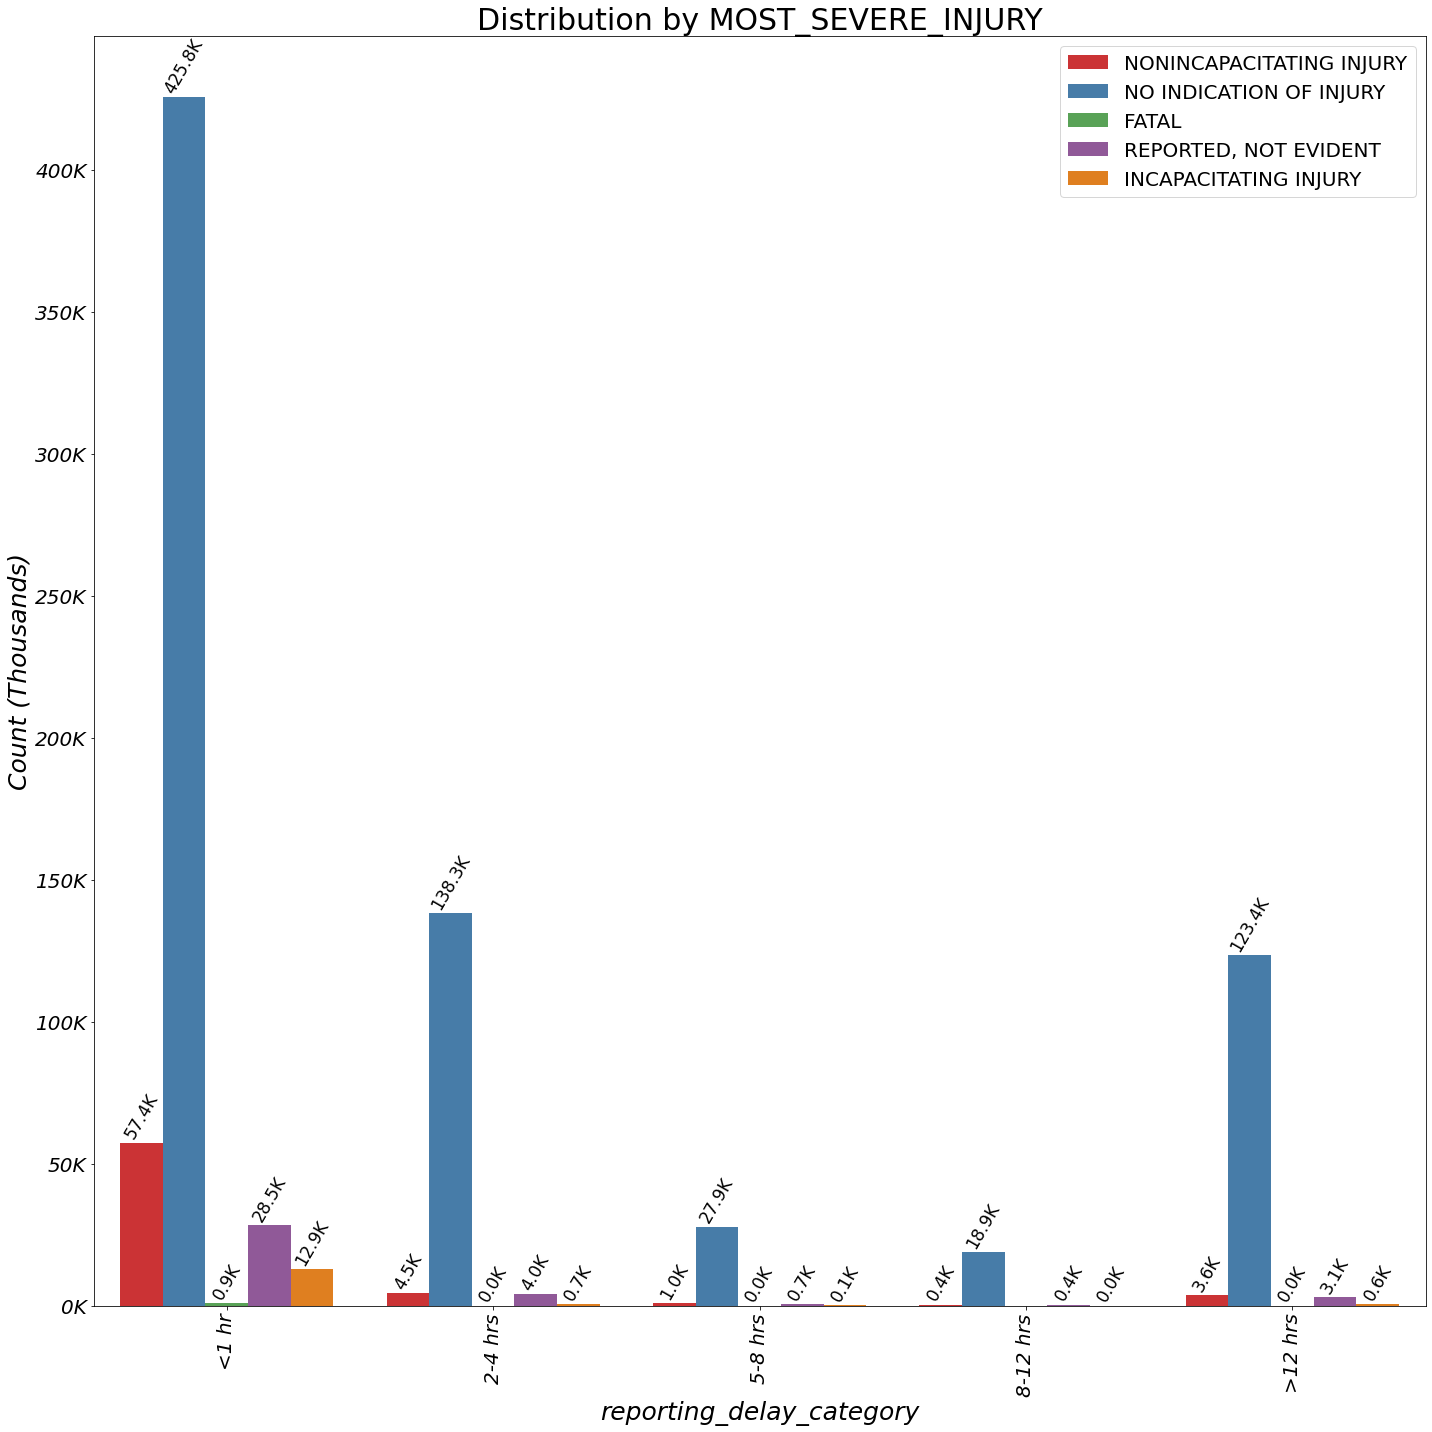

In [52]:
# count plot for 'reporting_delay_category' with hue as 'MOST_SEVERE_INJURY'
fig, ax = countplot_df_crashes(df_crashes, 'reporting_delay_category', 'MOST_SEVERE_INJURY', 'Set1')
# adjust the x-tick rotation to 90 deg (better vis)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# refresh the plot
plt.show()

## 4. Overview of Crashes EDA.

Here are the following observations we can make about the `df_crashes` so far:

Date, Time, Daylight, Weather Conditions:

* Most of the crashes in the datset happen during business hours (7am - 11pm) at medium speed of 30-35 mph.
* Between the commute hours (7am - 7pm), the number of incapacitating ijuries increases. 
* Most of the crashes have no injuries, however between hours of 11 am-11 pm, there's a steady amount of incapacitating injuries. 
* Most of the crashes happen either in daylight or in darkness/streetlight.
* Most frequent weather is clear, second is rain.
* Sunday is the day with least crashes and Friday is the day with most crashes.
* As far as months, it's a steady distribution, except for slight uptick in May, June, October.
* Most of crashes are reported within 1 hour, 2-4 hours (parking accidents) and >12 hrs (probably parking accidents).
* Crashes reported after 12 hours have the most `Unable to Determine` causes.
  

Trafficway Type, Traffic Signal Type:

* Most crashes happen on undivided road, one-way road, or parking lot.
* Most reported are traffic signal/stop and no signal (road or parking lot).
* Parking lot trafficway and one-way streets have the most `Unable to Determine` causes.

First Crash Type:

* The most frequenct are rear-ending, and parked motor vehicle, followed by angle, turning, side-sweeping.
* Parked motor vehicle has the most `Unable to Determine` causes.


In [53]:
# displaying all columns 
df_crashes.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

### Proposed modifications to `df_crashes`.

* Modify binary columns to have 1/0 values.
* Drop invalid speed limits.
* For columns with multiple categotical values, handle unknown/other.

### Applying proposed modifications to `df_crashes`.

In [108]:
# store columns to keep
cols_to_keep_df_crashes = ['CRASH_RECORD_ID', 'posted_speed_limit_(mph)', 'reporting_delay_category', \
                          'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', \
                           'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROAD_DEFECT', \
                           'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', \
                           'WORK_ZONE_I', 'HIT_AND_RUN_I', 'NOT_RIGHT_OF_WAY_I', \
                           'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',\
                           'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',\
                           'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',\
                           'INJURIES_UNKNOWN', 'DOORING_I', 'INTERSECTION_RELATED_I',\
                           'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']

df_crashes_slice = df_crashes[cols_to_keep_df_crashes].copy()
df_crashes_slice.columns = df_crashes_slice.columns.str.lower()

# display the updated column names
print(df_crashes_slice.columns)

Index(['crash_record_id', 'posted_speed_limit_(mph)',
       'reporting_delay_category', 'traffic_control_device',
       'device_condition', 'weather_condition', 'lighting_condition',
       'first_crash_type', 'trafficway_type', 'road_defect', 'damage',
       'prim_contributory_cause', 'sec_contributory_cause', 'work_zone_i',
       'hit_and_run_i', 'not_right_of_way_i', 'most_severe_injury',
       'injuries_total', 'injuries_fatal', 'injuries_incapacitating',
       'injuries_non_incapacitating', 'injuries_reported_not_evident',
       'injuries_no_indication', 'injuries_unknown', 'dooring_i',
       'intersection_related_i', 'crash_hour', 'crash_day_of_week',
       'crash_month'],
      dtype='object')


In [109]:
# filter out other speed limits
df_crashes_slice = df_crashes_slice[df_crashes_slice['posted_speed_limit_(mph)'].isin(valid_speed_limits)]

In [110]:
# clean binary columns
df_crashes_binary_cols = ['work_zone_i', 'hit_and_run_i', 'not_right_of_way_i', \
                          'dooring_i', 'intersection_related_i']

# replace Y with 1, everything else 0
df_crashes_slice[df_crashes_binary_cols] = df_crashes_slice[df_crashes_binary_cols].applymap(lambda x: 1 if x == 'Y' else 0)

In [112]:
# check 
df_crashes_slice[df_crashes_binary_cols].value_counts()

work_zone_i  hit_and_run_i  not_right_of_way_i  dooring_i  intersection_related_i
0            0              0                   0          0                         420353
             1              0                   0          0                         209178
             0              0                   0          1                         147990
             1              0                   0          1                          36057
             0              1                   0          0                          24142
             1              1                   0          0                           9833
1            0              0                   0          0                           2403
0            0              0                   1          0                           1435
                            1                   0          1                           1179
1            0              0                   0          1                            69

#### Cleaning up all categorical columns one by one, starting with `traffic_control_device`.

In [115]:
# all categorical columns
df_crashes_categorical_columns = ['traffic_control_device',
       'device_condition', 'weather_condition', 'lighting_condition',
       'first_crash_type', 'trafficway_type', 'road_defect',
       'prim_contributory_cause', 'sec_contributory_cause']

In [116]:
# traffic control device
df_crashes_slice['traffic_control_device'].value_counts()

NO CONTROLS                 484972
TRAFFIC SIGNAL              236945
STOP SIGN/FLASHER            84706
UNKNOWN                      35179
OTHER                         5806
YIELD                         1264
LANE USE MARKING              1226
OTHER REG. SIGN                977
OTHER WARNING SIGN             692
PEDESTRIAN CROSSING SIGN       566
RAILROAD CROSSING GATE         554
FLASHING CONTROL SIGNAL        351
DELINEATORS                    341
SCHOOL ZONE                    320
POLICE/FLAGMAN                 289
OTHER RAILROAD CROSSING        188
RR CROSSING SIGN               172
NO PASSING                      52
BICYCLE CROSSING SIGN           30
Name: traffic_control_device, dtype: int64

In [122]:
# define the mapping to clean up or group the values
traffic_control_device_map = {
    'NO CONTROLS': 'No Controls',
    'TRAFFIC SIGNAL': 'Traffic Signal',
    'STOP SIGN/FLASHER': 'Stop Sign',
    'UNKNOWN': 'Unknown',
    'OTHER': 'Other',
    'YIELD': 'Yield Sign',
    'LANE USE MARKING': 'Lane Marking',
    'OTHER REG. SIGN': 'Other',
    'OTHER WARNING SIGN': 'Other',
    'PEDESTRIAN CROSSING SIGN': 'Pedestrian Xing',
    'RAILROAD CROSSING GATE': 'RR Xing',
    'FLASHING CONTROL SIGNAL': 'Flashing Signal',
    'DELINEATORS': 'Delineators',
    'SCHOOL ZONE': 'School Zone',
    'POLICE/FLAGMAN': 'Police or Flagman',
    'OTHER RAILROAD CROSSING': 'RR Xing',
    'RR CROSSING SIGN': 'RR Xing',
    'NO PASSING': 'No Passing Sign',
    'BICYCLE CROSSING SIGN': 'Bicycle Xing'
}
# apply the mapping to the column
df_crashes_slice['traffic_control_device'] = df_crashes_slice['traffic_control_device'].replace(traffic_control_device_map)

In [123]:
# traffic control device check
df_crashes_slice['traffic_control_device'].value_counts()

No Controls          484972
Traffic Signal       236945
Stop Sign             84706
Unknown               35179
Other                  7475
Yield Sign             1264
Lane Marking           1226
RR Xing                 914
Pedestrian Xing         566
Flashing Signal         351
Delineators             341
School Zone             320
Police or Flagman       289
No Passing Sign          52
Bicycle Xing             30
Name: traffic_control_device, dtype: int64

#### Cleaning up  `device_condition` column.

In [124]:
# traffic control device condition
df_crashes_slice['device_condition'].value_counts()

NO CONTROLS                 490559
FUNCTIONING PROPERLY        292177
UNKNOWN                      58561
OTHER                         6510
FUNCTIONING IMPROPERLY        3975
NOT FUNCTIONING               2463
WORN REFLECTIVE MATERIAL       289
MISSING                         96
Name: device_condition, dtype: int64

In [133]:
# define the mapping to clean up or group the values
device_condition_map = {
    'NO CONTROLS': 'No Controls',
    'UNKNOWN': 'Unknown',
    'OTHER': 'Other',
    'FUNCTIONING PROPERLY': 'Functioning',    
    'FUNCTIONING IMPROPERLY': 'Malfunctioning',
    'NOT FUNCTIONING': 'Not Functioning',
    'WORN REFLECTIVE MATERIAL': 'Reflective Material',
    'MISSING': 'Missing'
}
# apply the mapping to the column
df_crashes_slice['device_condition'] = df_crashes_slice['device_condition'].replace(device_condition_map)

In [132]:
# traffic control device condition
df_crashes_slice['device_condition'].value_counts()

No Controls        490559
Functioning        292177
Unknown             58561
Other                6799
Malfunctioning       3975
Not Functioning      2463
Missing                96
Name: device_condition, dtype: int64

#### Cleaning up  `weather_condition` column.

In [135]:
# weather condition
df_crashes_slice['weather_condition'].value_counts()

CLEAR                       670716
RAIN                         75071
UNKNOWN                      47914
SNOW                         28392
CLOUDY/OVERCAST              25170
OTHER                         2681
FREEZING RAIN/DRIZZLE         1728
FOG/SMOKE/HAZE                1345
SLEET/HAIL                    1010
BLOWING SNOW                   443
SEVERE CROSS WIND GATE         153
BLOWING SAND, SOIL, DIRT         7
Name: weather_condition, dtype: int64

In [138]:
# define the mapping to clean up or group the values
weather_condition_map = {
    'CLEAR': 'Clear',
    'RAIN': 'Rain',
    'SNOW': 'Snow',
    'UNKNOWN': 'Unknown',
    'OTHER': 'Other',
    'CLOUDY/OVERCAST': 'Cloudy',
    'FREEZING RAIN/DRIZZLE': 'Drizzle',
    'SLEET/HAIL': 'Sleet',
    'FOG/SMOKE/HAZE': 'Haze',
    'BLOWING SNOW': 'Blizzard',
    'BLOWING SAND, SOIL, DIRT': 'Dust Storm',
    'SEVERE CROSS WIND GATE': 'Crosswind'
}
# apply the mapping to the column
df_crashes_slice['weather_condition'] = df_crashes_slice['weather_condition'].replace(weather_condition_map)

In [139]:
# weather condition
df_crashes_slice['weather_condition'].value_counts()

Clear         670716
Rain           75071
Unknown        47914
Snow           28392
Cloudy         25170
Other           2681
Drizzle         1728
Haze            1345
Sleet           1010
Blizzard         443
Crosswind        153
Dust Storm         7
Name: weather_condition, dtype: int64

#### Cleaning up  `lighting_condition` column.

In [140]:
# lighting condition
df_crashes_slice['lighting_condition'].value_counts()

DAYLIGHT                  548958
DARKNESS, LIGHTED ROAD    187130
DARKNESS                   40338
UNKNOWN                    39576
DUSK                       24384
DAWN                       14244
Name: lighting_condition, dtype: int64

In [141]:
# define the mapping to clean up or group the values
lighting_condition_map = {
    'DAYLIGHT': 'Daylight',
    'DARKNESS, LIGHTED ROAD': 'Lighted Road',
    'DARKNESS': 'Dark',
    'UNKNOWN': 'Unknown',
    'DUSK': 'Dusk',
    'DAWN': 'Dawn'
}
# apply the mapping to the column
df_crashes_slice['lighting_condition'] = df_crashes_slice['lighting_condition'].replace(lighting_condition_map)

In [142]:
# lighting condition
df_crashes_slice['lighting_condition'].value_counts()

Daylight        548958
Lighted Road    187130
Dark             40338
Unknown          39576
Dusk             24384
Dawn             14244
Name: lighting_condition, dtype: int64

#### Cleaning up  `first_crash_type` column.

In [143]:
# first crash type 
df_crashes_slice['first_crash_type'].value_counts()

PARKED MOTOR VEHICLE            198349
REAR END                        190082
SIDESWIPE SAME DIRECTION        130749
TURNING                         122425
ANGLE                            92975
FIXED OBJECT                     39955
PEDESTRIAN                       19981
PEDALCYCLIST                     13129
SIDESWIPE OPPOSITE DIRECTION     11975
REAR TO FRONT                     8547
OTHER OBJECT                      8488
HEAD ON                           7276
REAR TO SIDE                      5067
OTHER NONCOLLISION                2673
REAR TO REAR                      1778
ANIMAL                             614
OVERTURNED                         521
TRAIN                               46
Name: first_crash_type, dtype: int64

In [148]:
# define the mapping to clean up or group the values
first_crash_map = {
    'PARKED MOTOR VEHICLE'            : 'Parked',
    'REAR END'                        : 'Rear End',
    'SIDESWIPE SAME DIRECTION'        : 'Sideswipe Same',
    'TURNING'                         : 'Turning',
    'ANGLE'                           : 'Angle', 
    'FIXED OBJECT'                    : 'Object',
    'PEDESTRIAN'                      : 'Pedestrian',
    'PEDALCYCLIST'                    : 'Cyclist',
    'SIDESWIPE OPPOSITE DIRECTION'    : 'Sideswipe Opposite',
    'REAR TO FRONT'                   : 'Rear to Front',
    'OTHER OBJECT'                    : 'Object',
    'HEAD ON'                         : 'Head On',
    'REAR TO SIDE'                    : 'Rear to Side',
    'OTHER NONCOLLISION'              : 'Other',
    'REAR TO REAR'                    : 'Rear to Rear',
    'ANIMAL'                          : 'Animal',
    'OVERTURNED'                      : 'Overturned',
    'TRAIN'                           : 'Train'
}
# apply the mapping to the column
df_crashes_slice['first_crash_type'] = df_crashes_slice['first_crash_type'].replace(first_crash_map)

In [149]:
# first crash type 
df_crashes_slice['first_crash_type'].value_counts()

Parked                198349
Rear End              190082
Sideswipe Same        130749
Turning               122425
Angle                  92975
Object                 48443
Pedestrian             19981
Cyclist                13129
Sideswipe Opposite     11975
Rear to Front           8547
Head On                 7276
Rear to Side            5067
Other                   2673
Rear to Rear            1778
Animal                   614
Overturned               521
Train                     46
Name: first_crash_type, dtype: int64

#### Cleaning up  `trafficway_type` column.

In [150]:
# trafficway type
df_crashes_slice['trafficway_type'].value_counts()

NOT DIVIDED                        369585
DIVIDED - W/MEDIAN (NOT RAISED)    135837
ONE-WAY                            108645
PARKING LOT                         58045
FOUR WAY                            56579
DIVIDED - W/MEDIAN BARRIER          48590
OTHER                               23245
ALLEY                               14103
T-INTERSECTION                      11308
UNKNOWN                              9974
CENTER TURN LANE                     6127
DRIVEWAY                             2773
RAMP                                 2679
UNKNOWN INTERSECTION TYPE            2590
FIVE POINT, OR MORE                  1243
Y-INTERSECTION                       1216
TRAFFIC ROUTE                        1010
NOT REPORTED                          624
ROUNDABOUT                            280
L-INTERSECTION                        177
Name: trafficway_type, dtype: int64

In [155]:
# define the mapping to clean up or group the values
trafficway_map = {
    'NOT DIVIDED': 'Not Divided',
    'DIVIDED - W/MEDIAN (NOT RAISED)': 'Divided, Median',
    'ONE-WAY': 'One-Way',
    'PARKING LOT': 'Parking Lot',
    'FOUR WAY': 'Intersection, Four-Way',
    'DIVIDED - W/MEDIAN BARRIER': 'Divided, Barrier',
    'OTHER': 'Other',
    'ALLEY': 'Alley',
    'T-INTERSECTION': 'Intersection, T',
    'UNKNOWN': 'Unknown',
    'CENTER TURN LANE': 'Center Turn Lane',
    'DRIVEWAY': 'Driveway',
    'RAMP': 'Ramp',
    'UNKNOWN INTERSECTION TYPE': 'Intersection, Unknown',
    'FIVE POINT, OR MORE': 'Intersection, Five-Point or More',
    'Y-INTERSECTION': 'Intersection, Y',
    'TRAFFIC ROUTE': 'Traffic Route',
    'NOT REPORTED': 'Unknown',
    'ROUNDABOUT': 'Roundabout',
    'L-INTERSECTION': 'Intersection, L'
}

# apply the mapping to the column
df_crashes_slice['trafficway_type'] = df_crashes_slice['trafficway_type'].replace(trafficway_map)

In [153]:
# trafficway type
df_crashes_slice['trafficway_type'].value_counts()

Not Divided               369585
Divided, Median           135837
One-Way                   108645
Parking Lot                58045
Intersection, Four-Way     56579
Divided, Barrier           48590
Other                      23245
Alley                      14103
Intersection, T            11308
Unknown                    10598
Center Turn Lane            6127
Driveway                    2773
Ramp                        2679
Intersection, Unknown       2590
Five-Point or More          1243
Intersection, Y             1216
Traffic Route               1010
Roundabout                   280
Intersection, L              177
Name: trafficway_type, dtype: int64

#### Cleaning up  `road_defect` column.

In [156]:
# road_defect type
df_crashes_slice['road_defect'].value_counts()

NO DEFECTS           684221
UNKNOWN              153897
RUT, HOLES             6211
OTHER                  4651
WORN SURFACE           3504
SHOULDER DEFECT        1513
DEBRIS ON ROADWAY       633
Name: road_defect, dtype: int64

In [157]:
# define the mapping to clean up or group the values
road_defect_map = {
    'NO DEFECTS':'No Defects',
    'UNKNOWN': 'Unknown',
    'OTHER':'Other',
    'RUT, HOLES': 'Surface Defect',
    'WORN SURFACE':'Surface Defect',
    'SHOULDER DEFECT':'Shoulder Defect',
    'DEBRIS ON ROADWAY':'Debris'
}
# apply the mapping to the column
df_crashes_slice['road_defect'] = df_crashes_slice['road_defect'].replace(road_defect_map)

In [158]:
# road_defect type
df_crashes_slice['road_defect'].value_counts()

No Defects         684221
Unknown            153897
Surface Defect       9715
Other                4651
Shoulder Defect      1513
Debris                633
Name: road_defect, dtype: int64

#### Cleaning up  `prim_contributory_cause`, `sec_contributory_cause` columns.

In [159]:
# road_defect type
df_crashes_slice['prim_contributory_cause'].value_counts()

UNABLE TO DETERMINE                                                                 333195
FAILING TO YIELD RIGHT-OF-WAY                                                        94072
FOLLOWING TOO CLOSELY                                                                82782
NOT APPLICABLE                                                                       45295
IMPROPER OVERTAKING/PASSING                                                          42396
FAILING TO REDUCE SPEED TO AVOID CRASH                                               35982
IMPROPER BACKING                                                                     33389
IMPROPER LANE USAGE                                                                  30547
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  28868
IMPROPER TURNING/NO SIGNAL                                                           28512
DISREGARDING TRAFFIC SIGNALS                                                         16719

In [165]:
# intersect to use common causes 
primary_causes = set(df_crashes_slice['prim_contributory_cause'])
secondary_causes = set(df_crashes_slice['sec_contributory_cause'])

# find the intersection (common causes)
common_causes = primary_causes & secondary_causes

common_causes

{'ANIMAL',
 'BICYCLE ADVANCING LEGALLY ON RED LIGHT',
 'CELL PHONE USE OTHER THAN TEXTING',
 'DISREGARDING OTHER TRAFFIC SIGNS',
 'DISREGARDING ROAD MARKINGS',
 'DISREGARDING STOP SIGN',
 'DISREGARDING TRAFFIC SIGNALS',
 'DISREGARDING YIELD SIGN',
 'DISTRACTION - FROM INSIDE VEHICLE',
 'DISTRACTION - FROM OUTSIDE VEHICLE',
 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
 'DRIVING ON WRONG SIDE/WRONG WAY',
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
 'EQUIPMENT - VEHICLE CONDITION',
 'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
 'EXCEEDING AUTHORIZED SPEED LIMIT',
 'EXCEEDING SAFE SPEED FOR CONDITIONS',
 'FAILING TO REDUCE SPEED TO AVOID CRASH',
 'FAILING TO YIELD RIGHT-OF-WAY',
 'FOLLOWING TOO CLOSELY',
 'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)',
 'IMPROPER BACKING',
 'IMPROPER LANE USAGE',
 'IMPROPER OVERTAKING/PASSING',
 'IMPROPER TURNING/NO SIGNAL',
 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
 'NOT APPLICABLE',
 'OBSTRUCTED CROSSWALKS',


In [171]:
#  mapping to group or generalize contributory causes
cause_map = {
    'ANIMAL': 'Animal',
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'Bicycle',
    'CELL PHONE USE OTHER THAN TEXTING': 'Distracted Driving',
    'DISREGARDING OTHER TRAFFIC SIGNS': 'Disregarding Traffic Control',
    'DISREGARDING ROAD MARKINGS': 'Disregarding Traffic Control',
    'DISREGARDING STOP SIGN': 'Disregarding Traffic Control',
    'DISREGARDING TRAFFIC SIGNALS': 'Disregarding Traffic Control',
    'DISREGARDING YIELD SIGN': 'Disregarding Traffic Control',
    'DISTRACTION - FROM INSIDE VEHICLE': 'Distracted Driving',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'Distracted Driving',
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'Distracted Driving',
    'DRIVING ON WRONG SIDE/WRONG WAY': 'Improper Driving',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Driver Experience',
    'EQUIPMENT - VEHICLE CONDITION': 'Vehicle Equipment',
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 'Evasive Action',
    'EXCEEDING AUTHORIZED SPEED LIMIT': 'Speeding',
    'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Speeding',
    'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Speeding',
    'FAILING TO YIELD RIGHT-OF-WAY': 'Failure to Yield',
    'FOLLOWING TOO CLOSELY': 'Following Too Closely',
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Alcohol/Drugs',
    'IMPROPER BACKING': 'Improper Driving',
    'IMPROPER LANE USAGE': 'Improper Driving',
    'IMPROPER OVERTAKING/PASSING': 'Improper Driving',
    'IMPROPER TURNING/NO SIGNAL': 'Improper Driving',
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'Motorcycle',
    'NOT APPLICABLE': 'Not Applicable',
    'OBSTRUCTED CROSSWALKS': 'Road Obstruction',
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Reckless Driving',
    'PASSING STOPPED SCHOOL BUS': 'Improper Passing',
    'PHYSICAL CONDITION OF DRIVER': 'Driver Condition',
    'RELATED TO BUS STOP': 'Roadway Conditions',
    'ROAD CONSTRUCTION/MAINTENANCE': 'Roadway Conditions',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'Roadway Conditions',
    'TEXTING': 'Distracted Driving',
    'TURNING RIGHT ON RED': 'Improper Turning',
    'UNABLE TO DETERMINE': 'Unable to Determine',
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Alcohol/Drugs',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'Obstructed Vision',
    'WEATHER': 'Weather'
}

# apply the mapping to 'prim_contributory_cause', sec_contributory_cause columns
df_crashes_slice['prim_contributory_cause'] = df_crashes_slice['prim_contributory_cause'].replace(cause_map)
df_crashes_slice['sec_contributory_cause'] = df_crashes_slice['sec_contributory_cause'].replace(cause_map)

In [172]:
# display the updated prim_contributory_cause
df_crashes_slice['prim_contributory_cause'].value_counts()

Unable to Determine             333195
Improper Driving                139451
Failure to Yield                 94072
Following Too Closely            82782
Not Applicable                   45295
Speeding                         39646
Disregarding Traffic Control     29088
Driver Experience                28868
Weather                          12638
Distracted Driving               11148
Reckless Driving                 10842
Vehicle Equipment                 5298
Driver Condition                  5047
Alcohol/Drugs                     4855
Obstructed Vision                 4845
Roadway Conditions                4315
Evasive Action                    1563
Animal                             725
Improper Turning                   652
Improper Passing                   107
Road Obstruction                    93
Bicycle                             82
Motorcycle                          23
Name: prim_contributory_cause, dtype: int64

In [173]:
# display the updated sec_contributory_cause
df_crashes_slice['sec_contributory_cause'].value_counts()

Not Applicable                  351836
Unable to Determine             308387
Improper Driving                 42685
Speeding                         34565
Failure to Yield                 27117
Driver Experience                26359
Following Too Closely            22510
Weather                           9663
Disregarding Traffic Control      7904
Reckless Driving                  5340
Distracted Driving                5003
Obstructed Vision                 2660
Driver Condition                  2591
Alcohol/Drugs                     2410
Roadway Conditions                2208
Vehicle Equipment                 1732
Evasive Action                     453
Animal                             409
Improper Turning                   330
Bicycle                            229
Road Obstruction                    91
Improper Passing                    90
Motorcycle                          58
Name: sec_contributory_cause, dtype: int64

#### Final filtering/cleaning, when the primary cause is undetermined, replace it with secondary cause unless it's also undetermined. 

In [176]:
# replace 'Unable to Determine' in 'prim_contributory_cause' with 'sec_contributory_cause'
# but only if 'sec_contributory_cause' is not 'Unable to Determine'

# Apply the logic using np.where
df_crashes_slice['prim_contributory_cause'] = df_crashes_slice.apply(
    lambda row: row['sec_contributory_cause'] if row['prim_contributory_cause'] == 'Unable to Determine' \
    and row['sec_contributory_cause'] != 'Unable to Determine' else row['prim_contributory_cause'],
    axis=1
)

# display the updated prim_contributory_cause
df_crashes_slice['prim_contributory_cause'].value_counts()

Unable to Determine             196564
Not Applicable                  173576
Improper Driving                140917
Failure to Yield                 94721
Following Too Closely            83420
Speeding                         40700
Driver Experience                30626
Disregarding Traffic Control     29335
Weather                          13432
Distracted Driving               11333
Reckless Driving                 11038
Vehicle Equipment                 5411
Driver Condition                  5396
Alcohol/Drugs                     5269
Obstructed Vision                 4974
Roadway Conditions                4490
Evasive Action                    1582
Animal                             798
Improper Turning                   667
Bicycle                            123
Improper Passing                   114
Road Obstruction                   108
Motorcycle                          36
Name: prim_contributory_cause, dtype: int64

In [188]:
# drop the 'sec_contributory_cause'
df_crashes_slice.drop(columns='sec_contributory_cause', inplace=True)

KeyError: "['sec_contributory_cause'] not found in axis"

In [190]:
df_crashes_clean = df_crashes_slice.dropna()

In [191]:
df_crashes_clean.shape

(852750, 28)

### Overview of Vehicle Crashes: People. 
Viewing top 5 elemets, listing columns, listing unique values in categorical columns.

In [55]:
df_people.head()

PERSON_ID PERSON_TYPE                                    CRASH_RECORD_ID  \
0   O749947      DRIVER  81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...   
1   O871921      DRIVER  af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...   
2    O10018      DRIVER  71162af7bf22799b776547132ebf134b5b438dcf3dac6b...   
3    O10038      DRIVER  c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...   
4    O10039      DRIVER  eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...   

   VEHICLE_ID              CRASH_DATE  SEAT_NO     CITY STATE ZIPCODE SEX  \
0    834816.0  09/28/2019 03:30:00 AM      NaN  CHICAGO    IL   60651   M   
1    827212.0  04/13/2020 10:50:00 PM      NaN  CHICAGO    IL   60620   M   
2      9579.0  11/01/2015 05:00:00 AM      NaN      NaN   NaN     NaN   X   
3      9598.0  11/01/2015 08:00:00 AM      NaN      NaN   NaN     NaN   X   
4      9600.0  11/01/2015 10:15:00 AM      NaN      NaN   NaN     NaN   X   

   ...  EMS_RUN_NO     DRIVER_ACTION DRIVER_VISION PHYSICAL_CONDITION  \
0  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   
1  ...         NaN              NONE  NOT OBSCURED             NORMAL   
2  ...         NaN  IMPROPER BACKING       UNKNOWN            UNKNOWN   
3  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   
4  ...         NaN           UNKNOWN       UNKNOWN            UNKNOWN   

  PEDPEDAL_ACTION PEDPEDAL_VISIBILITY PEDPEDAL_LOCATION        BAC_RESULT  \
0             NaN                 NaN               NaN  TEST NOT OFFERED   
1             NaN                 NaN               NaN  TEST NOT OFFERED   
2             NaN                 NaN               NaN  TEST NOT OFFERED   
3             NaN                 NaN               NaN  TEST NOT OFFERED   
4             NaN                 NaN               NaN  TEST NOT OFFERED   

  BAC_RESULT VALUE CELL_PHONE_USE  
0              NaN            NaN  
1              NaN            NaN  
2              NaN            NaN  
3              NaN            NaN  
4              NaN            NaN  

[5 rows x 29 columns]

In [56]:
df_people.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [57]:
display_categorical_vals(df_people)

Column 'PERSON_ID' has unique values: ['O749947' 'O871921' 'O10018' ... 'P411567' 'P411568' 'P411569']
Column 'PERSON_TYPE' has unique values: ['DRIVER' 'PASSENGER' 'PEDESTRIAN' 'BICYCLE' 'NON-MOTOR VEHICLE'
 'NON-CONTACT VEHICLE']
Column 'CRASH_RECORD_ID' has unique values: ['81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554932773284e51271e820d7a3c2398fa53636ac3b5b9004d27ee725ff26cfe65ce9b7869b67572e8f17d'
 'af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568963d242f4b42bd91abfe2e5a046370df528b37a30d594ab2921c37f38f59f7db8863e2e2fa3e9dfa1f'
 '71162af7bf22799b776547132ebf134b5b438dcf3dac6b1ccc744e423da96652f8b51ba415f677df81aa76b994674618744fa0547e1216f32cf320324dcc732e'
 ...
 '5b94999fd7e8057a65771acc3a7811ce625a6715196aa8099efb0c76cf4b5f3c8fcdb967c8800f451b6bddbc6445d4f7002be951f1b21ac60112939c89675009'
 '4795d2b77a415c8f891bcf60f64eaacfc70b7b4d3b38f7514083e3894d86f297c8377ee7e2a7b53b843514233deca1e94cc9495a7e2ca0bb7d7e7bc42c044023'
 'aedab45aa3253b963b77823a1e5a20cbdce25cf524486d9d5623cd0d6

#### Takeaways after initial overview:
* The dataset `Traffic Crashes: People` has 29 columns and 1877321 data entries;
* The dataset has a primary kery `PERSON_ID` and two non-primary keys:`CRASH_RECORD_ID`, `VEHICLE_ID`.
* The dataset contains information about the vehicle occupants. 

Columns that can contribute to identifying primary cause would contain information about physical condition (vision, health, BAC), experience (driver's age and drivers licence details), cellphone use.

#### Overview of Vehicle Crashes: Vehicles. 
Viewing top 5 elemets, listing columns, listing unique values in categorical columns.

In [58]:
df_vehicles.head()

CRASH_UNIT_ID                                    CRASH_RECORD_ID  \
0        1727162  f5943b05f46b8d4148a63b7506a59113eae0cf1075aabc...   
1        1717556  7b1763088507f77e0e552c009a6bf89a4d6330c7527706...   
2        1717574  2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...   
3        1717579  a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...   
4        1720118  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...   

               CRASH_DATE  UNIT_NO   UNIT_TYPE  NUM_PASSENGERS  VEHICLE_ID  \
0  12/21/2023 08:57:00 AM        2  PEDESTRIAN             NaN         NaN   
1  12/06/2023 03:24:00 PM        1      DRIVER             NaN   1634931.0   
2  12/06/2023 04:00:00 PM        2      DRIVER             NaN   1634978.0   
3  12/06/2023 04:30:00 PM        1      DRIVER             NaN   1634948.0   
4  12/10/2023 12:12:00 PM        1      DRIVER             NaN   1637401.0   

  CMRC_VEH_I      MAKE    MODEL  ... TRAILER1_LENGTH  TRAILER2_LENGTH  \
0        NaN       NaN      NaN  ...             NaN              NaN   
1        NaN    NISSAN   SENTRA  ...             NaN              NaN   
2        NaN  CHRYSLER  SEBRING  ...             NaN              NaN   
3        NaN    SUBARU  OUTBACK  ...             NaN              NaN   
4        NaN    TOYOTA     RAV4  ...             NaN              NaN   

  TOTAL_VEHICLE_LENGTH AXLE_CNT VEHICLE_CONFIG CARGO_BODY_TYPE LOAD_TYPE  \
0                  NaN      NaN            NaN             NaN       NaN   
1                  NaN      NaN            NaN             NaN       NaN   
2                  NaN      NaN            NaN             NaN       NaN   
3                  NaN      NaN            NaN             NaN       NaN   
4                  NaN      NaN            NaN             NaN       NaN   

  HAZMAT_OUT_OF_SERVICE_I MCS_OUT_OF_SERVICE_I  HAZMAT_CLASS  
0                     NaN                  NaN           NaN  
1                     NaN                  NaN           NaN  
2                     NaN                  NaN           NaN  
3                     NaN                  NaN           NaN  
4                     NaN                  NaN           NaN  

[5 rows x 71 columns]

In [59]:
df_vehicles.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_

In [60]:
display_categorical_vals(df_vehicles)

Column 'CRASH_RECORD_ID' has unique values: ['f5943b05f46b8d4148a63b7506a59113eae0cf1075aabca4408e733f6f9de735fb237fe5c15f032ea3b70e89a3c445f750f576fba089f421c9e99f17bdacf0d9'
 '7b1763088507f77e0e552c009a6bf89a4d6330c75277067fe4c9c8081d86be3db49c1f283c6bcf64b690e03175db497c49aaa3456b5e3c858b3e013dabc1228e'
 '2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b0edb576f26e0d17decfa6d65506e65b16db5ef12628f2a02cbfcfcbfc97782d28c8f7fdda5a34e9f75'
 ...
 'd49cd71c0149c0e957f252725ed0cd5e8b1f10a03aa9db3596867207dc4788ce4e29f90b65dde6d549776a7970ef06037761bd9e7c72bcfb770d2989213a227c'
 'f83b83bab36c775a70a45aae757daa7193dfa024009bf0cdebdf98c2ebc552f79073a99065ce254f5b4c88ccafd6e7b9c6b470b106fdaab8239d9ac7cee0a9d5'
 '6509398fcca80bc2af582f0ad4a1be2eb803df27d35d2fbefb22e13ca601f889dd454f1d2dd9b6bd92c766f25e1011b17dc8f7a70c8a2f2c0dfb988f1114ce64']
Column 'CRASH_DATE' has unique values: ['12/21/2023 08:57:00 AM' '12/06/2023 03:24:00 PM'
 '12/06/2023 04:00:00 PM' ... '07/18/2024 11:09:00 PM'
 '07/18/2024 

Column 'CARRIER_NAME' has unique values: [nan 'UNK' 'SWIFT TRANSPORTATION' ... 'THILLENS' 'ALL SEASONS EXPRESS LLC'
 'KNIGHT RIDERS TRUCKLINES INC.']
Column 'CARRIER_STATE' has unique values: [nan 'IN' 'IL' 'TX' 'ID' 'MD' 'MN' 'AR' 'XX' 'KY' 'MI' 'OH' 'FL' 'KS' 'NC'
 'TN' 'OK' 'AZ' 'MA' 'NJ' 'ME' 'PA' 'MO' 'WI' 'MS' 'IA' 'NB' 'GA' 'UT'
 'CA' 'VA' 'SC' 'WA' 'OR' 'WY' 'NY' 'AL' 'CO' 'NH' 'RI' 'NM' 'LA' 'ND'
 'CT' 'SD' 'NV' 'DE' 'MT' 'DC' 'WV' 'HI' 'JE']
Column 'CARRIER_CITY' has unique values: [nan 'GARY' 'NAPERVILLE' ... 'BURRINGTON' 'AURRORA' 'KEY WEST']
Column 'HAZMAT_PLACARDS_I' has unique values: [nan 'Y' 'N']
Column 'HAZMAT_NAME' has unique values: [nan 'NITROGEN' 'DICHLOROMETHANE' 'GASOLINE' 'GASOLINE/PETROL'
 'FLAMMABLE LIQUID' 'PROPANE' 'HOT' 'TETRAFLUOROETHANE' 'MEDICAL WASTE'
 'PETROLEUM' 'DIESEL' 'FLAMMABLE' 'CLASS 2.2' 'CORROSIVE' 'PETROLUEM'
 'FLAMMABLE GAS' 'DIESEL FUEL' 'CARBON DIOXIDE' 'OXIDIZER'
 'FLAMMABLE TREE' 'COROSIVE' 'PETRO GAS' 'NAPHTHALENE' 'FLAMMABLE LIQUIDS'


Column 'TRAILER1_WIDTH' has unique values: [nan '0-96' '>102' '97-102']
Column 'TRAILER2_WIDTH' has unique values: [nan '0-96' '>102' '97-102']
Column 'VEHICLE_CONFIG' has unique values: [nan 'TRUCK/TRACTOR' 'TRACTOR/SEMI-TRAILER' 'BUS'
 'SINGLE UNIT TRUCK, 2 AXLES, 6 TIRES' 'TRUCK/TRAILER'
 'SINGLE UNIT TRUCK, 3 OR MORE AXLES' 'UNKNOWN HEAVY TRUCK'
 'TRACTOR/DOUBLES']
Column 'CARGO_BODY_TYPE' has unique values: [nan 'VAN/ENCLOSED BOX' 'BUS' 'FLATBED' 'OTHER' 'DUMP' 'TANK'
 'GARBAGE/REFUSE' 'AUTO TRANSPORTER' 'CONCRETE MIXER']
Column 'LOAD_TYPE' has unique values: [nan 'OTHER' 'UNKNOWN' 'CONSTRUCTION EQUIPMENT' 'BUILDING MATERIALS'
 'FARM EQUIPMENT' 'STEEL COILS']
Column 'HAZMAT_OUT_OF_SERVICE_I' has unique values: [nan 'N' 'Y']
Column 'MCS_OUT_OF_SERVICE_I' has unique values: [nan 'N' 'Y']
Column 'HAZMAT_CLASS' has unique values: [nan 'MISCELLANEOUS' 'GASES' 'FLAMMABLE OR COMBUSTIBLE LIQUID'
 'POISON (TOXIC) OR POISON INHALATION HAZARD'
 'OXIDIZER OR ORGANIC PEROXIDE' 'EXPLOSIVES'
 'F

#### Takeaways after initial overview:
* The dataset `Traffic Crashes: Vehicle` has 71 columns and 1743922 data entries;
* The dataset has a primary kery `CRASH_UNIT_ID` and two non-primary keys:`CRASH_RECORD_ID`, `VEHICLE_ID`.
* The dataset contains information about the vehicle, such as make, model, defect. 

Columns that can contribute to identifying primary cause would contain information about the number of passengers, vehicle details, and driver's manouvers before the crash.

### Observarions after loading the datasets.

* `Traffic Crashes: Crashes` -- 48 columns, 854910 data entries;
* `Traffic Crashes: People` -- 29 columns, 1877321 data entries;
* `Traffic Crashes: Vehicles` -- 71 columns, 1743922 data entries;


| Contributing Factors                         | Primary Cause                                                                                                               | Relevant Columns                                                    |
| -------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------- |
| Speed-related, weather condition-related:    | FAILING TO REDUCE SPEED TO AVOID CRASH, EXCEEDING AUTHORIZED SPEED LIMIT, EXCEEDING SAFE SPEED FOR CONDITIONS                 | POSTED_SPEED_LIMIT, 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'EXCEED_SPEED_LIMIT_I' |
| Weather-related, vision-related              | WEATHER, VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)                                                                | 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'DRIVER_VISION'          |
| Disregarding traffic signs or road markings  | DISREGARDING STOP SIGN, DISREGARDING TRAFFIC SIGNALS, DISREGARDING OTHER TRAFFIC SIGNS, DISREGARDING ROAD MARKINGS, DISREGARDING YIELD SIGN | "INTERSECTION_RELATED_I', 'DRIVER_ACTION', 'NOT_RIGHT_OF_WAY_I', 'TRAVEL_DIRECTION', 'MANEUVER'" |
| Improper vehicle operation                   | IMPROPER OVERTAKING/PASSING, IMPROPER LANE USAGE, IMPROPER TURNING/NO SIGNAL, IMPROPER BACKING, TURNING RIGHT ON RED, OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER, DRIVING ON WRONG SIDE/WRONG WAY, FOLLOWING TOO CLOSELY, RELATED TO BUS STOP, BICYCLE ADVANCING LEGALLY ON RED LIGHT, FAILING TO YIELD RIGHT-OF-WAY | 'NOT_RIGHT_OF_WAY_I', POSTED_SPEED_LIMIT, 'FIRST_CRASH_TYPE', 'CRASH_TYPE', 'DRIVER_ACTION', 'TRAVEL_DIRECTION', 'MANEUVER' |
| Driving experience                           | DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                                                          | 'DRIVER_ACTION', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'LIC_PLATE_STATE' |
| Distraction Outside                          | DISTRACTION - FROM OUTSIDE VEHICLE, EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST, ANIMAL                                 | 'DRIVER_ACTION'                                                    |
| Distraction Inside                           | DISTRACTION - FROM INSIDE VEHICLE, CELL PHONE USE OTHER THAN TEXTING, DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.) | 'DRIVER_ACTION', 'CELL_PHONE_USE', 'NUM_PASSENGERS'                |
| Physical condition of Driver (or DUI)        | PHYSICAL CONDITION OF DRIVER, UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED), HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE) | 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT', 'BAC_RESULT_VALUE' |
| Vehicle malfunction                          | EQUIPMENT - VEHICLE CONDITION                                                                                                | 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE' |
| Road malfunction                             | ROAD CONSTRUCTION/MAINTENANCE, ROAD ENGINEERING/SURFACE/MARKING DEFECTS                                                      | "WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT'" |



In addition to this table, we'll add `FIRST_CONTACT_POINT`.

### Proposed columns to drop for each dataset.

In [61]:
cols_to_drop_df_crashes = ['CRASH_DATE_EST_I', \
                           'REPORT_TYPE', 'HIT_AND_RUN_I', \
                           'DATE_POLICE_NOTIFIED', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I',
       'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN',
       'LATITUDE', 'LONGITUDE', 'LOCATION']

In [62]:
df_crashes_compact = df_crashes.drop(columns=cols_to_drop_df_crashes)
df_crashes_compact.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'MOST_SEVERE_INJURY',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'CAUSE_GROUP',
       'Posted Speed Limit (mph)', 'time_difference_hours',
       'reporting_delay_category'],
      dtype='object')

In [63]:
cols_to_drop_df_people = ['PERSON_ID', 'CITY', 'ZIPCODE', 'SEX', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'CRASH_DATE']
df_people_compact = df_people.drop(columns=cols_to_drop_df_people)
df_people_compact.columns

Index(['PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'SEAT_NO', 'STATE',
       'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS',
       'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION',
       'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE'],
      dtype='object')

In [64]:
cols_to_drop_df_vehicle = ['CRASH_UNIT_ID', 'CRASH_DATE', 'CMRC_VEH_I',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_WIDTH', 'TRAILER2_WIDTH', 'TRAILER1_LENGTH',
       'TRAILER2_LENGTH',
       'CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I',
       'MCS_OUT_OF_SERVICE_I', 'GVWR',
       'HAZMAT_PRESENT_I', 'TOTAL_VEHICLE_LENGTH', 'AXLE_CNT',
       'VEHICLE_CONFIG', 'HAZMAT_CLASS']
df_vehicles_compact = df_vehicles.drop(columns=cols_to_drop_df_vehicle)
df_vehicles_compact.columns

Index(['CRASH_RECORD_ID', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS',
       'VEHICLE_ID', 'MAKE', 'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR',
       'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION',
       'MANEUVER', 'EXCEED_SPEED_LIMIT_I', 'FIRST_CONTACT_POINT'],
      dtype='object')

### Merging three datasets into one.

In [65]:
# merging crashes with vehicles
merged_crashes_vehicles = pd.merge(left=df_crashes_compact,\
                                   right = df_vehicles_compact, left_on='CRASH_RECORD_ID', right_on="CRASH_RECORD_ID")
# merging with people
df = pd.merge(left=merged_crashes_vehicles, right=df_people_compact,\
              left_on = 'VEHICLE_ID', right_on='VEHICLE_ID')
print(df.shape)
df.head()

KeyboardInterrupt: 

## 5. Data Cleaning.

## 6. Data Transformation.

## 7. Modelling.

## 8. Results.

## . Conclusion.